In [361]:
import pandas as pd
import plotly as px
import numpy as np
import random
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


In [362]:
def calcola_media_annuale(df):
    return df['consumption'].mean()

In [363]:
def calcola_media_semestrale(df_final):
    periodi_semestrali = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-12-31'))
    ]
    media_semestrale = []
    for start, end in periodi_semestrali:
        media = df_final.loc[start:end].mean()
        media_semestrale.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_semestrale

In [364]:
def calcola_media_trimestrale(df):
    periodi_trimestrali = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-03-31')),
        (pd.Timestamp('2019-04-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-09-30')),
        (pd.Timestamp('2019-10-01'), pd.Timestamp('2019-12-31'))
    ]

    # Calcolare la media per ciascun periodo
    media_trimestrale = []
    for start, end in periodi_trimestrali:
        media = df.loc[start:end].mean()
        media_trimestrale.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_trimestrale

In [365]:
def calcola_media_mensile(df):
    periodi_mensili = [
        (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-01-31')),
        (pd.Timestamp('2019-02-01'), pd.Timestamp('2019-02-28')),
        (pd.Timestamp('2019-03-01'), pd.Timestamp('2019-03-31')),
        (pd.Timestamp('2019-04-01'), pd.Timestamp('2019-04-30')),
        (pd.Timestamp('2019-05-01'), pd.Timestamp('2019-05-31')),
        (pd.Timestamp('2019-06-01'), pd.Timestamp('2019-06-30')),
        (pd.Timestamp('2019-07-01'), pd.Timestamp('2019-07-31')),
        (pd.Timestamp('2019-08-01'), pd.Timestamp('2019-08-31')),
        (pd.Timestamp('2019-09-01'), pd.Timestamp('2019-09-30')),
        (pd.Timestamp('2019-10-01'), pd.Timestamp('2019-10-31')),
        (pd.Timestamp('2019-11-01'), pd.Timestamp('2019-11-30')),
        (pd.Timestamp('2019-12-01'), pd.Timestamp('2019-12-31'))
    ]

    # Calcolare la media per ciascun periodo
    media_mensile = []
    for start, end in periodi_mensili:
        media = df.loc[start:end].mean()
        media_mensile.append(media.values[0])  # Assumendo che ci sia una sola colonna di valori

    return media_mensile

In [366]:
def read_fixture(fixture: str, rule='T'):
    #Legge CSV
    df = pd.read_csv(f'./data/feed_{fixture}.MYD.csv', delimiter=' ', header=None, names=['date', fixture])
    df['date'] = pd.to_datetime(df['date'], unit='s')
    
    # Rinomina la colonna fixture in 'consumption'
    df.rename(columns={fixture: 'consumption'}, inplace=True)
    df.set_index('date', inplace=True)
    
    # Resample il DataFrame usando la frequenza specificata (minutale 'T')
    df_minutely = df.resample(rule).sum()
    
    # Ora raggruppiamo i dati minutali in giornate
    df_daily = df_minutely.resample('D').sum()

    # Creare un DataFrame vuoto con il range di date specificato
    date_rng = pd.date_range(start='2019-01-01', end='2019-12-31' , freq='D')
    df_final = pd.DataFrame(date_rng, columns=['date'])
    df_final.set_index('date', inplace=True)
    
    # Unire il DataFrame giornaliero con il DataFrame vuoto per assicurarsi che tutte le date siano presenti
    df_final = df_final.join(df_daily, how='left').fillna(0)
    
    return df_final

In [367]:
#CONTROLLO RICORRENZE DEI PATTERN

diz={'0': 125, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 1, 'CHMHLH4_S0': 1, 'CGMHLF3MPP_S0': 1, 'CHMHLG2LM_S0': 1, 'CHMHLH8_S2c': 1, 'CFMHLE5_S1a': 1, 'CHMHLH9_S2a': 2, 'CGMHLE5_S0': 1, 'CFMGLD3MPP_S2f': 1, 'CHMHLG5_S1a': 1, 'CHMHLH8_M1c': 1, 'CGMHLE3LMP_S0': 1, 'CHMHLH6_M1d': 1, 'CEMHLE4_S2a': 1, 'CDMGLD5_S1f': 1, 'CFMHLF5_S2a': 2, 'CFMHLF2MP_S0': 1, 'CDMGLD3PPL_S0': 1, 'CCMDLC3MMP_S2a': 1, 'CCMDLC1M_S0': 1, 'CDMFLC3PPL_P1c': 1, 'CFMHLF7_S2f': 1, 'CAMBLA2PP_P1a': 1, 'CEMGLD3MPP_S2f': 1, 'CDMFLC5_S1f': 1, 'CEMHLE8_S2f': 1, 'CDMGLD3PPM_S0': 1, 'CAMALA1M_S0': 3, 'CDMGLD4_S0': 2, 'CDMGLD3LPP_S0': 1, 'CDMGLD13_M1d': 1, 'CEMHLE3PLM_S0': 1, 'CHMHLH8_S1a': 1, 'CDMFLD2MP_S0': 1, 'CHMHLH8_S2a': 1, 'CCMDLC2MM_S0': 1, 'CFMHLE8_S0': 1, 'CCMDLC2MP_S0': 1, 'CCMDLC2PP_S0': 1, 'CCMDLC2LP_S0': 1, 'CHMHLH3MPP_S0': 1, 'CBMBLC2PL_P1a': 1, 'CCMCLD1M_S0': 1, 'CDMCLE3MMM_S0': 1, 'CEMELF7_S2d': 1, 'CDMCLD5_S1f': 2, 'CFMELH2MM_S0': 1, 'CBMBLB7_S1a': 1, 'CCMBLC3MMM_S2f': 1, 'CBMBLC2MP_S0': 2, 'CEMELG6_S0': 1, 'CFMELH5_S0': 1, 'CAMALA2PP_S0': 5, 'CEMDLF5_S2a': 1, 'CDMDLE7_S2c': 2, 'CEMELF5_M1f': 1, 'CHMHLH3PMP_S2f': 1, 'CBMALB5_M1c': 1, 'CDMDLE7_S2f': 1, 'CFMFLH6_S0': 1, 'CHMHLH9_M1b': 1, 'CHMGLH7_S2c': 1, 'CCMCLD7_S2c': 1, 'CCMCLD2MM_P1f': 1, 'CHMHLH6_S1a': 1, 'CCMBLC4_S0': 1, 'CDMCLD4_M1c': 1, 'CFMDLF6_S2f': 1, 'CCMBLC2PL_S0': 1, 'CDMCLE6_S2a': 1, 'CDMCLD3MPM_S0': 1, 'CEMDLE4_S2a': 1, 'CCMCLD4_S2a': 1, 'CCMCLD2MP_P1f': 1, 'CAMALA3PPP_S2a': 1, 'CDMCLE5_S1f': 1, 'CEMDLF4_S2f': 1, 'CDMCLD1L_S0': 1, 'CDMCLD4_S2f': 1, 'CHMHLH6_S2c': 2, 'CCMCLD9_S2c': 1, 'CBMBLB2PP_S0': 1, 'CGMFLH5_S1a': 1, 'CFMELG4_M1f': 1, 'CGMELG4_S2f': 1, 'CFMELG4_S2f': 1, 'CAMALA4_S2a': 2, 'CDMCLE1M_S0': 1, 'CHMFLH5_M1d': 1, 'CDMELG7_S1f': 1, 'CDMFLH7_M1b': 1, 'CDMFLH8_S1a': 1, 'CBMCLD4_S2a': 1, 'CCMDLF4_S2a': 1, 'CCMDLF9_S2c': 1, 'CBMCLD7_S1f': 1, 'CBMCLD8_S1a': 1, 'CFMHLH12_S2c': 1, 'CBMBLB4_S2f': 1, 'CEMFLH9_S2c': 1, 'CEMGLH8_M1c': 1, 'CHMHLH10_M1b': 1, 'CBMCLD7_S1a': 1, 'CCMDLF7_M1b': 1, 'CCMDLE4_S0': 1, 'CHMHLH11_M2d': 1, 'CBMBLC3MMM_P1c': 1, 'CEMFLH16_M1d': 1, 'CEMFLH11_S2c': 1, 'CBMCLD5_S1f': 1, 'CCMDLF2LM_S0': 1, 'CEMGLH11_S2d': 1, 'CCMCLE11_M2c': 1, 'CAMALA5_M1d': 1, 'CAMALA4_S0': 1, 'CDMELG8_S2a': 1, 'CEMELF1L_S0': 1, 'CAMBLB3MPP_S2a': 1, 'CEMFLG9_S1c': 1, 'CCMCLD2LM_S0': 1, 'CAMALA2MP_S0': 1, 'CHMHLH11_M1a': 1, 'CDMELF7_S1a': 1, 'CFMGLH4_S2a': 1, 'CDMDLE3PLP_S0': 1, 'CGMHLH13_S2d': 1, 'CCMDLD4_S2f': 1, 'CHMHLH11_S2a': 1, 'CEMELF2MP_P1f': 1, 'CDMDLE4_S2a': 1, 'CHMHLH10_S2c': 1, 'CCMCLD4_S2f': 1, 'CCMCLD8_S2c': 1, 'CCMDLD4_M1a': 1, 'CDMELF7_M1d': 1, 'CDMELF4_M1f': 1, 'CDMDLE5_S2c': 1, 'CAMALA5_S2a': 1, 'CCMDLD4_M1c': 1, 'CEMFLG6_S0': 1, 'CEMELF9_S1f': 1, 'CDMDLE7_M1b': 1, 'CFMGLH10_S1c': 1, 'CDMELF2PM_P1f': 1, 'CHMDLE6_M1d': 1, 'CHMHLH16_M1c': 1, 'CDMBLC5_S0': 1, 'CDMBLC1M_S0': 1, 'CCMBLB1P_S0': 1, 'CGMDLE4_S2f': 1, 'CDMBLC3PLP_S2a': 1, 'CFMDLD6_S2a': 1, 'CFMDLD10_M1e': 1, 'CCMBLB2PM_P1a': 1, 'CEMCLC4_P1c': 1, 'CHMFLH3LPP_P1c': 1, 'CDMBLB1M_S0': 1, 'CHMHLH2MP_S0': 1, 'CAMALA2MP_P1a': 1, 'CEMCLD4_S2a': 1, 'CHMHLH6_S2a': 1, 'CDMELF3MPM_S0': 1, 'CBMCLD5_S0': 1, 'CEMGLH10_S2b': 1, 'CDMELF5_S1a': 1, 'CBMCLC4_S2f': 1, 'CCMCLD3PPM_P1a': 1, 'CCMDLE2MM_S0': 1, 'CGMHLH4_S2f': 1, 'CBMCLC2PP_P1a': 1, 'CCMDLE5_S2c': 1, 'CGMHLH7_S2c': 1, 'CAMBLB3PPP_S0': 1, 'CCMCLD2MP_P1a': 1, 'CGMHLH10_M1d': 1, 'CEMGLH11_M1d': 1, 'CEMGLH6_M1a': 1, 'CDMELF2MM_S0': 1, 'CGMHLH8_S2a': 1, 'CCMDLE3PMP_S2f': 1, 'CHMHLH7_S1f': 2, 'CHMHLH8_S2f': 1, 'CFMHLH4_S2f': 1, 'CCMDLE6_S1a': 1, 'CHMHLH5_S0': 1, 'CGMHLH9_S1c': 1, 'CGMHLH8_M1a': 1, 'CEMFLH8_S2c': 1, 'CEMHLH4_S0': 1, 'CAMALA3MMP_P1c': 1, 'CBMELD2MM_S0': 1, 'CGMHLH6_M1c': 1, 'CDMHLH8_S1a': 1, 'CHMHLH4_S2a': 1, 'CBMFLE5_S0': 1, 'CHMHLH6_S1f': 1, 'CEMHLH3MPM_S2f': 1, 'CBMFLE3MPP_S2f': 1, 'CHMHLH10_S2d': 1, 'CHMHLH9_S1a': 1, 'CHMHLH5_S1a': 1, 'CCMHLG5_S1f': 1, 'CCMGLE3MPP_S0': 1, 'CCMHLG4_S0': 1, 'CCMHLG5_M1d': 1, 'CHMHLH8_M1d': 1, 'CAMCLC2PP_S0': 1, 'CBMDLC2PP_S0': 1, 'CEMHLH6_S0': 2, 'CBMFLE3LPP_S2f': 1, 'CCMHLG3LMP_S0': 1, 'CDMHLH4_S0': 1, 'CGMHLH6_S1a': 1, 'CFMHLH10_M1a': 1}

new_diz={}
for key,value in diz.items():
    if value in new_diz:#se lo trova 
        new_diz[value].append(key)
    else:
        new_diz[value]=[]
        new_diz[value].append(key)

for key,value in new_diz.items():
    print(f'{key}:\t{new_diz[key]}\n')


125:	['0']

2:	['CAMALA1P_S0', 'CHMHLH9_S2a', 'CFMHLF5_S2a', 'CDMGLD4_S0', 'CDMCLD5_S1f', 'CBMBLC2MP_S0', 'CDMDLE7_S2c', 'CHMHLH6_S2c', 'CAMALA4_S2a', 'CHMHLH7_S1f', 'CEMHLH6_S0']

1:	['CCMDLB3PMM_S2f', 'CHMHLH4_S0', 'CGMHLF3MPP_S0', 'CHMHLG2LM_S0', 'CHMHLH8_S2c', 'CFMHLE5_S1a', 'CGMHLE5_S0', 'CFMGLD3MPP_S2f', 'CHMHLG5_S1a', 'CHMHLH8_M1c', 'CGMHLE3LMP_S0', 'CHMHLH6_M1d', 'CEMHLE4_S2a', 'CDMGLD5_S1f', 'CFMHLF2MP_S0', 'CDMGLD3PPL_S0', 'CCMDLC3MMP_S2a', 'CCMDLC1M_S0', 'CDMFLC3PPL_P1c', 'CFMHLF7_S2f', 'CAMBLA2PP_P1a', 'CEMGLD3MPP_S2f', 'CDMFLC5_S1f', 'CEMHLE8_S2f', 'CDMGLD3PPM_S0', 'CDMGLD3LPP_S0', 'CDMGLD13_M1d', 'CEMHLE3PLM_S0', 'CHMHLH8_S1a', 'CDMFLD2MP_S0', 'CHMHLH8_S2a', 'CCMDLC2MM_S0', 'CFMHLE8_S0', 'CCMDLC2MP_S0', 'CCMDLC2PP_S0', 'CCMDLC2LP_S0', 'CHMHLH3MPP_S0', 'CBMBLC2PL_P1a', 'CCMCLD1M_S0', 'CDMCLE3MMM_S0', 'CEMELF7_S2d', 'CFMELH2MM_S0', 'CBMBLB7_S1a', 'CCMBLC3MMM_S2f', 'CEMELG6_S0', 'CFMELH5_S0', 'CEMDLF5_S2a', 'CEMELF5_M1f', 'CHMHLH3PMP_S2f', 'CBMALB5_M1c', 'CDMDLE7_S2f', 'CFMF

In [368]:
#TRASFORMA GLI ARRAY DI PATTERN IN ARRAY DA POTER USARE SU MATLAB PER GENERARE NUOVE SETTIMANE
# Inversione del dizionario diz_inverted = {v: k for k, v in diz_patterns.items()}
array_periodo=['CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c','CCMCLD2MM_P1f', 'CAMALA2PP_S0', 'CHMHLH6_S1a', 'CCMBLC4_S0', 'CDMCLD4_M1c', 'CFMDLF6_S2f', 'CCMBLC2PL_S0','CDMCLE6_S2a', 'CDMCLD3MPM_S0', 'CEMDLE4_S2a', 'CCMCLD4_S2a', 'CCMCLD2MP_P1f', '0', '0','CAMALA3PPP_S2a', 'CDMCLE5_S1f', 'CEMDLF4_S2f', 'CDMCLD1L_S0', 'CDMCLD4_S2f', 'CHMHLH6_S2c', 'CCMCLD9_S2c']
array_periodo2=['CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0','0', 'CDMBLC3PLP_S2a', '0', 'CFMDLD6_S2a', 'CFMDLD10_M1e', 'CCMBLB2PM_P1a', 'CEMCLC4_P1c','CHMFLH3LPP_P1c', '0', '0', 'CDMBLB1M_S0', '0', '0', 'CHMHLH2MP_S0','0', '0', '0', 'CAMALA2MP_P1a', 'CEMCLD4_S2a', 'CHMHLH6_S2a', 'CAMALA4_S2a']
array_periodo3=['CEMELF1L_S0', 'CAMBLB3MPP_S2a', 'CEMFLG9_S1c', 'CCMCLD2LM_S0', 'CAMALA2MP_S0', 'CHMHLH11_M1a', 'CDMELF7_S1a','CFMGLH4_S2a', 'CDMDLE3PLP_S0', 'CGMHLH13_S2d', 'CCMDLD4_S2f', 'CHMHLH11_S2a', 'CEMELF2MP_P1f', 'CHMHLH9_S2a','CDMDLE4_S2a', 'CHMHLH10_S2c', 'CCMCLD4_S2f', 'CCMCLD8_S2c', 'CAMALA2PP_S0', '0', 'CCMDLD4_M1a','CDMELF7_M1d', 'CDMELF4_M1f', 'CDMDLE5_S2c', 'CAMALA5_S2a', 'CCMDLD4_M1c', 'CEMFLG6_S0', 'CEMELF9_S1f']

diz_pattern={'0': 1, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 3, 'CHMHLH4_S0': 4, 'CGMHLF3MPP_S0': 5, 'CHMHLG2LM_S0': 6, 'CHMHLH8_S2c': 7, 'CFMHLE5_S1a': 8, 'CHMHLH9_S2a': 9, 'CGMHLE5_S0': 10, 'CFMGLD3MPP_S2f': 11, 'CHMHLG5_S1a': 12, 'CHMHLH8_M1c': 13, 'CGMHLE3LMP_S0': 14, 'CHMHLH6_M1d': 15, 'CEMHLE4_S2a': 16, 'CDMGLD5_S1f': 17, 'CFMHLF5_S2a': 18, 'CFMHLF2MP_S0': 19, 'CDMGLD3PPL_S0': 20, 'CCMDLC3MMP_S2a': 21, 'CCMDLC1M_S0': 22, 'CDMFLC3PPL_P1c': 23, 'CFMHLF7_S2f': 24, 'CAMBLA2PP_P1a': 25, 'CEMGLD3MPP_S2f': 26, 'CDMFLC5_S1f': 27, 'CEMHLE8_S2f': 28, 'CDMGLD3PPM_S0': 29, 'CAMALA1M_S0': 30, 'CDMGLD4_S0': 31, 'CDMGLD3LPP_S0': 32, 'CDMGLD13_M1d': 33, 'CEMHLE3PLM_S0': 34, 'CHMHLH8_S1a': 35, 'CDMFLD2MP_S0': 36, 'CHMHLH8_S2a': 37, 'CCMDLC2MM_S0': 38, 'CFMHLE8_S0': 39, 'CCMDLC2MP_S0': 40, 'CCMDLC2PP_S0': 41, 'CCMDLC2LP_S0': 42, 'CHMHLH3MPP_S0': 43, 'CBMBLC2PL_P1a': 44, 'CCMCLD1M_S0': 45, 'CDMCLE3MMM_S0': 46, 'CEMELF7_S2d': 47, 'CDMCLD5_S1f': 48, 'CFMELH2MM_S0': 49, 'CBMBLB7_S1a': 50, 'CCMBLC3MMM_S2f': 51, 'CBMBLC2MP_S0': 52, 'CEMELG6_S0': 53, 'CFMELH5_S0': 54, 'CAMALA2PP_S0': 55, 'CEMDLF5_S2a': 56, 'CDMDLE7_S2c': 57, 'CEMELF5_M1f': 58, 'CHMHLH3PMP_S2f': 59, 'CBMALB5_M1c': 60, 'CDMDLE7_S2f': 61, 'CFMFLH6_S0': 62, 'CHMHLH9_M1b': 63, 'CHMGLH7_S2c': 64, 'CCMCLD7_S2c': 65, 'CCMCLD2MM_P1f': 66, 'CHMHLH6_S1a': 67, 'CCMBLC4_S0': 68, 'CDMCLD4_M1c': 69, 'CFMDLF6_S2f': 70, 'CCMBLC2PL_S0': 71, 'CDMCLE6_S2a': 72, 'CDMCLD3MPM_S0': 73, 'CEMDLE4_S2a': 74, 'CCMCLD4_S2a': 75, 'CCMCLD2MP_P1f': 76, 'CAMALA3PPP_S2a': 77, 'CDMCLE5_S1f': 78, 'CEMDLF4_S2f': 79, 'CDMCLD1L_S0': 80, 'CDMCLD4_S2f': 81, 'CHMHLH6_S2c': 82, 'CCMCLD9_S2c': 83, 'CBMBLB2PP_S0': 84, 'CGMFLH5_S1a': 85, 'CFMELG4_M1f': 86, 'CGMELG4_S2f': 87, 'CFMELG4_S2f': 88, 'CAMALA4_S2a': 89, 'CDMCLE1M_S0': 90, 'CHMFLH5_M1d': 91, 'CDMELG7_S1f': 92, 'CDMFLH7_M1b': 93, 'CDMFLH8_S1a': 94, 'CBMCLD4_S2a': 95, 'CCMDLF4_S2a': 96, 'CCMDLF9_S2c': 97, 'CBMCLD7_S1f': 98, 'CBMCLD8_S1a': 99, 'CFMHLH12_S2c': 100, 'CBMBLB4_S2f': 101, 'CEMFLH9_S2c': 102, 'CEMGLH8_M1c': 103, 'CHMHLH10_M1b': 104, 'CBMCLD7_S1a': 105, 'CCMDLF7_M1b': 106, 'CCMDLE4_S0': 107, 'CHMHLH11_M2d': 108, 'CBMBLC3MMM_P1c': 109, 'CEMFLH16_M1d': 110, 'CEMFLH11_S2c': 111, 'CBMCLD5_S1f': 112, 'CCMDLF2LM_S0': 113, 'CEMGLH11_S2d': 114, 'CCMCLE11_M2c': 115, 'CAMALA5_M1d': 116, 'CAMALA4_S0': 117, 'CDMELG8_S2a': 118, 'CEMELF1L_S0': 119, 'CAMBLB3MPP_S2a': 120, 'CEMFLG9_S1c': 121, 'CCMCLD2LM_S0': 122, 'CAMALA2MP_S0': 123, 'CHMHLH11_M1a': 124, 'CDMELF7_S1a': 125, 'CFMGLH4_S2a': 126, 'CDMDLE3PLP_S0': 127, 'CGMHLH13_S2d': 128, 'CCMDLD4_S2f': 129, 'CHMHLH11_S2a': 130, 'CEMELF2MP_P1f': 131, 'CDMDLE4_S2a': 132, 'CHMHLH10_S2c': 133, 'CCMCLD4_S2f': 134, 'CCMCLD8_S2c': 135, 'CCMDLD4_M1a': 136, 'CDMELF7_M1d': 137, 'CDMELF4_M1f': 138, 'CDMDLE5_S2c': 139, 'CAMALA5_S2a': 140, 'CCMDLD4_M1c': 141, 'CEMFLG6_S0': 142, 'CEMELF9_S1f': 143, 'CDMDLE7_M1b': 144, 'CFMGLH10_S1c': 145, 'CDMELF2PM_P1f': 146, 'CHMDLE6_M1d': 147, 'CHMHLH16_M1c': 148, 'CDMBLC5_S0': 149, 'CDMBLC1M_S0': 150, 'CCMBLB1P_S0': 151, 'CGMDLE4_S2f': 152, 'CDMBLC3PLP_S2a': 153, 'CFMDLD6_S2a': 154, 'CFMDLD10_M1e': 155, 'CCMBLB2PM_P1a': 156, 'CEMCLC4_P1c': 157, 'CHMFLH3LPP_P1c': 158, 'CDMBLB1M_S0': 159, 'CHMHLH2MP_S0': 160, 'CAMALA2MP_P1a': 161, 'CEMCLD4_S2a': 162, 'CHMHLH6_S2a': 163, 'CDMELF3MPM_S0': 164, 'CBMCLD5_S0': 165, 'CEMGLH10_S2b': 166, 'CDMELF5_S1a': 167, 'CBMCLC4_S2f': 168, 'CCMCLD3PPM_P1a': 169, 'CCMDLE2MM_S0': 170, 'CGMHLH4_S2f': 171, 'CBMCLC2PP_P1a': 172, 'CCMDLE5_S2c': 173, 'CGMHLH7_S2c': 174, 'CAMBLB3PPP_S0': 175, 'CCMCLD2MP_P1a': 176, 'CGMHLH10_M1d': 177, 'CEMGLH11_M1d': 178, 'CEMGLH6_M1a': 179, 'CDMELF2MM_S0': 180, 'CGMHLH8_S2a': 181, 'CCMDLE3PMP_S2f': 182, 'CHMHLH7_S1f': 183, 'CHMHLH8_S2f': 184, 'CFMHLH4_S2f': 185, 'CCMDLE6_S1a': 186, 'CHMHLH5_S0': 187, 'CGMHLH9_S1c': 188, 'CGMHLH8_M1a': 189, 'CEMFLH8_S2c': 190, 'CEMHLH4_S0': 191, 'CAMALA3MMP_P1c': 192, 'CBMELD2MM_S0': 193, 'CGMHLH6_M1c': 194, 'CDMHLH8_S1a': 195, 'CHMHLH4_S2a': 196, 'CBMFLE5_S0': 197, 'CHMHLH6_S1f': 198, 'CEMHLH3MPM_S2f': 199, 'CBMFLE3MPP_S2f': 200, 'CHMHLH10_S2d': 201, 'CHMHLH9_S1a': 202, 'CHMHLH5_S1a': 203, 'CCMHLG5_S1f': 204, 'CCMGLE3MPP_S0': 205, 'CCMHLG4_S0': 206, 'CCMHLG5_M1d': 207, 'CHMHLH8_M1d': 208, 'CAMCLC2PP_S0': 209, 'CBMDLC2PP_S0': 210, 'CEMHLH6_S0': 211, 'CBMFLE3LPP_S2f': 212, 'CCMHLG3LMP_S0': 213, 'CDMHLH4_S0': 214, 'CGMHLH6_S1a': 215, 'CFMHLH10_M1a': 216}
array_new=[]
array_stati=[]
# 0 emissioni == stato 1%
# >0 emissioni == stato 2%
for elem in array_periodo3:
    if elem not in diz_pattern:
        print("errore")
        break
    else:
        array_new.append(diz_pattern[elem])
        if elem=='0':
            array_stati.append(1)
        else:
            array_stati.append(2)
print(array_new)
print(array_stati)

[119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]


In [369]:
#TRASFORMA SETTIMANA GENERATA IN PATTERN 
periodo2=[148, 149, 150, 151, 152, 1, 1, 1, 153, 1, 154, 155, 156, 157, 158, 1, 1, 159, 1, 1, 160, 1, 1, 1, 161, 162, 163, 89]
periodo1=[62, 63, 30, 30, 57, 64, 65, 66, 55, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 1, 1, 77, 78, 79, 80, 81, 82, 83]
periodo3=[119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 9, 132, 133, 134, 135, 55, 1, 136, 137, 138, 139, 140, 141, 142, 143]

seq2=[2, 3, 4, 5, 6, 1, 1, 1, 7, 1, 8, 9, 10, 11, 12, 1, 1, 13, 1, 1, 14, 1, 1, 1, 15, 16, 17, 18]
seq1=[2, 3, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 1, 20, 21, 22, 23, 24, 25, 26]
seq3=[2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 9, 16, 17, 18, 19, 20, 1, 21, 22, 23, 24, 25, 26, 27, 28]

#settimane generate
#sett1=[15,25,26,5,26,25,13]
sett1=[2,23,25,18,20,20,11]
#sett2=[13    ,17  ,  18   ,  1 ,    4    , 1  ,   1]
sett2=[ 1  ,   3   ,  1    , 2  ,  15  ,  15  ,   1]
#sett3=[16   , 11   , 27  ,  25    ,16 ,   18  ,  17]
sett3=[6    , 8   , 13  ,  10  ,  26   , 13    , 6]

# Inversione del dizionario
diz_pattern={'0': 1, 'CAMALA1P_S0': 2, 'CCMDLB3PMM_S2f': 3, 'CHMHLH4_S0': 4, 'CGMHLF3MPP_S0': 5, 'CHMHLG2LM_S0': 6, 'CHMHLH8_S2c': 7, 'CFMHLE5_S1a': 8, 'CHMHLH9_S2a': 9, 'CGMHLE5_S0': 10, 'CFMGLD3MPP_S2f': 11, 'CHMHLG5_S1a': 12, 'CHMHLH8_M1c': 13, 'CGMHLE3LMP_S0': 14, 'CHMHLH6_M1d': 15, 'CEMHLE4_S2a': 16, 'CDMGLD5_S1f': 17, 'CFMHLF5_S2a': 18, 'CFMHLF2MP_S0': 19, 'CDMGLD3PPL_S0': 20, 'CCMDLC3MMP_S2a': 21, 'CCMDLC1M_S0': 22, 'CDMFLC3PPL_P1c': 23, 'CFMHLF7_S2f': 24, 'CAMBLA2PP_P1a': 25, 'CEMGLD3MPP_S2f': 26, 'CDMFLC5_S1f': 27, 'CEMHLE8_S2f': 28, 'CDMGLD3PPM_S0': 29, 'CAMALA1M_S0': 30, 'CDMGLD4_S0': 31, 'CDMGLD3LPP_S0': 32, 'CDMGLD13_M1d': 33, 'CEMHLE3PLM_S0': 34, 'CHMHLH8_S1a': 35, 'CDMFLD2MP_S0': 36, 'CHMHLH8_S2a': 37, 'CCMDLC2MM_S0': 38, 'CFMHLE8_S0': 39, 'CCMDLC2MP_S0': 40, 'CCMDLC2PP_S0': 41, 'CCMDLC2LP_S0': 42, 'CHMHLH3MPP_S0': 43, 'CBMBLC2PL_P1a': 44, 'CCMCLD1M_S0': 45, 'CDMCLE3MMM_S0': 46, 'CEMELF7_S2d': 47, 'CDMCLD5_S1f': 48, 'CFMELH2MM_S0': 49, 'CBMBLB7_S1a': 50, 'CCMBLC3MMM_S2f': 51, 'CBMBLC2MP_S0': 52, 'CEMELG6_S0': 53, 'CFMELH5_S0': 54, 'CAMALA2PP_S0': 55, 'CEMDLF5_S2a': 56, 'CDMDLE7_S2c': 57, 'CEMELF5_M1f': 58, 'CHMHLH3PMP_S2f': 59, 'CBMALB5_M1c': 60, 'CDMDLE7_S2f': 61, 'CFMFLH6_S0': 62, 'CHMHLH9_M1b': 63, 'CHMGLH7_S2c': 64, 'CCMCLD7_S2c': 65, 'CCMCLD2MM_P1f': 66, 'CHMHLH6_S1a': 67, 'CCMBLC4_S0': 68, 'CDMCLD4_M1c': 69, 'CFMDLF6_S2f': 70, 'CCMBLC2PL_S0': 71, 'CDMCLE6_S2a': 72, 'CDMCLD3MPM_S0': 73, 'CEMDLE4_S2a': 74, 'CCMCLD4_S2a': 75, 'CCMCLD2MP_P1f': 76, 'CAMALA3PPP_S2a': 77, 'CDMCLE5_S1f': 78, 'CEMDLF4_S2f': 79, 'CDMCLD1L_S0': 80, 'CDMCLD4_S2f': 81, 'CHMHLH6_S2c': 82, 'CCMCLD9_S2c': 83, 'CBMBLB2PP_S0': 84, 'CGMFLH5_S1a': 85, 'CFMELG4_M1f': 86, 'CGMELG4_S2f': 87, 'CFMELG4_S2f': 88, 'CAMALA4_S2a': 89, 'CDMCLE1M_S0': 90, 'CHMFLH5_M1d': 91, 'CDMELG7_S1f': 92, 'CDMFLH7_M1b': 93, 'CDMFLH8_S1a': 94, 'CBMCLD4_S2a': 95, 'CCMDLF4_S2a': 96, 'CCMDLF9_S2c': 97, 'CBMCLD7_S1f': 98, 'CBMCLD8_S1a': 99, 'CFMHLH12_S2c': 100, 'CBMBLB4_S2f': 101, 'CEMFLH9_S2c': 102, 'CEMGLH8_M1c': 103, 'CHMHLH10_M1b': 104, 'CBMCLD7_S1a': 105, 'CCMDLF7_M1b': 106, 'CCMDLE4_S0': 107, 'CHMHLH11_M2d': 108, 'CBMBLC3MMM_P1c': 109, 'CEMFLH16_M1d': 110, 'CEMFLH11_S2c': 111, 'CBMCLD5_S1f': 112, 'CCMDLF2LM_S0': 113, 'CEMGLH11_S2d': 114, 'CCMCLE11_M2c': 115, 'CAMALA5_M1d': 116, 'CAMALA4_S0': 117, 'CDMELG8_S2a': 118, 'CEMELF1L_S0': 119, 'CAMBLB3MPP_S2a': 120, 'CEMFLG9_S1c': 121, 'CCMCLD2LM_S0': 122, 'CAMALA2MP_S0': 123, 'CHMHLH11_M1a': 124, 'CDMELF7_S1a': 125, 'CFMGLH4_S2a': 126, 'CDMDLE3PLP_S0': 127, 'CGMHLH13_S2d': 128, 'CCMDLD4_S2f': 129, 'CHMHLH11_S2a': 130, 'CEMELF2MP_P1f': 131, 'CDMDLE4_S2a': 132, 'CHMHLH10_S2c': 133, 'CCMCLD4_S2f': 134, 'CCMCLD8_S2c': 135, 'CCMDLD4_M1a': 136, 'CDMELF7_M1d': 137, 'CDMELF4_M1f': 138, 'CDMDLE5_S2c': 139, 'CAMALA5_S2a': 140, 'CCMDLD4_M1c': 141, 'CEMFLG6_S0': 142, 'CEMELF9_S1f': 143, 'CDMDLE7_M1b': 144, 'CFMGLH10_S1c': 145, 'CDMELF2PM_P1f': 146, 'CHMDLE6_M1d': 147, 'CHMHLH16_M1c': 148, 'CDMBLC5_S0': 149, 'CDMBLC1M_S0': 150, 'CCMBLB1P_S0': 151, 'CGMDLE4_S2f': 152, 'CDMBLC3PLP_S2a': 153, 'CFMDLD6_S2a': 154, 'CFMDLD10_M1e': 155, 'CCMBLB2PM_P1a': 156, 'CEMCLC4_P1c': 157, 'CHMFLH3LPP_P1c': 158, 'CDMBLB1M_S0': 159, 'CHMHLH2MP_S0': 160, 'CAMALA2MP_P1a': 161, 'CEMCLD4_S2a': 162, 'CHMHLH6_S2a': 163, 'CDMELF3MPM_S0': 164, 'CBMCLD5_S0': 165, 'CEMGLH10_S2b': 166, 'CDMELF5_S1a': 167, 'CBMCLC4_S2f': 168, 'CCMCLD3PPM_P1a': 169, 'CCMDLE2MM_S0': 170, 'CGMHLH4_S2f': 171, 'CBMCLC2PP_P1a': 172, 'CCMDLE5_S2c': 173, 'CGMHLH7_S2c': 174, 'CAMBLB3PPP_S0': 175, 'CCMCLD2MP_P1a': 176, 'CGMHLH10_M1d': 177, 'CEMGLH11_M1d': 178, 'CEMGLH6_M1a': 179, 'CDMELF2MM_S0': 180, 'CGMHLH8_S2a': 181, 'CCMDLE3PMP_S2f': 182, 'CHMHLH7_S1f': 183, 'CHMHLH8_S2f': 184, 'CFMHLH4_S2f': 185, 'CCMDLE6_S1a': 186, 'CHMHLH5_S0': 187, 'CGMHLH9_S1c': 188, 'CGMHLH8_M1a': 189, 'CEMFLH8_S2c': 190, 'CEMHLH4_S0': 191, 'CAMALA3MMP_P1c': 192, 'CBMELD2MM_S0': 193, 'CGMHLH6_M1c': 194, 'CDMHLH8_S1a': 195, 'CHMHLH4_S2a': 196, 'CBMFLE5_S0': 197, 'CHMHLH6_S1f': 198, 'CEMHLH3MPM_S2f': 199, 'CBMFLE3MPP_S2f': 200, 'CHMHLH10_S2d': 201, 'CHMHLH9_S1a': 202, 'CHMHLH5_S1a': 203, 'CCMHLG5_S1f': 204, 'CCMGLE3MPP_S0': 205, 'CCMHLG4_S0': 206, 'CCMHLG5_M1d': 207, 'CHMHLH8_M1d': 208, 'CAMCLC2PP_S0': 209, 'CBMDLC2PP_S0': 210, 'CEMHLH6_S0': 211, 'CBMFLE3LPP_S2f': 212, 'CCMHLG3LMP_S0': 213, 'CDMHLH4_S0': 214, 'CGMHLH6_S1a': 215, 'CFMHLH10_M1a': 216}
diz_inverted = {v: k for k, v in diz_pattern.items()}

pattern1=[]
for elem in sett1:
    pattern1.append(diz_inverted[periodo1[seq1.index(elem)]])

pattern2=[]
for elem in sett2:
    pattern2.append(diz_inverted[periodo2[seq2.index(elem)]])

pattern3=[]
for elem in sett3:
    pattern3.append(diz_inverted[periodo3[seq3.index(elem)]])

print(pattern1)
print(pattern2)
print(pattern3)

['CFMFLH6_S0', 'CDMCLD1L_S0', 'CHMHLH6_S2c', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CAMALA3PPP_S2a', 'CCMBLC4_S0']
['0', 'CDMBLC5_S0', '0', 'CHMHLH16_M1c', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a', '0']
['CAMALA2MP_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_M1c', 'CCMDLD4_S2f', 'CAMALA2MP_S0']


In [370]:
#OTTENIAMO IL VALORE DELLE EMISSIONI IN QUEL GIORNO IN BASE AL PATTERN E IL PERIODO 
def max_emissione(pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese):
    maxvalue=minvalue=0

    #TO DO: ottenere questi array in modo dinamico  
    valori_mensile=[2,3,4,5,6,8] #valori da cui scegliere se abbiamo CH
    percentuali_mensile=[0.289,0.395,0.105,0.132,0.053,0.026] #percentuali (somma=1)

    valori_trimestrale=[2,3,4,5,6,7,9,11] #valori da cui scegliere se abbiamo MH
    percentuali_trimestrale=[0.1176,0.4118,0.2353,0.0882,0.0441,0.0735,0.0147,0.0147] #la somma qui e' 0,9999

    valori_semestrale=[2,3,4,5,6,16] #valori da cui scegliere se abbiamo LH
    percentuali_semestrale=[0.257,0.371,0.143,0.157,0.057,0.014] #la somma qui e' 0,9999

    temp1 = pattern[pattern.index('C') + 1]#carattere che ci specifica il tipo di emissione secondo la media mensile
    temp2 = pattern[pattern.index('M') + 1]
    temp3 = pattern[pattern.index('L') + 1]

    #MEDIA MENSILE

    num_max1=num_min1=0
    if temp1=="A":
        num_min1=0
        num_max1=mm_array[mese-1]/4
    elif temp1=="B":
        num_min1=mm_array[mese-1]/4
        num_max1=mm_array[mese-1]/2
    elif temp1=="C":
        num_min1=mm_array[mese-1]/2
        num_max1=mm_array[mese-1]*(3/4)
    elif temp1=="D":
        num_min1=mm_array[mese-1]*(3/4)
        num_max1=mm_array[mese-1]
    elif temp1=="E":
        num_min1=mm_array[mese-1]
        num_max1=mm_array[mese-1]*(5/4)
    elif temp1=="F":
        num_min1=mm_array[mese-1]*(5/4)
        num_max1=mm_array[mese-1]*(3/2)
    elif temp1=="G":
        num_min1=mm_array[mese-1]*(3/2)
        num_max1=mm_array[mese-1]*(7/4)
    elif temp1=="H":
        num_min1=mm_array[mese-1]*(7/4)
        scelta = random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
        num_max1=mm_array[mese-1]*scelta

    #MEDIA TRIMESTRALE
    num_max2=num_min2=0
    trimestre=0
    
    #trimestrale
    if (mese)<=3: trimestre=mt_array[0]
    elif (mese)<=6: trimestre=mt_array[1]
    elif (mese)<=9: trimestre=mt_array[2]
    else: trimestre=mt_array[3]

    if temp2=="A":
        num_min2=0
        num_max2=trimestre/4
    elif temp2=="B":
        num_min2=trimestre/4
        num_max2=trimestre/2  
    elif temp2=="C":
        num_min2=trimestre/2
        num_max2=trimestre*(3/4)
    elif temp2=="D":
        num_min2=trimestre*(3/4)
        num_max2=trimestre
    elif temp2=="E":
        num_min2=trimestre
        num_max2=trimestre*(5/4)
    elif temp2=="F":
        num_min2=trimestre*(5/4)
        num_max2=trimestre*(3/2)
    elif temp2=="G":
        num_min2=trimestre*(3/2)
        num_max2=trimestre*(7/4)
    elif temp2=="H":
        num_min2=trimestre*(7/4)
        scelta = random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
        num_max2=trimestre*scelta
    
    #MEDIA SEMESTRALE
    num_max3=num_min3=0
    semestrale=0
    #semestrale
    if (mese)<=6: semestrale=ms_array[0]
    else: semestrale=ms_array[1]

    if temp3=="A":
        num_min3=0
        num_max3=semestrale/4
    elif temp3=="B":
        num_min3=semestrale/4
        num_max3=semestrale/2
    elif temp3=="C":
        num_min3=semestrale/2
        num_max3=semestrale*(3/4)
    elif temp3=="D":
        num_min3=semestrale*(3/4)
        num_max3=semestrale
    elif temp3=="E":
        num_min3=semestrale
        num_max3=semestrale*(5/4)
    elif temp3=="F":
        num_min3=semestrale*(5/4)
        num_max3=semestrale*(3/2)
    elif temp3=="G":
        num_min3=semestrale*(3/2)
        num_max3=semestrale*(7/4)
    elif temp3=="H":
        num_min3=semestrale*(7/4)
        scelta = random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
        num_max3=semestrale*scelta
    
    minvalue=max(num_min1,num_min2,num_min3)
    
    if temp1=="H" or temp2=="H" or temp3=="H":#CASO PARTICOLARE CHMHLH
        while(maxvalue-1<minvalue):
            if temp1=="H": num_max1=mm_array[mese-1]*random.choices(valori_mensile, weights=percentuali_mensile, k=1)[0]
            if temp2=="H": num_max2=trimestre*random.choices(valori_trimestrale, weights=percentuali_trimestrale, k=1)[0]
            if temp3=="H": num_max3=semestrale*random.choices(valori_semestrale, weights=percentuali_semestrale, k=1)[0]
            maxvalue=min(num_max1,num_max2 ,num_max3)
    else:
        maxvalue=min(num_max1,num_max2 ,num_max3)

    #DOPO TUTTO QUESTO ABBIAMO IL VALORE MASSIMO CHE SI PUO OTTENERE IN UN PERIODO DEL GENERE CON QUEL PATTERN
    #ORA OTTENIAMO IL VALORE PRECISO DELLE EMISSIONI IN QUEL GIORNO, TRAMITE LA FUNZIONE RANDOM CON UN MINIMO DEL 0,1% DELLA MEDIA ANNUALE

    #DEBUG 
    print(f"dove min1: {num_min1} min2: {num_min2} min3: {num_min3}")
    print(f"min_value per questo pattern: {minvalue}")
    print(f"dove max1: {num_max1} max2: {num_max2} max3: {num_max3}")
    print(f"max_value per questo pattern: {maxvalue}")
        
    #minimo sindacale per la funzione dell'algoritmo, devo avere almeno 1L per ogni intervallo
    #(ma/100)*0.1 minimo giornaliero
    if ((ma/100)*0.1)>num_intervalli:
        min_sindacale=(ma/100)*0.1
    else:
        min_sindacale=num_intervalli

    if min_sindacale>minvalue:
        emissione = int(random.uniform(min_sindacale, maxvalue-1))#minimo per ogni giorno, massimo 
    else:
        emissione = int(random.uniform(minvalue, maxvalue-1))#minimo per ogni giorno, massimo

    return emissione,(maxvalue-1<minvalue)

In [371]:
#TIPI SPAZI DEGLI INTERVALLI, IN MODO RANDOMICO (count_l  count_m  count_p)
def tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli):
    count_l = count_m = count_p = 0
    tot = spazi_intervalli
    if tot==0: return count_l, count_m, count_p

    if temp_spazio_intervalli == "S0":
        count_l = tot


    elif temp_spazio_intervalli == "S1a":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore non intero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        count_m = tot-count_l


    elif temp_spazio_intervalli == "S1b":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore non intero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
    
        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1c":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1d":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1e":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S1f":
        if ((3/4)*tot).is_integer():#valore intero
            count_l = random.randint(int((3/4)*tot) , tot-1)
        else:#valore nonintero
            count_l = random.randint(int((3/4)*tot)+1 , tot-1)
        
        count_p = tot-count_l

    ############################################################################################
    elif temp_spazio_intervalli == "S2a":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        count_m = tot-count_l


    elif temp_spazio_intervalli == "S2b":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )
        
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2c":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))
        
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2d":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2e":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))
    
        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )
    
        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "S2f":
        if ((1/2)*tot).is_integer():#valore intero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot) , int((3/4)*tot))
        else:#valore nonintero
            if ((3/4)*tot).is_integer():
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot)-1)
            else: 
                count_l = random.randint(int((1/2)*tot)+1  , int((3/4)*tot))

        count_p = tot-count_l

    ############################################################################################
    elif temp_spazio_intervalli == "M1a":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))
        
        count_m = tot-count_l


    elif temp_spazio_intervalli == "M1b":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            if int((3/4)*(tot-count_l))+1 == tot-count_l-1: count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1c":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1d":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1e":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M1f":
        if ((1/4)*tot).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot) , int((1/2)*tot))
        else:#valore nonintero
            if ((1/2)*tot).is_integer():
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot)-1)
            else: 
                count_l = random.randint(int((1/4)*tot)+1 , int((1/2)*tot))

        count_p = tot-count_l


    ###############################################################################
    elif temp_spazio_intervalli == "M2a":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        count_m = tot-count_l


    elif temp_spazio_intervalli == "M2b":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*(tot-count_l)) , tot-count_l-1 )
        else:#valore non intero
            count_m = random.randint(int((3/4)*(tot-count_l))+1 , tot-count_l-1 )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2c":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/2)*(tot-count_l)).is_integer():
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l)), int((3/4)*(tot-count_l)))
        else:
            if ((3/4)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/2)*(tot-count_l))+1, int((3/4)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2d":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():#valore intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l)), int((1/2)*(tot-count_l)))
        else:#valore non intero
            if ((1/2)*(tot-count_l)).is_integer():
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l))-1)
            else:
                count_m = random.randint(int((1/4)*(tot-count_l))+1, int((1/2)*(tot-count_l)))

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "M2e":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        if ((1/4)*(tot-count_l)).is_integer():
            count_m = random.randint(1 , int((1/4)*(tot-count_l))-1 )
        else:
            count_m = random.randint(1 , int((1/4)*(tot-count_l)) )

        count_p = tot-count_l-count_m


    elif temp_spazio_intervalli == "P0":
        if ((1/4)*tot).is_integer():
            count_l = random.randint(1 , int((1/4)*tot)-1)
        else:
            count_l = random.randint(1 , int((1/4)*tot))

        count_p = tot-count_l

    ###############################################################
    elif temp_spazio_intervalli == "P1a":
        count_m = tot


    elif temp_spazio_intervalli == "P1b":
        if ((3/4)*(tot-count_l)).is_integer():#valore intero
            count_m = random.randint(int((3/4)*tot), tot-1)
        else:#valore non intero
            count_m = random.randint(int((3/4)*tot)+1, tot-1)

        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1c":
        if ((1/2)*(tot)).is_integer():#valore intero
            if ((3/4)*(tot)).is_integer():
                count_m = random.randint(int((1/2)*tot), int((3/4)*tot)-1)
            else:
                count_m = random.randint(int((1/2)*tot), int((3/4)*tot))
        else:#valore non intero
            if ((3/4)*(tot)).is_integer():
                count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot)-1)
            else:
                count_m = random.randint(int((1/2)*tot)+1, int((3/4)*tot))
        
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1d":
        if ((1/4)*(tot)).is_integer():#valore intero
            if ((1/2)*tot).is_integer():
                count_m = random.randint(int((1/4)*tot), int((1/2)*tot)-1)
            else:
                count_m = random.randint(int((1/4)*tot), int((1/2)*tot))
        else:#valore non intero
            if ((1/2)*tot).is_integer():
                count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot)-1)
            else:
                count_m = random.randint(int((1/4)*tot)+1, int((1/2)*tot))
        
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1e":
        if ((1/4)*tot).is_integer():
            count_m = random.randint(1, int((1/4)*tot)-1)
        else:
            count_m = random.randint(1, int((1/4)*tot))
        count_p = tot-count_m


    elif temp_spazio_intervalli == "P1f":
        count_p = tot

    #print(f"L: {count_l} M: {count_m} P: {count_p}")
    return count_l, count_m, count_p

In [372]:
#CREA GLI INTERVALLI IN MODO CASUALE, SE num_intervalli>3
def random_intervalli(num_intervalli,totale_intervalli):
    gruppi_intervalli = []
    while len(gruppi_intervalli) < num_intervalli:
        # Seleziona casualmente intervalli fino a raggiungere il numero richiesto
        intervalli_scelti = sorted(random.sample(range(totale_intervalli), num_intervalli * 2))
        
        # Raggruppa gli intervalli consecutivi
        gruppi_intervalli = []
        gruppo_corrente = [intervalli_scelti[0]]
        
        for i in range(1, len(intervalli_scelti)):
            if intervalli_scelti[i] == intervalli_scelti[i - 1] + 1:
                # Se l'intervallo è consecutivo al precedente, aggiungilo al gruppo corrente
                gruppo_corrente.append(intervalli_scelti[i])
            else:
                # Se non è consecutivo, salva il gruppo corrente e inizia un nuovo gruppo
                gruppi_intervalli.append(gruppo_corrente)
                gruppo_corrente = [intervalli_scelti[i]]
        
        # Aggiungi l'ultimo gruppo alla lista
        gruppi_intervalli.append(gruppo_corrente)
        
        # Riduci il numero dei gruppi se è superiore al necessario
        if len(gruppi_intervalli) > num_intervalli:
            gruppi_intervalli = random.sample(gruppi_intervalli, num_intervalli)
    
    # Ordinamento in base al primo elemento di ciascuna sotto-lista
    lista_ordinata = sorted(gruppi_intervalli, key=lambda x: x[0])
    return lista_ordinata

In [373]:
#CREA GLI INTERVALLI SAPENDO LA GRANDEZZA DI ESSI, SE num_intervalli<4
def random_intervalli_minore(totale_intervalli,temp_durata_intervalli):
    #se L >3
    #se M= 2 o 3
    #se P= 1

    #OTTENGO GRANDEZZA DEGLI INTERVALLI
    grandezze_intervalli=[]
    temp_sommma=0
    for i, elem in enumerate(temp_durata_intervalli):
        if elem=="P": 
            grandezze_intervalli.append(1)
            temp_sommma+=1
        elif elem=="M":  
            add=random.randint(2,3)
            grandezze_intervalli.append(add)
            temp_sommma+=add
        elif elem=="L": 
            # Dizionario per mappare i caratteri ai loro valori
            valori = {'L': 4, 'M': 3, 'P': 1}
            somma=0
            if i+1<len(temp_durata_intervalli):
                somma = sum(valori[carattere] for carattere in temp_durata_intervalli[i+1:] if carattere in valori)
            max_temp=totale_intervalli-temp_sommma-somma
            if max_temp<4:
                random_intervalli_minore(totale_intervalli,temp_durata_intervalli)
            add=random.randint(4,max_temp)
            grandezze_intervalli.append(add)
            temp_sommma+=add

    if len(grandezze_intervalli) < len(temp_durata_intervalli):
        raise ValueError("La lista di grandezze deve contenere almeno num_intervalli elementi.")

    gruppi_intervalli = []
    
    count=0

    while len(gruppi_intervalli) < len(temp_durata_intervalli) and count<10:
        # Seleziona casualmente i punti di inizio per gli intervalli
        punti_inizio = random.sample(range(totale_intervalli), len(temp_durata_intervalli))

        # Crea gli intervalli basati sui punti di inizio e le rispettive grandezze
        gruppi_intervalli = []
        for i in range(len(temp_durata_intervalli)):
            grandezza = grandezze_intervalli[i]
            punto_inizio = punti_inizio[i]
            intervallo=[]
            for k in range(grandezza):
                intervallo.append(punto_inizio+k)
            gruppi_intervalli.append(intervallo)
        
        # Controlla se ci sono sovrapposizioni
        sovrapposizioni = False
        for i in range(1, len(gruppi_intervalli)):
            if gruppi_intervalli[i][0] <= gruppi_intervalli[i - 1][-1]:
                sovrapposizioni = True
                break
        
        # Se ci sono sovrapposizioni, rigenera gli intervalli
        if sovrapposizioni:
            count+=1
            gruppi_intervalli = []
    #end

    if count==10:
        return random_intervalli_minore(totale_intervalli,temp_durata_intervalli)

    # Ordinamento in base al primo elemento di ciascun intervallo
    lista_ordinata = sorted(gruppi_intervalli, key=lambda x: x[0])
    return lista_ordinata

In [374]:
#CONTROLLA SE RISPETTA GLI SPAZI E SE CON QUALCHE SPOSTAMENTO SI POSSA OTTENERE LA COMBINAZIONE GIUSTA
def check_intervalli(lista_ordinata,spazi,totale_intervalli):
    #a questi valori va aggiunto un +1 poiche facciamo i calcoli solo tra i valori iniziali dell'intervallo
    #CODICE CHE CALCOLA SPAZI E ALGORITMO SAPENDO LE EMISSIONI
    # ris=int(( (intervals[i+1][0]).to_pydatetime() - (intervals[i][1]).to_pydatetime() ).total_seconds()/770)
    # questa riga di codice spiega il +1 in questo codice per ottenere gli stessi tipi di intervalli 

    #L >3
    #P =1
    #M =2,3

    for i in range(len(spazi)):
        prec=lista_ordinata[i] 
        succ=lista_ordinata[i+1]
        #calcolo la differenza tra primo elemento di succ e ultimo elemento di prec
        primo_elem=succ[0]
        prec_elem=prec[-1]
        diff=primo_elem-prec_elem
        tipo_salto=""
        #aggiorno tipo salto
        if diff==2:
            tipo_salto="P"
        elif diff==3 or diff==4:
            tipo_salto="M"
        elif diff>4:
            tipo_salto="L" 
        #controlla se il salto dell'intervallo rispetta quello dell'array spazi
        if tipo_salto!=spazi[i]:#se non rispetto il salto vado avanti di quello che ci serve
            
            if spazi[i]=="P":#DOBBIAMO AVERE SOLO UNO SPAZIO, TRA PRECEDENTE E PROSSIMO 
                for k in range(len(succ)):
                    succ[k]=prec_elem+2+k

            elif spazi[i]=="M":#DOBBIAMO AVERE TRA 3 E 4, TRA PRECEDENTE E PROSSIMO 
                add=random.randint(3,4)
                for k in range(len(succ)):#elemento successivo 
                    succ[k]=prec_elem+add+k

                if (i+2)<len(lista_ordinata) and succ[-1]>lista_ordinata[i+2][0]:
                    for k in range(i+2, len(lista_ordinata)):#sistema tutti gli altri 
                        for elem in lista_ordinata[k]:
                            elem=elem+add
                            if elem>totale_intervalli:#errore 
                                return False
                            
            elif spazi[i]=="L":
                #dopo prec abbiamo tot intervalli
                elementi_dopo_i = sum(len(sotto_lista) for sotto_lista in lista_ordinata[i + 1:])
                sum_spazi=0
                if (i+1)<len(spazi):
                    for temp in spazi[i+1]:
                        if temp=="L":sum_spazi+=5
                        elif temp=="M":sum_spazi+=4
                        elif temp=="P":sum_spazi+=2

                temp_max=totale_intervalli-prec_elem-elementi_dopo_i-sum_spazi
                if temp_max<5: return False #non abbiamo abbastanza spazio per spostare i valori
                add=random.randint(5,temp_max)
                for k in range(len(succ)):#elemento successivo 
                    succ[k]=prec_elem+add+k

                if (i+2)<len(lista_ordinata) and succ[-1]>lista_ordinata[i+2][0]:
                    for k in range(i+2, len(lista_ordinata)):#sistema tutti gli altri 
                        for elem in lista_ordinata[k]:
                            elem=elem+add
                            if elem>totale_intervalli:#errore 
                                return False
    return True

In [375]:
#FUNZIONE PRINCIPALE PER CREARE GLI INTERVALLI, CON SPAZI ED ECC... QUANDO n>3
def scegli_intervalli(num_intervalli, temp_spazio_intervalli,intervallo_durata=770, secondi_giornata=86400):
    spazi_intervalli=num_intervalli-1
    #ottengo gli spazi tra gli intevalli in base al pattern
    count_l,count_m,count_p=tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli)

    # Calcola il numero totale di intervalli in una giornata
    totale_intervalli = secondi_giornata // intervallo_durata
    
    # Verifica che num_intervalli sia coerente con il totale possibile
    if num_intervalli > totale_intervalli:
        raise ValueError("Il numero di intervalli richiesti supera il numero massimo disponibile in una giornata")
    
    while True:
        #crea gli intervalli in modo casuale, grandezza dei singoli intervalli casuale 
        lista_ordinata=random_intervalli(num_intervalli,totale_intervalli)
        #print(lista_ordinata)

        #crea un array che randomizza gli spazi 
        spazi = ['L'] * count_l + ['M'] * count_m + ['P'] * count_p
        random.shuffle(spazi)
        #print(f"spazi: {spazi}\n")

        #controlliamo se rispetta gli spazi, in base all'array appena creato
        if check_intervalli(lista_ordinata,spazi,totale_intervalli):
            break
    
    print(f"spazi: {spazi}\n")
    return sorted(lista_ordinata, key=lambda x: x[0])    

In [376]:
#FUNZIONE PRINCIPALE PER CREARE GLI INTERVALLI, CON SPAZI ED ECC... QUANDO n<4
def scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli,intervallo_durata=770, secondi_giornata=86400):
    spazi_intervalli=num_intervalli-1
    #ottengo gli spazi tra gli intevalli in base al pattern
    count_l,count_m,count_p=tipo_spazi_intervalli(spazi_intervalli, temp_spazio_intervalli)

    # Calcola il numero totale di intervalli in una giornata
    totale_intervalli = secondi_giornata // intervallo_durata
    
    # Verifica che num_intervalli sia coerente con il totale possibile
    if num_intervalli > totale_intervalli:
        raise ValueError("Il numero di intervalli richiesti supera il numero massimo disponibile in una giornata")
    
    while True:
        #crea gli intervalli in modo casuale, grandezza dei singoli intervalli casuale 
        lista_ordinata=random_intervalli_minore(totale_intervalli,temp_durata_intervalli)

        #crea un array che randomizza gli spazi 
        spazi = ['L'] * count_l + ['M'] * count_m + ['P'] * count_p
        random.shuffle(spazi)
        #print(f"spazi: {spazi}\n")

        #controlliamo se rispetta gli spazi, in base all'array appena creato
        if check_intervalli(lista_ordinata,spazi,totale_intervalli):
            break
        
    print(f"spazi: {spazi}\n")
    return lista_ordinata   

In [377]:
#FUNZIONE AUSILIARIE, Genera un numero casuale di punti da m(minimo) a n(massimo)
def get_random_points(max_value, m, n):
    max_value=max_value-1
    if n>1:
        num_points = random.randint(m, n-1)
    else: 
        num_points = 1
    # Seleziona num_points punti casuali unici da 0 a max_value
    return sorted(random.sample(range(max_value + 1), min(num_points, max_value + 1)))

In [378]:
#FUNZIONE AUSILIARIE, divide le emissioni in modo casuale sapendo solo il numero di "addendi" e con un valore minimo "und_value" per emissione
def div_emissioni(inter_emiss,und_value,num_intervalli):
    count=0
    while True and count<5:    
        if num_intervalli >= inter_emiss :
            print("errore div emissioni ")
            return True
        
        # Genera N-1 punti di divisione casuali tra 0 e inter_emiss
        division_points = sorted(random.sample(range(0, inter_emiss), num_intervalli - 1))
        # Aggiungi gli estremi 0 e inter_emiss per calcolare le differenze
        division_points = [0] + division_points + [inter_emiss]
        # Calcola la differenza tra i punti successivi per ottenere i valori degli intervalli
        emissioni = [division_points[i+1] - division_points[i] for i in range(int(num_intervalli))]
        #debug print print(f"emissioni divise: {emissioni}")
        count+=1

        if all(emiss > und_value for emiss in emissioni):
            return emissioni  # Tutte le emissioni soddisfano il requisito
        
    return True

In [379]:
#FUNZIONE PRINCIPALE, DIVISIONE DELLE EMISSIONE IN n INTERVALLI 
def suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma):
    durata_intervallo = 770
    percvalue=5
    und_value=0
    check_giri=0
    check_value=True
    
    while check_value and check_giri<5:
        check_giri+=1
        check_value=False
        emissioni_gintervalli=div_emissioni(day_emiss,und_value,num_intervalli)#per tutto il giorno
        if emissioni_gintervalli==True:
            check_value=True
            print("errore 1")
            continue
        
        emissioni_finale=[]#contiene tutte le emissioni divise correttamente
        for i in range(num_intervalli):#divide se ci sono intervalli grandi, con piu di 770s
            temp=len(intervallo[i])
            if temp==1:
                emissioni_finale.append(emissioni_gintervalli[i])
            else:#se l'intervallo e' composto da piu intervalli da 770s allora dividiamo ancora le emissioni
                temppppp=div_emissioni(emissioni_gintervalli[i],und_value,temp)
                if temppppp==True:
                    check_value=True
                    break
                emissioni_finale.append(temppppp)
        if emissioni_gintervalli==True or check_value==True:
            print("errore 3")
            continue
        #debug per vedere che il codice funziona
        print(f"divisione dell'emissioni in intervalli: {emissioni_finale}")


        # Creo il dataframe che conterra i dati delle emissioni
        start_date = datetime(2019, mese, giorno, 0, 0, 0)
        end_date=datetime(2019, mese, giorno, 23, 59, 59)
        date_rng = pd.date_range(start=start_date, end=end_date, freq='S')
        df = pd.DataFrame(date_rng, columns=['date'])
        df.set_index('date', inplace=True)
        df['consumption'] = 0  # Imposta il valore iniziale di 'consumption' a 0

        for emiss,inter in zip(emissioni_finale,intervallo):#ciclo che ci fa andare in ogni singolo INTERVALLO 
            #print(f"{emiss} size: {len(emiss)}")
            #print(f"{inter} size: {len(inter)}")

            if isinstance(emiss, int):#singolo elemento
                #per ogni singolo intervallo piccolo di INTERVALLO
                if emiss>durata_intervallo:
                    punti=get_random_points(durata_intervallo, 1, durata_intervallo)
                else:
                    punti=get_random_points(durata_intervallo, 1, emiss)

                temp_emiss=div_emissioni(emiss,und_value,len(punti))
                if temp_emiss==True:
                    print("debug temp esmissioni 1")
                    check_value=True
                    break
                #MODIFICA DEL SINGOLO INTERVALLO
                for singola_emiss,addendo  in zip(temp_emiss,punti):
                    tot_secondi=(inter[0]*durata_intervallo)+addendo
                    temp_date = start_date + pd.Timedelta(seconds=tot_secondi)
                    df.loc[temp_date, 'consumption'] = singola_emiss

            else:#lista 
                for i in range(len(emiss)):
                    if emiss[i]>durata_intervallo: 
                        punti=get_random_points(durata_intervallo, 1, durata_intervallo)
                    else:
                        punti=get_random_points(durata_intervallo, 1, emiss[i])

                    temp_emiss=div_emissioni(emiss[i],und_value,len(punti))
                    if temp_emiss==True:
                        print("debug temp esmissioni 2")
                        check_value=True
                        break
                    #MODIFICA DEL SINGOLO INTERVALLO
                    for singola_emiss,addendo  in zip(temp_emiss,punti):
                        tot_secondi=(inter[i]*durata_intervallo)+addendo #addendo deve essere massimo 769
                        temp_date = start_date + pd.Timedelta(seconds=tot_secondi)
                        df.loc[temp_date, 'consumption'] = singola_emiss


        if check_value!=True:
            #IL DF DEVE RISPETTARE QUESTA CONDIZIONE, come per l'altro algoritmo
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            und_value=(max_value/100)*percvalue
            #controllo della soglia minima
            for index, row in df.iterrows():
                if row['consumption']>0 and row['consumption'] < und_value:
                    check_value=True
                    print("non rispetta und_value")
                    break
                #debug
                #print(f"consumo: {row['consumption']}, under_value: {und_value}")    
    
        
    if check_giri==5:
        return True,emissioni_finale
    
    return df,emissioni_finale    

In [380]:
#FUNZIONE AUSILIARIE, serve per dividere la stringa che ci descrive gli intervalli nel numero degli intervalli
#e la grandezza degli intervalli
def parti_numerica_e_non_numerica(stringa):
    parte_numerica = ""
    indice = 0
    for char in stringa:
        if char.isdigit():
            parte_numerica += char
            indice += 1
        else:
            break
    parte_non_numerica = stringa[indice:]  # Il resto della stringa
    return int(parte_numerica), parte_non_numerica

In [381]:
#CREAZIONE DEL GRAFICO
def grafico(df,max_value,start_date):
    graf=df.resample('30S').mean()
    plt.figure(figsize=(20, 6))

    #Grafico per tutte le emissioni
    plt.plot(graf.index, graf['consumption'], label={'consumption': 'VolumeMedia [L]'}, color='red', linewidth=0.5)

    #Formatta le date sull'asse x
    plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=770))

    #Tick per i giorni con colore differenti
    plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    plt.tick_params(axis='x', which='minor', colors='red')

    # Impostazioni dell'asse y con tick ogni 100 unità
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(100))
    if max_value>1000:
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(50))
    else:
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(20))
    plt.tick_params(axis='y', which='minor', colors='red')


    #Impostazioni della griglia
    plt.xlabel('Date')
    plt.ylabel('Consumption (L)')
    plt.title(f'Emissioni del pattern {start_date}')
    plt.legend()
    plt.grid(True, which='major', linestyle='-', linewidth=1)
    plt.grid(True, which='minor', linestyle='-', linewidth=5)
    plt.grid(True, which='major', axis='y', linestyle='-', linewidth=1)
    plt.grid(True, which='minor', axis='y', linestyle='-', linewidth=1)
    plt.xticks(rotation=90)

    plt.show() #X CONTROLLI GRAFIIC

    # Chiudere il grafico per liberare memoria
    plt.close()

In [382]:
def scelta_pattern(df_final_sec,day_emiss,mm,mt,ms,num):
    #Intervalli sul grafico 770sec=12,8m, media valori ogni 30sec

    df_inter =df_final_sec.resample('770S').mean() #abbiamo solo emissioni 'importanti'
    
    #VEDE GLI INTERVALLI E DURATA
    in_interval = False
    start_date = None
    end_date = None
    duration=0
    intervals = []
    for date, consumption in df_inter['consumption'].items():
        if consumption > 0:#abbiamo delle emissioni
            if not in_interval:#inizio intervallo
                in_interval = True
                start_date = date
                duration = 1 
            else:#continuo intervallo
                duration += 1
        else:#no emissioni
            if in_interval:
                in_interval = False
                end_date=date
                intervals.append((start_date, end_date, duration))    
    if in_interval:
        end_date=date
        intervals.append((start_date, end_date, duration))
    
    print(f"\tintervalli trovati: {intervals}")

    #CREAZIONE PATTERN
    #ANALISI EMISSIONI 
    #print(f'{day_emiss }')
    #mm
    pattern=""
    if day_emiss<(mm/4):
        pattern+= "CA"
    elif day_emiss<(mm/2):
        pattern+= "CB"
    elif day_emiss<(mm*(3/4)):
        pattern+= "CC"
    elif day_emiss<mm:
        pattern+= "CD"
    elif day_emiss<(mm*(5/4)):
        pattern+= "CE"
    elif day_emiss<(mm*(3/2)):
        pattern+= "CF"
    elif day_emiss<(mm*(7/4)):
        pattern+= "CG"
    else:
        pattern+= "CH"

    #mt
    if day_emiss<(mt/4):
        pattern+= "MA"
    elif day_emiss<(mt/2):
        pattern+= "MB"
    elif day_emiss<(mt*(3/4)):
        pattern+= "MC"
    elif day_emiss<mt:
        pattern+= "MD"
    elif day_emiss<(mt*(5/4)):
        pattern+= "ME"
    elif day_emiss<(mt*(3/2)):
        pattern+= "MF"
    elif day_emiss<(mt*(7/4)):
        pattern+= "MG"
    else:
        pattern+= "MH"

    #ms
    if day_emiss<(ms / 4):
        pattern+= "LA"
    elif day_emiss<(ms / 2):
        pattern+= "LB"
    elif day_emiss<(ms * (3 / 4)):
        pattern+= "LC"
    elif day_emiss<ms:
        pattern+= "LD"
    elif day_emiss<(ms * (5 / 4)):
        pattern+= "LE"
    elif day_emiss<(ms * (3 / 2)):
        pattern+= "LF"
    elif day_emiss<(ms * (7 / 4)):
        pattern+= "LG"
    else:
        pattern+= "LH"
    
    #ANALISI INTERVALLI
    count_intervalli=len(intervals)
    pattern+= str(count_intervalli) #NUMERO DI INTERVALLI 

    #AGGIUNTA SULL'ANANLISI PER MENO DI 4 INTERVALLI
    if count_intervalli<4:#osservazione potrei farlo per tutti o allargare il numero 
        for _,_, durata in intervals:
            if durata>3: pattern += "L"#INTERVALLO LUNGO
            elif durata>1:  pattern += "M"#INTERVALLO MEDIO
            else: pattern += "P"#INTERVALLO PICCOLO     

    pattern += "_"   
    
    #CHANGE
    count_l=0
    count_m=0
    count_p=0
    for i in range(len(intervals) - 1):
        ris=int(( (intervals[i+1][0]).to_pydatetime() - (intervals[i][1]).to_pydatetime() ).total_seconds()/770)
        if ris>3: count_l += 1#intervallo di tempo LUNGO
        elif ris>1:  count_m += 1#intervallo di tempo MEDIO
        else: count_p += 1#intervallo di tempo PICCOLO
        #diff_tra_intervalli.append(  ris )
    
    #debug print count
    #if num==5: 
    print(f'\tspazi: lungo={count_l} medio={count_m} piccolo={count_p}\n')

    tot=count_l+(count_m+count_p)
    #ANALISI GENERALE INTERVALLI
    if count_l==tot: pattern+="S0"#MOLTO MOLTO SPARSO
    elif count_l>=(3/4)*tot:#MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="S1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="S1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="S1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="S1d"
        elif count_m>0: pattern+="S1e"
        elif count_m==0: pattern+="S1f"
    elif count_l>=(1/2)*tot:#SPARSO
        if count_m==(count_m+count_p): pattern+="S2a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="S2b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="S2c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="S2d"
        elif count_m>0: pattern+="S2e"
        elif count_m==0: pattern+="S2f"
    elif count_l>=(1/4)*tot:#MEDIAMENTE SPARSO
        if count_m==(count_m+count_p): pattern+="M1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="M1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="M1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="M1d"
        elif count_m>0: pattern+="M1e"
        elif count_m==0: pattern+="M1f"
    elif count_l>0:#NON MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="M2a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="M2b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="M2c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="M2d"
        elif count_m>0: pattern+="M2e"
        elif count_m==0: pattern+="P0" #CONCENTRATO
    elif count_l==0:#NON MOLTO SPARSO
        if count_m==(count_m+count_p): pattern+="P1a"
        elif count_m>=(3/4)*(count_m+count_p): pattern+="P1b"
        elif count_m>=(1/2)*(count_m+count_p): pattern+="P1c"
        elif count_m>=(1/4)*(count_m+count_p): pattern+="P1d"
        elif count_m>0: pattern+="P1e"
        elif count_m==0: pattern+="P1f" #CONCENTRATO
    #print("DEBUG")
    return pattern

In [383]:
def funzione_main(mm_array,mt_array,ms_array,ma, mese_input,giorno ,array_settimana):
    count=0
    for i in range(7): 
    #DIVISIONE DEL PATTERN
        daypattern=array_settimana[i] #da cambiare 0 con i
        max_emiss=0
        if daypattern!="0":
            print("ANALISI PATTERN INSERITO")
            #INTENSITA
            temp_pattern = daypattern[:6]
            #print(f"pattern_intensita: {temp_pattern}")
            
            indice = daypattern.index("_")#INDICE DEL CARATTERE
            #print(indice)

            temp_spazio_intervalli=daypattern[ (indice+1):] #numero spazi= numero interventi - 1
            print(f"\tspazio tra gli intervalli: {temp_spazio_intervalli}")#GRANDEZZA DEGLI SPAZI TRA GLI INTERVALLI
            
            #NUMERO INTERVALLI
            temp_intervalli = daypattern[6:indice]
            num_intervalli,temp_durata_intervalli=parti_numerica_e_non_numerica(temp_intervalli)
            print(f"\tnumero di intervalli: {num_intervalli}")

            #OTTENGO IL VALORE DELLE EMISSIONI IN QUEL GIORNO
            #mese e un possibile array
            if isinstance(mese_input, int):
                mese=mese_input
                day_emiss,x=max_emissione(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)
            else:
                for mese in mese_input:
                    day_emiss,x=max_emissione(temp_pattern,num_intervalli,mm_array,mt_array,ms_array,ma,mese)  
                    print(mese,x) 
                    if x==False: 
                        break 
            
            #DEBUG
            print(f"\temissione giornaliera: {day_emiss}")
            
            print("\nCOSTRUZIONE DEL DATAFRAME...............")
            while True:
                if num_intervalli<4 :
                    print(f"tipo degli intervalli: {temp_durata_intervalli}")
                    intervallo=scegli_intervalli_minore(num_intervalli, temp_spazio_intervalli ,temp_durata_intervalli)
                else:
                    intervallo=scegli_intervalli(num_intervalli, temp_spazio_intervalli)
                
                print(f"intervallo: {intervallo}")

                #DIVISIONE DELLE EMISSIONI, CREAZIONE DEL DATAFRAME PER IL PLOT
                df,emissioni_finale=suddividi_emissioni(day_emiss,num_intervalli, intervallo,giorno,mese,ma)
                #print(f"Dataframe\n{df}")
                if isinstance(df, bool):
                    print("tentativo")
                    continue
                else:
                    break
            
            print("\nDATAFRAME  COSTRUITO")
            print(f"\tintervallo finale: {intervallo}")
            print(f"\tdivisione finale dell'emissioni in intervalli: {emissioni_finale}")
            print(f"\temissione totale giornaliera: {day_emiss}")
            #end 
            start_date = datetime(2019, mese, giorno, 0, 0, 0)
            df_max =df.resample('30S').mean()
            max_value = df_max['consumption'].max()
            print(f"\tpicco di emissione giornaliera: {max_value}")

            #PROVA DEL NOVE, CONTROLLA SE IL DATAFRAME RISPETTA IL PATTERN INSERITO 
            if (mese)<=3: mt=mt_array[0]
            elif (mese)<=6: mt=mt_array[1]
            elif (mese)<=9: mt=mt_array[2]
            else: mt=mt_array[3]

            if (mese)<=6: ms=ms_array[0]
            else: ms=ms_array[1]

            print("\nPROVA DEL NOVE")
            pattern_calcolato=scelta_pattern(df,day_emiss,mm_array[mese-1],mt,ms,1)
            if pattern_calcolato==daypattern:#tutto giusto
                print(f"\tpattern identici: {daypattern}")
            else:
                count+=1
                print(f"\tpattern_nostro: {daypattern}    pattern_calcolato: {pattern_calcolato}")
            grafico(df,max_value,start_date)      
        else:#caso di pattern '0' quindi non faccio i calcoli
            #DEBUG
            print(f"emissione giornaliera: {max_emiss}\n")
    return count

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 6
dove min1: 6644.099999999999 min2: 4987.7967032967035 min3: 6977.762430939227
min_value per questo pattern: 6977.762430939227
dove max1: 8858.8 max2: 7481.695054945056 max3: 8722.203038674033
max_value per questo pattern: 7481.695054945056
4 False
	emissione giornaliera: 7350

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'M', 'L', 'L', 'M']

intervallo: [[18], [40], [43], [94], [99], [102]]
divisione dell'emissioni in intervalli: [657, 3522, 351, 875, 1847, 98]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2344, 747, 330, 37, 821, 3071]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1569, 934, 768, 2713, 457, 909]

DATAFRAME  COSTRUITO
	intervallo finale: [[18], [40], [43], [94], [99], [102]]
	divisione finale dell'emissioni in intervalli: [1569, 934, 768, 2713, 457, 909]
	emissione totale giornaliera: 7350
	picco di emissione giornaliera: 4.5

PROVA DEL NOVE


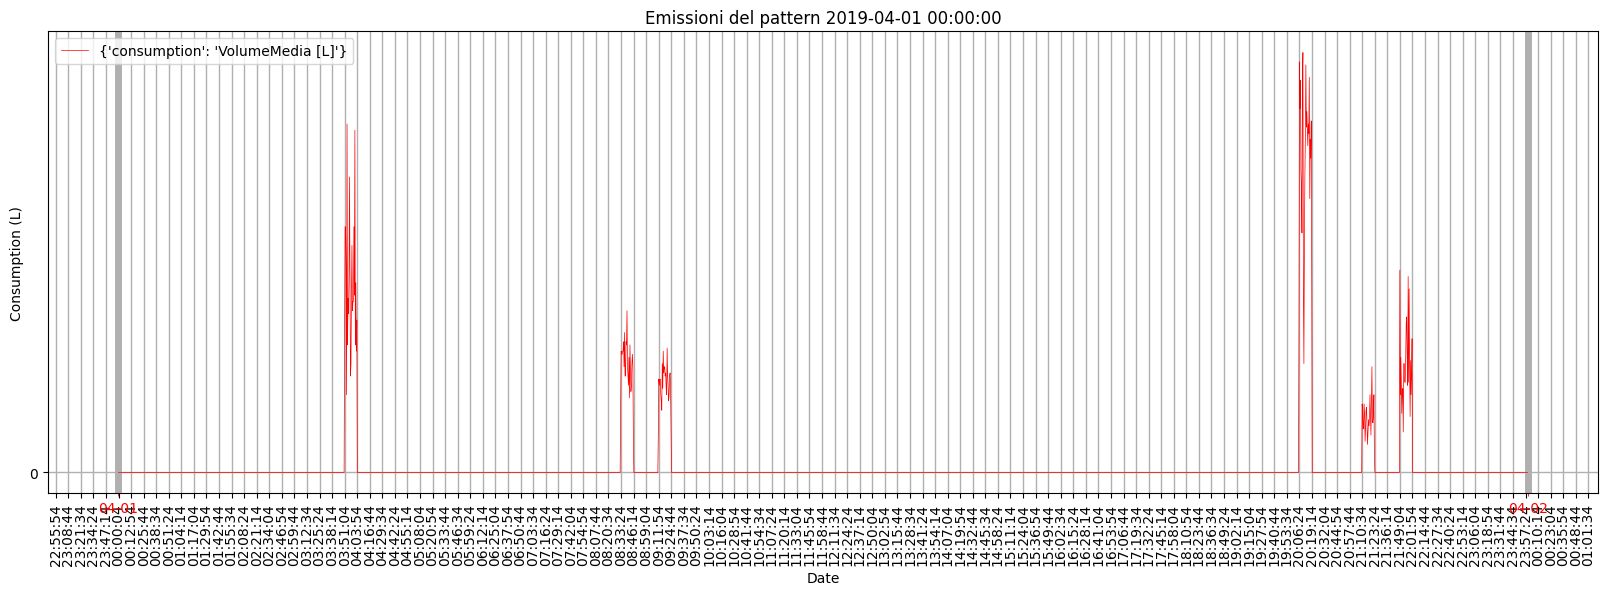

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 6
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 26576.399999999998 max2: 29926.780219780223 max3: 34888.812154696134
max_value per questo pattern: 26576.399999999998
4 False
	emissione giornaliera: 19494

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'M', 'L', 'L', 'L']

intervallo: [[25], [27], [30], [50], [76], [103]]
divisione dell'emissioni in intervalli: [1627, 12183, 2945, 306, 11, 2422]
non rispetta und_value
divisione dell'emissioni in intervalli: [995, 2002, 4604, 7832, 18, 4043]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2731, 1338, 4049, 715, 2919, 7742]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [937, 3821, 4494, 5639, 3450, 1153]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1773, 2593, 5936, 6746, 658, 1788]
debug temp esmissioni 1
te

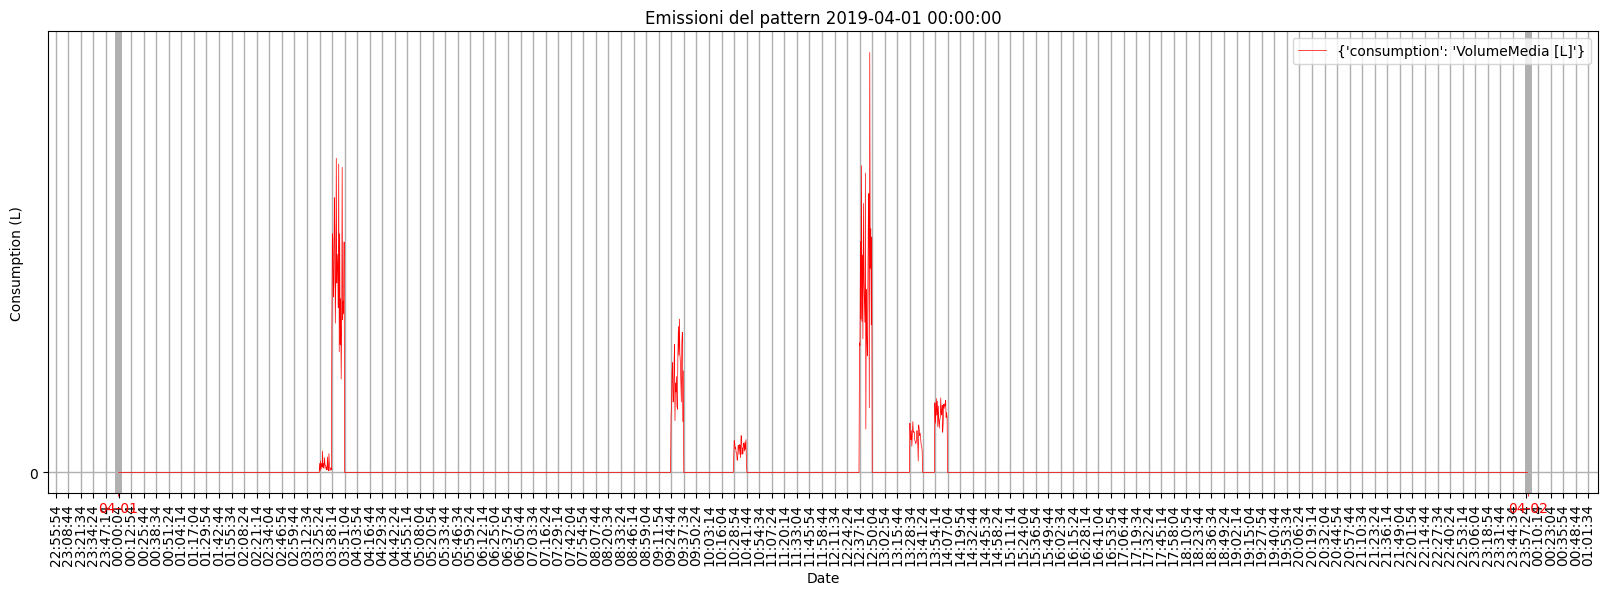

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 9
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
4 False
	emissione giornaliera: 6608

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L', 'L', 'M', 'P', 'L', 'M']

intervallo: [[5], [12], [14], [19], [24], [27, 28], [30], [77], [80]]
divisione dell'emissioni in intervalli: [290, 48, 1250, 1076, 1186, [391, 724], 829, 390, 424]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [345, 309, 1840, 400, 1523, [115, 15], 1059, 822, 180]

DATAFRAME  COSTRUITO
	intervallo finale: [[5], [12], [14], [19], [24], [27, 28], [30], [77], [80]]
	divisione finale dell'emissioni in intervalli: [345, 309, 1840, 400, 1523, [115, 15], 1059, 822, 180]
	emissione totale giornaliera: 6608
	picco di emissione giornalie

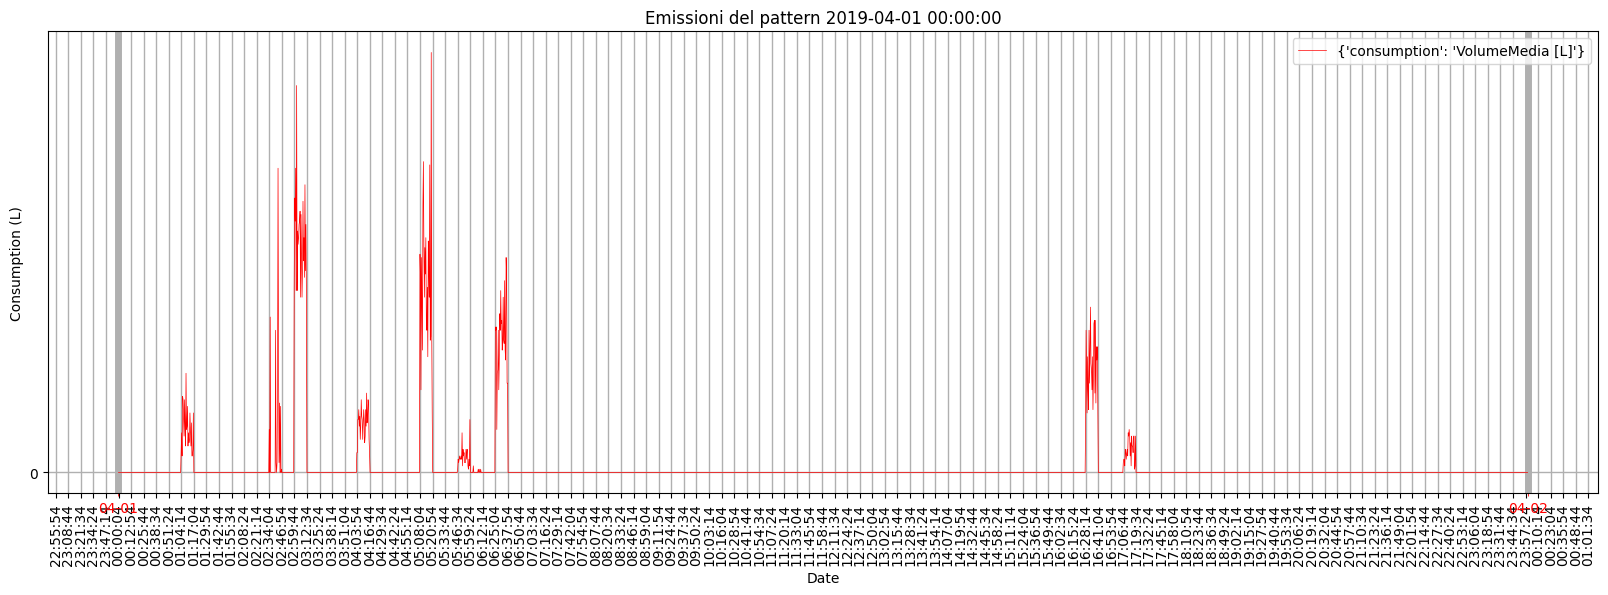

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 6644.099999999999 min2: 7481.695054945056 min3: 6977.762430939227
min_value per questo pattern: 7481.695054945056
dove max1: 8858.8 max2: 9975.593406593407 max3: 8722.203038674033
max_value per questo pattern: 8722.203038674033
4 False
	emissione giornaliera: 8672

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'P', 'L']

intervallo: [[10], [13, 14], [75], [81], [86], [88], [103]]
divisione dell'emissioni in intervalli: [1538, [1017, 571], 106, 914, 666, 3731, 129]

DATAFRAME  COSTRUITO
	intervallo finale: [[10], [13, 14], [75], [81], [86], [88], [103]]
	divisione finale dell'emissioni in intervalli: [1538, [1017, 571], 106, 914, 666, 3731, 129]
	emissione totale giornaliera: 8672
	picco di emissione giornaliera: 8.766666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 02:08:20', freq='770S'), Timestamp('2019-04-01 02:21:10', freq='770S'), 1), (Timest

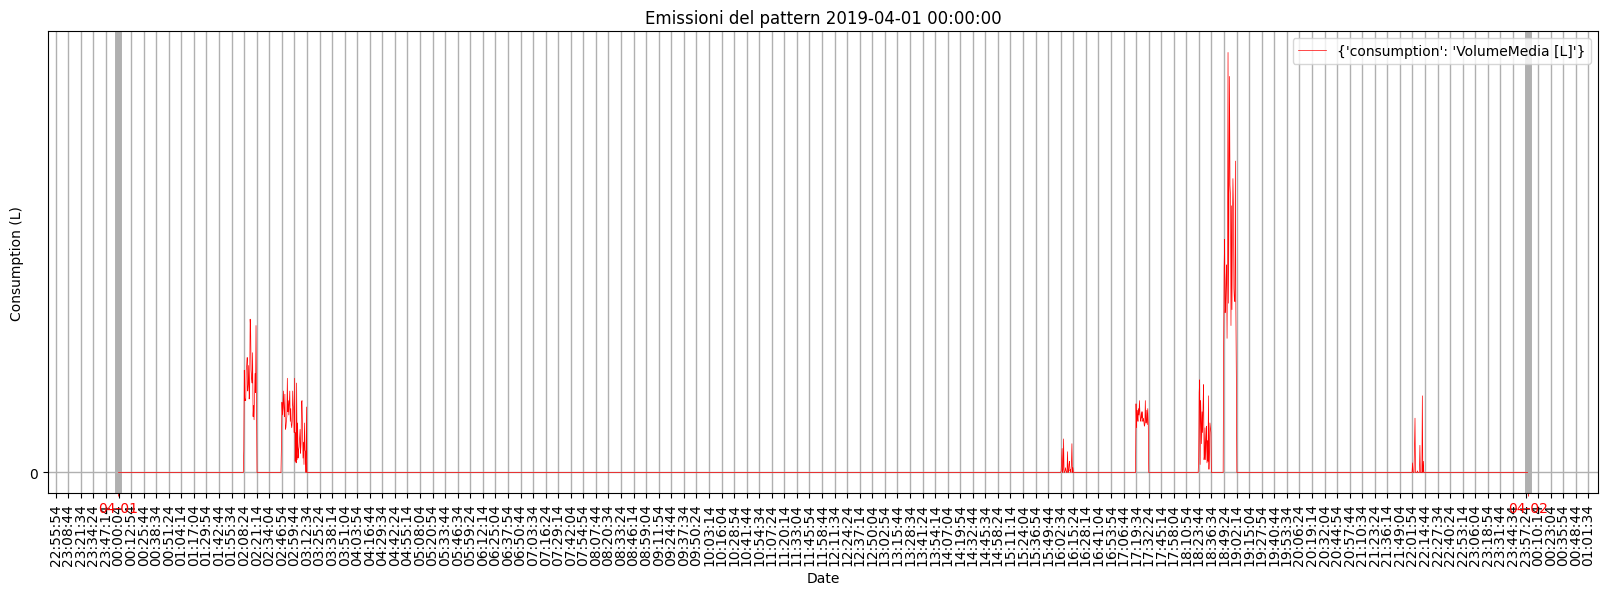

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 9
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
4 False
	emissione giornaliera: 5880

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'L', 'L', 'L', 'L', 'L', 'M', 'M']

intervallo: [[3], [5], [22], [45], [55], [67], [72], [76], [79]]
divisione dell'emissioni in intervalli: [973, 322, 26, 969, 767, 1291, 654, 114, 764]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [135, 814, 1601, 871, 517, 27, 850, 34, 1031]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [159, 378, 1233, 672, 232, 884, 1659, 369, 294]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [746, 49, 16, 28, 920, 1608, 38, 1467, 1008]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [130, 

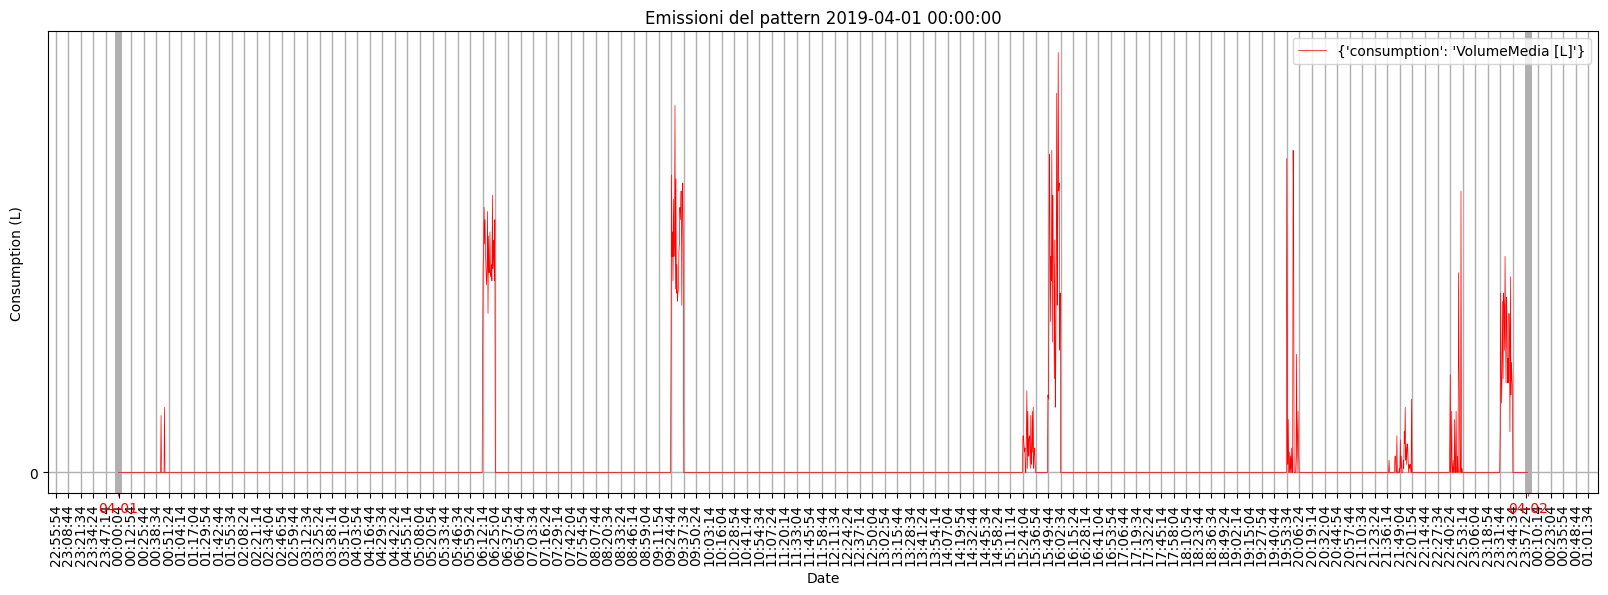

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 6
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 35435.2 max2: 19951.186813186814 max3: 20933.28729281768
max_value per questo pattern: 19951.186813186814
4 False
	emissione giornaliera: 19256

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'P', 'L', 'M']

intervallo: [[7], [42], [49], [51], [76], [79]]
divisione dell'emissioni in intervalli: [8955, 1263, 2572, 777, 1349, 4340]

DATAFRAME  COSTRUITO
	intervallo finale: [[7], [42], [49], [51], [76], [79]]
	divisione finale dell'emissioni in intervalli: [8955, 1263, 2572, 777, 1349, 4340]
	emissione totale giornaliera: 19256
	picco di emissione giornaliera: 16.966666666666665

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 01:29:50', freq='770S'), Timestamp('2019-04-01 01:42:40', freq='770S'), 1), (Timestamp('2019-04-01 08:59:00', freq='770S'), 

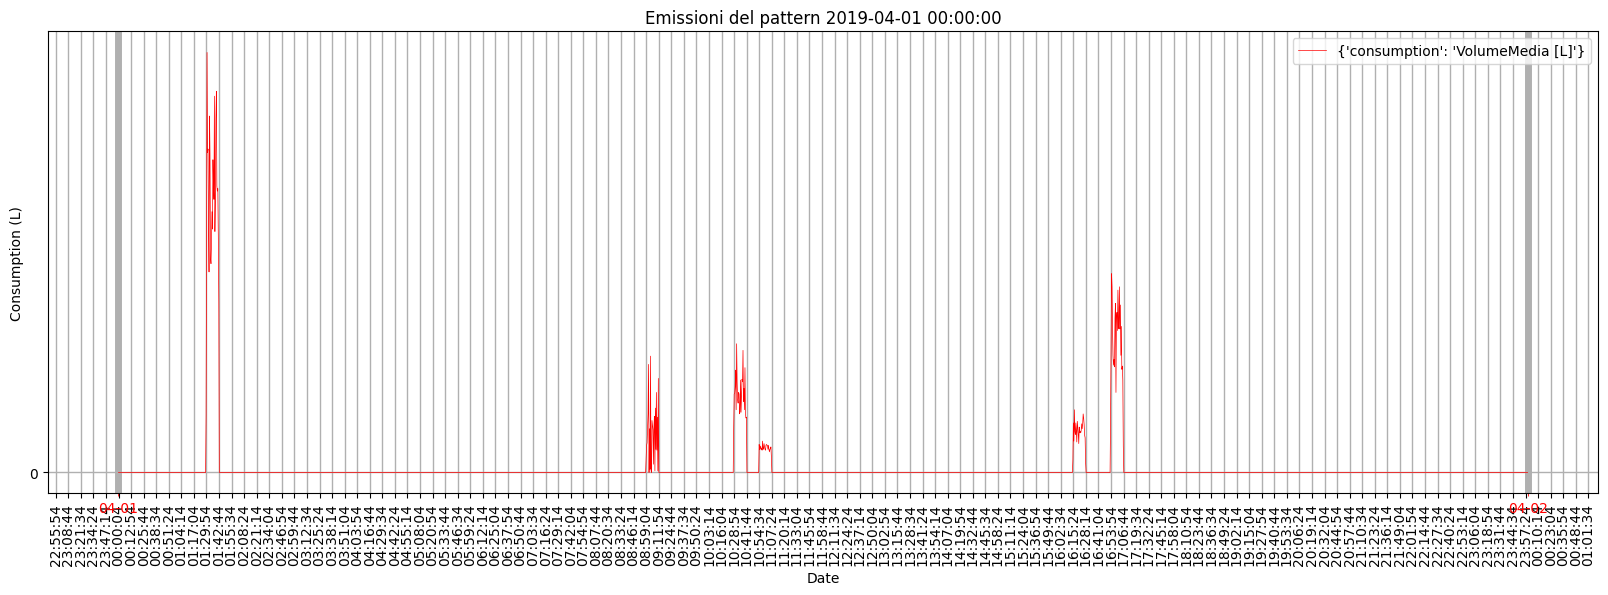

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 6
dove min1: 11073.5 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 11073.5
dove max1: 13288.199999999999 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
4 True
dove min1: 9583.064516129032 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 9583.064516129032
dove max1: 11499.677419354837 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
5 False
	emissione giornaliera: 9925

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'P', 'L', 'L', 'L']

intervallo: [[1], [3], [5], [33], [56, 57], [99]]
divisione dell'emissioni in intervalli: [1540, 2532, 2636, 898, [371, 72], 1876]

DATAFRAME  COSTRUITO
	intervallo finale: [[1], [3], [5], [33], [56, 57], [99]]
	divisione finale dell'emissioni in intervalli: [1540, 2532, 2636, 898, [371, 72], 1876]
	emissione total

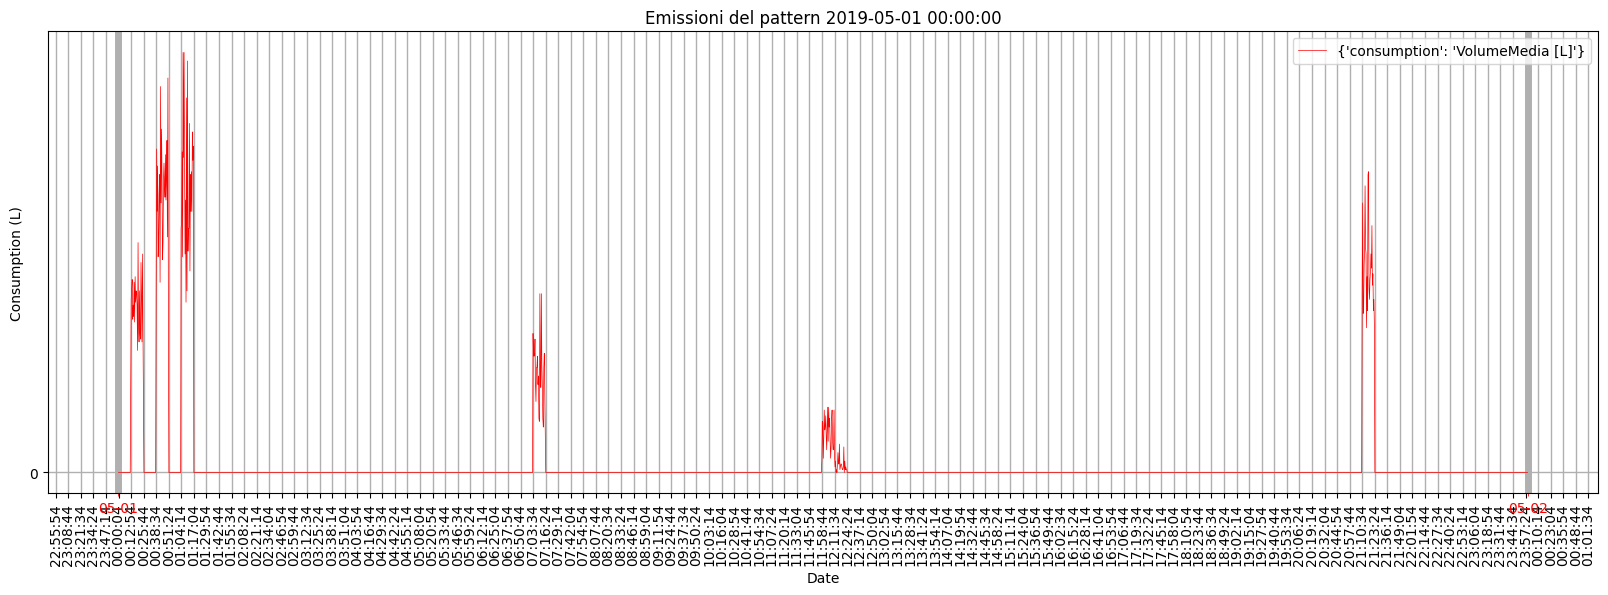

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 11073.5 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13288.199999999999 max2: 14963.390109890111 max3: 27911.049723756907
max_value per questo pattern: 13288.199999999999
4 False
	emissione giornaliera: 12794

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[16, 17], [37], [43], [68], [92], [106]]
divisione dell'emissioni in intervalli: [[85, 40], 2551, 785, 1023, 6479, 1831]

DATAFRAME  COSTRUITO
	intervallo finale: [[16, 17], [37], [43], [68], [92], [106]]
	divisione finale dell'emissioni in intervalli: [[85, 40], 2551, 785, 1023, 6479, 1831]
	emissione totale giornaliera: 12794
	picco di emissione giornaliera: 11.233333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 03:25:20', freq='770S'), Timestamp('2019-04-01 03:51:00', freq='770S'), 2), (Timestamp('2019-04-01 07:

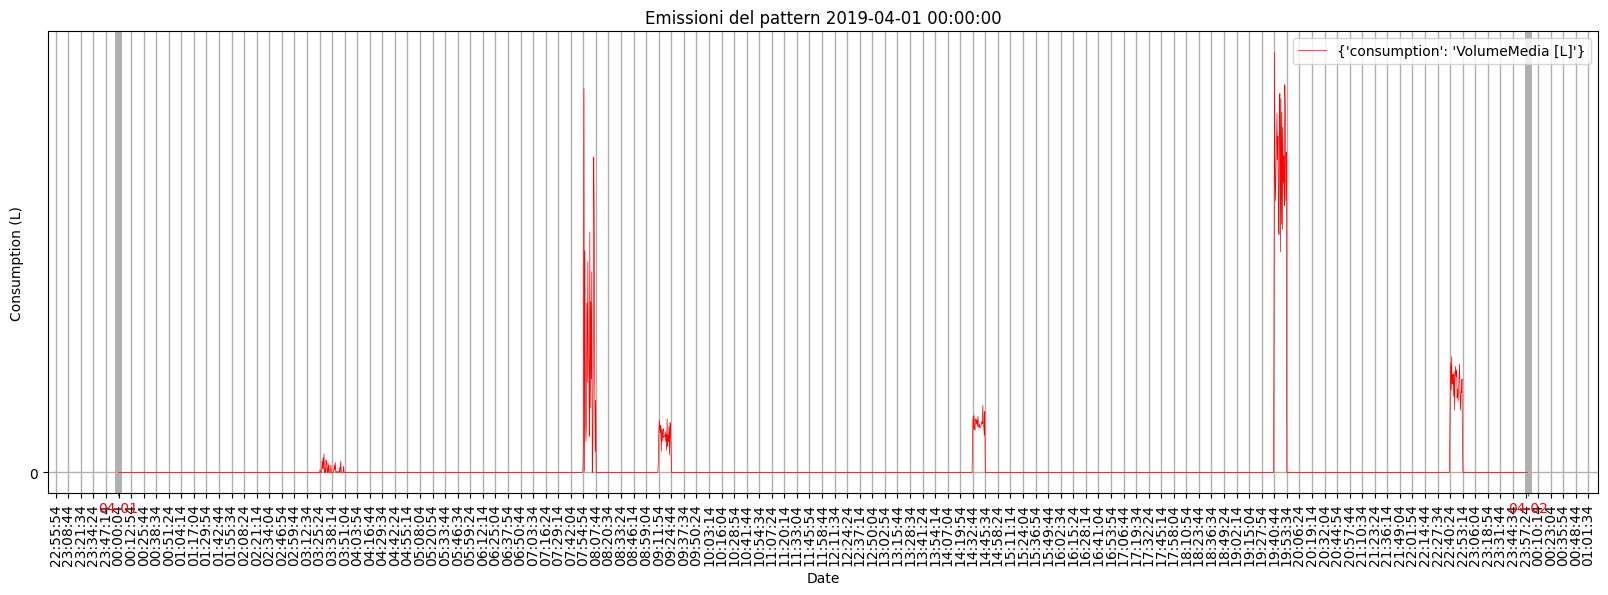

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 6644.099999999999 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 6644.099999999999
dove max1: 8858.8 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6977.762430939227
4 False
	emissione giornaliera: 6872

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: L
spazi: []

intervallo: [[88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183]]
divisione dell'emissioni in intervalli: [[33, 101, 23, 17, 77, 93, 32, 51, 85, 21,

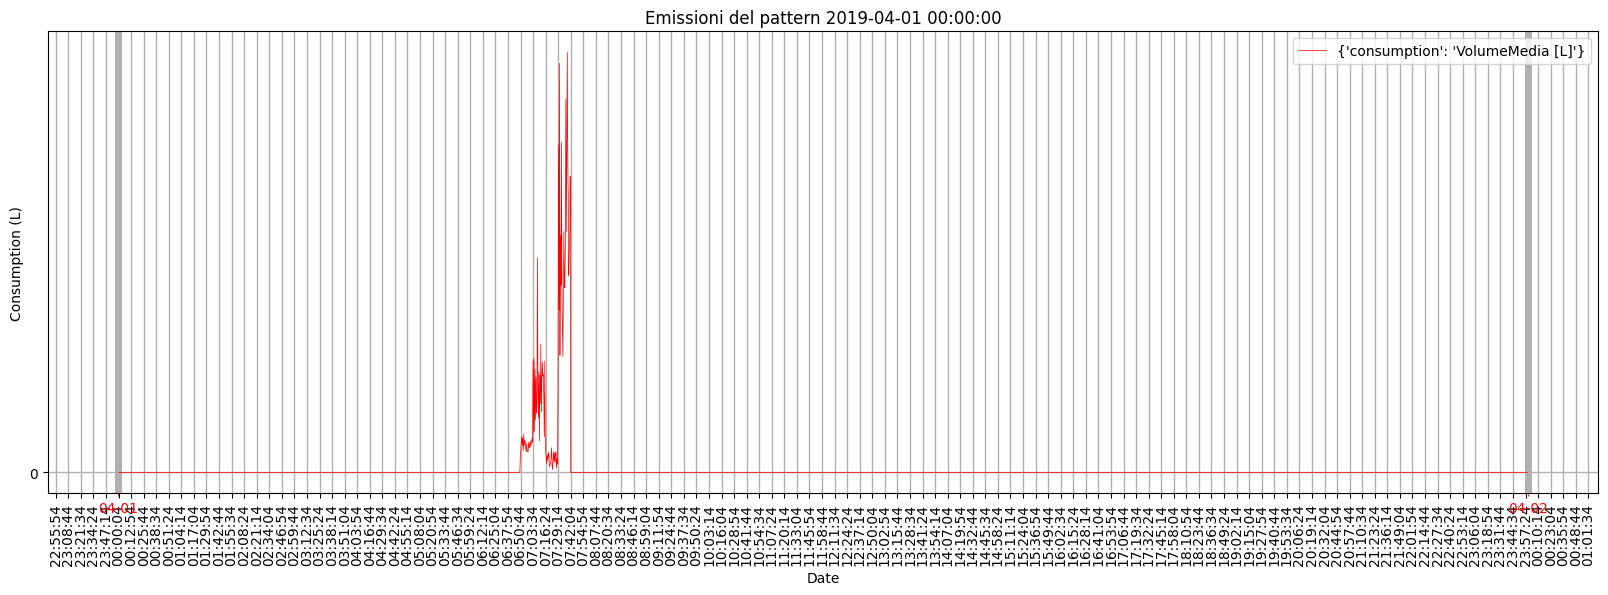

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 6
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 17717.6 max2: 29926.780219780223 max3: 20933.28729281768
max_value per questo pattern: 17717.6
4 False
	emissione giornaliera: 17640

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'P', 'L', 'L', 'L']

intervallo: [[32], [35, 36], [38], [94], [102], [108, 109]]
divisione dell'emissioni in intervalli: [3560, [508, 739], 2017, 5525, 1160, [517, 3614]]

DATAFRAME  COSTRUITO
	intervallo finale: [[32], [35, 36], [38], [94], [102], [108, 109]]
	divisione finale dell'emissioni in intervalli: [3560, [508, 739], 2017, 5525, 1160, [517, 3614]]
	emissione totale giornaliera: 17640
	picco di emissione giornaliera: 16.233333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 06:50:40', freq='770S'), Timestamp('2019-04-01 07:03:30', freq='770S'), 1), (Timest

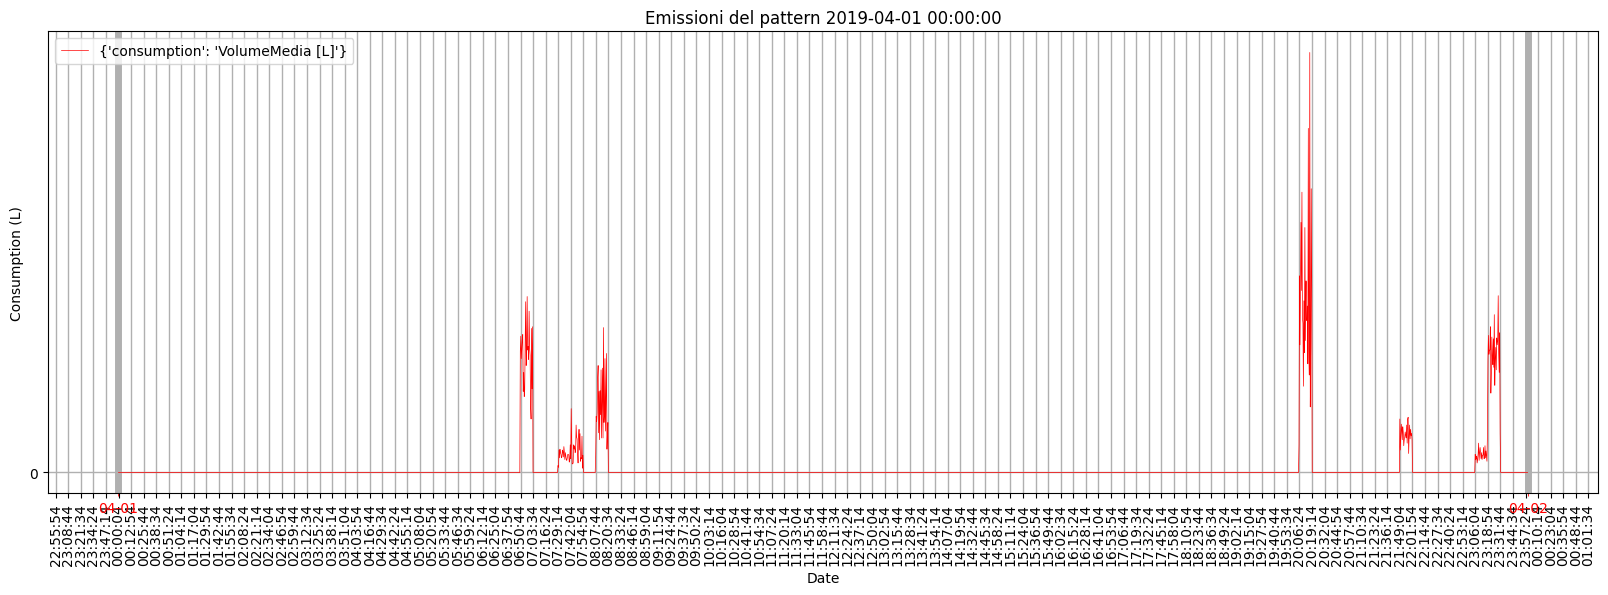

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
4 False
	emissione giornaliera: 6476

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'M', 'L']

intervallo: [[7], [47], [50], [106]]
divisione dell'emissioni in intervalli: [2216, 995, 348, 2917]

DATAFRAME  COSTRUITO
	intervallo finale: [[7], [47], [50], [106]]
	divisione finale dell'emissioni in intervalli: [2216, 995, 348, 2917]
	emissione totale giornaliera: 6476
	picco di emissione giornaliera: 5.4

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 01:29:50', freq='770S'), Timestamp('2019-04-01 01:42:40', freq='770S'), 1), (Timestamp('2019-04-01 10:03:10', freq='770S'), Timestamp('2019-04-01 10:16:00', freq='770S'), 1), (Timestamp('2019-04-01 10:41:4

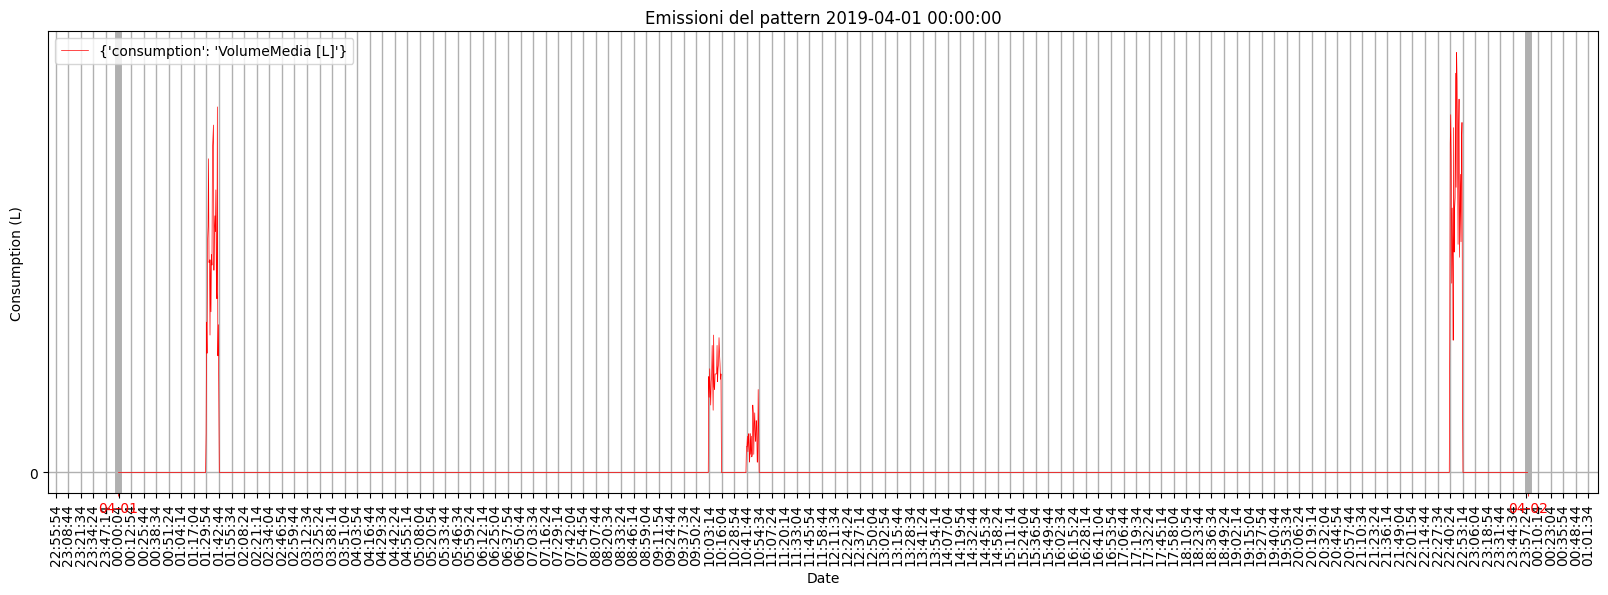

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 3
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
4 False
	emissione giornaliera: 161

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PPP
spazi: ['M', 'L']

intervallo: [[58], [61], [94]]
divisione dell'emissioni in intervalli: [16, 76, 69]

DATAFRAME  COSTRUITO
	intervallo finale: [[58], [61], [94]]
	divisione finale dell'emissioni in intervalli: [16, 76, 69]
	emissione totale giornaliera: 161
	picco di emissione giornaliera: 0.6666666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 12:24:20', freq='770S'), Timestamp('2019-04-01 12:37:10', freq='770S'), 1), (Timestamp('2019-04-01 13:02:50', freq='770S'), Timestamp('2019-04-01 13:15:40', freq='770S'), 1), (Timestamp('2019-04-01 20:06:20', freq='770S'), Timestamp('2019-04-01 20:19:10', freq='

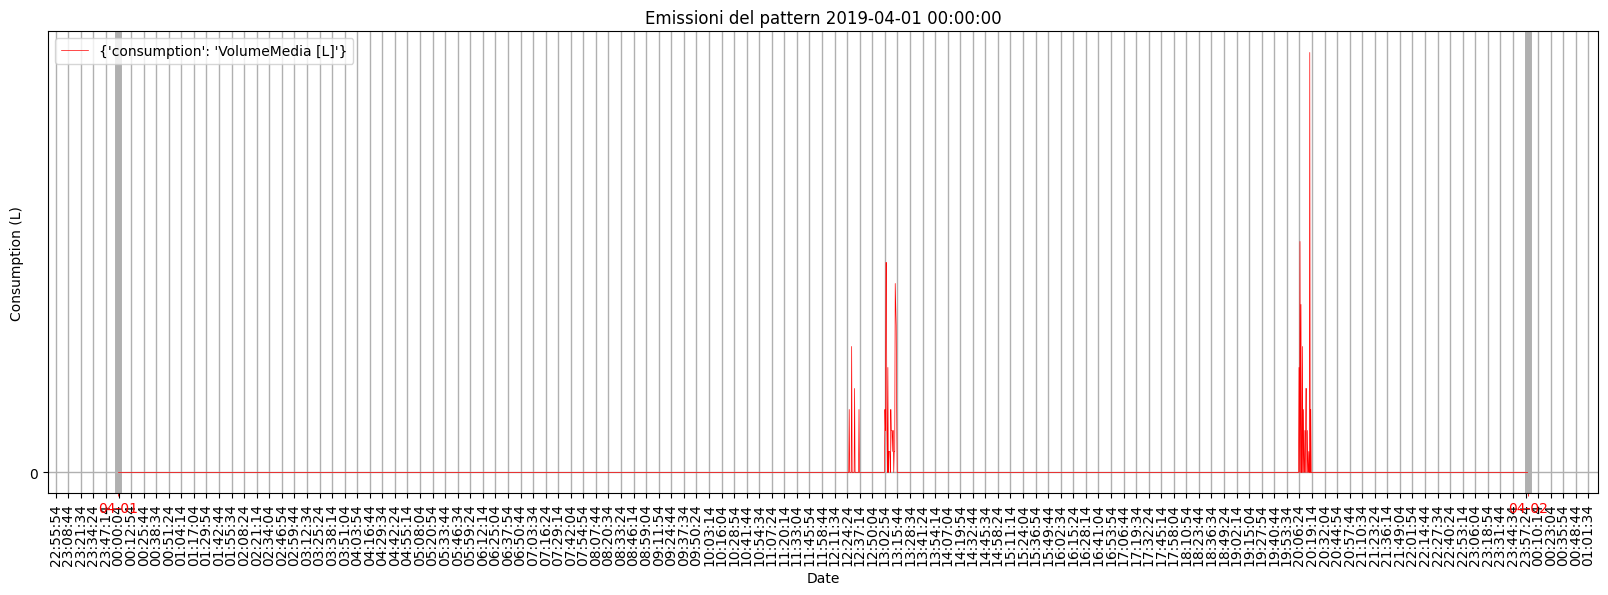

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 3
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
4 False
	emissione giornaliera: 1245

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PPP
spazi: ['M', 'L']

intervallo: [[62], [66], [98]]
divisione dell'emissioni in intervalli: [128, 812, 305]

DATAFRAME  COSTRUITO
	intervallo finale: [[62], [66], [98]]
	divisione finale dell'emissioni in intervalli: [128, 812, 305]
	emissione totale giornaliera: 1245
	picco di emissione giornaliera: 10.166666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 13:15:40', freq='770S'), Timestamp('2019-04-01 13:28:30', freq='770S'), 1), (Timestamp('2019-04-01 14:07:00', freq='770S'), Timestamp('2019-04-01 14:19:50', freq='770S'), 1), (Timestamp('2019-04-01 20:57:40', freq='770S'), Timestamp('2019-04-01 21:10:30'

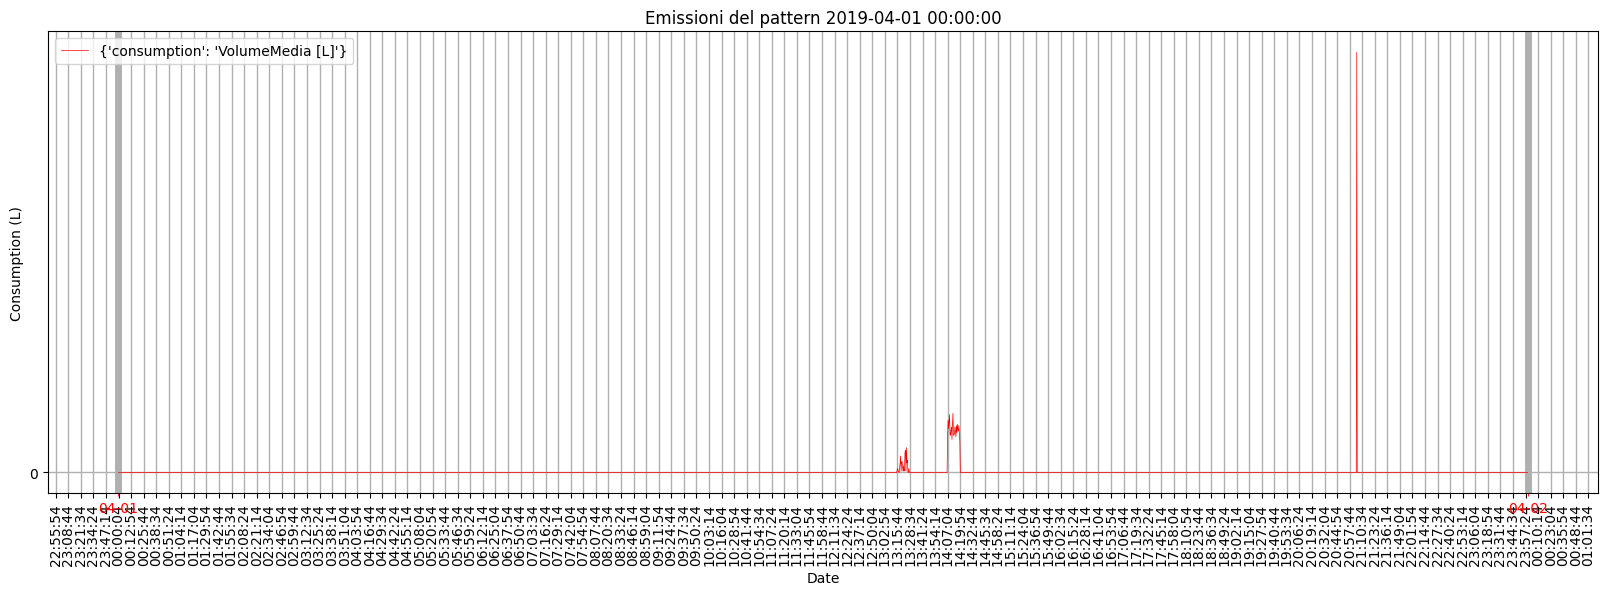

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 4
dove min1: 4429.4 min2: 2493.8983516483518 min3: 3488.8812154696134
min_value per questo pattern: 4429.4
dove max1: 6644.099999999999 max2: 4987.7967032967035 max3: 5233.32182320442
max_value per questo pattern: 4987.7967032967035
4 False
	emissione giornaliera: 4953

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L']

intervallo: [[8], [44], [61], [70]]
divisione dell'emissioni in intervalli: [162, 2672, 180, 1939]

DATAFRAME  COSTRUITO
	intervallo finale: [[8], [44], [61], [70]]
	divisione finale dell'emissioni in intervalli: [162, 2672, 180, 1939]
	emissione totale giornaliera: 4953
	picco di emissione giornaliera: 5.033333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-01 01:42:40', freq='770S'), Timestamp('2019-04-01 01:55:30', freq='770S'), 1), (Timestamp('2019-04-01 09:24:40', freq='770S'), Timestamp('2019-04-01 09:37:30', freq='770S'), 1), (Timestamp('2019-04-01 13:

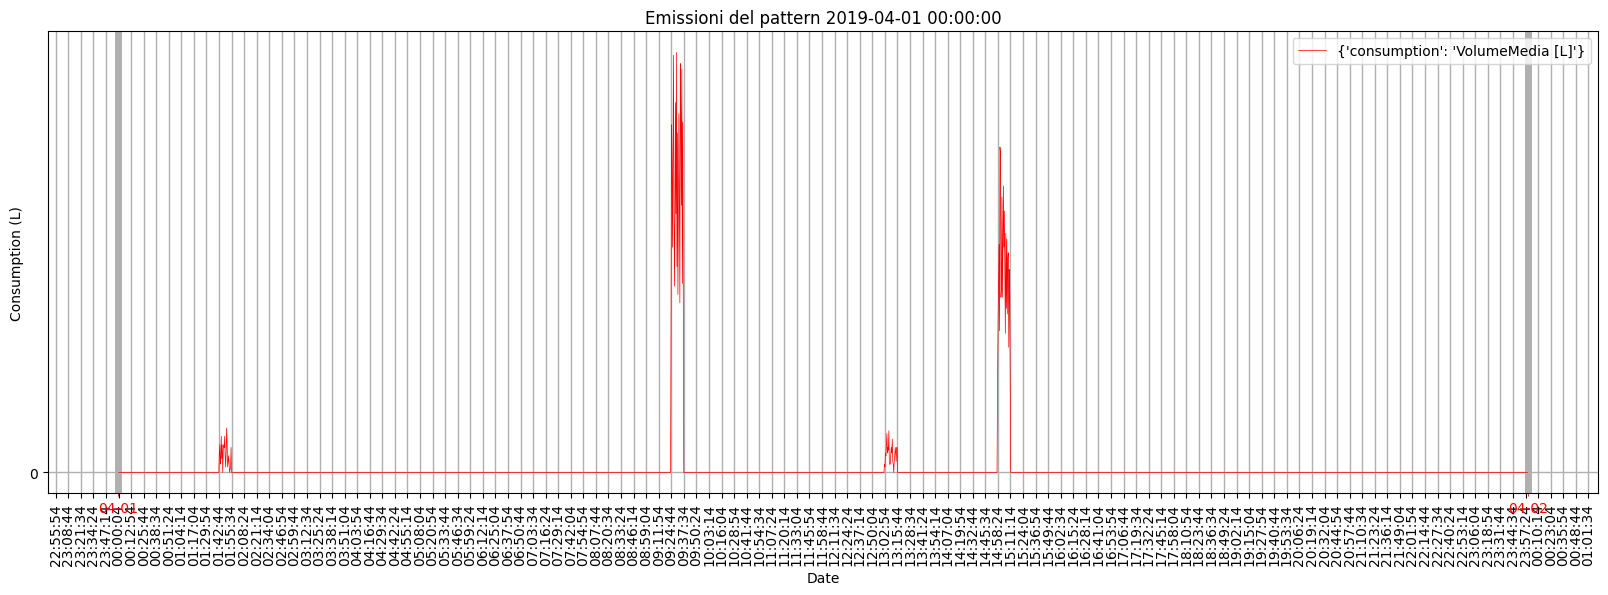

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 11073.5 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13288.199999999999 max2: 14963.390109890111 max3: 13955.524861878454
max_value per questo pattern: 13288.199999999999
	emissione giornaliera: 13112

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[5, 6], [25], [37, 38], [71], [100, 101], [111]]
divisione dell'emissioni in intervalli: [[303, 348], 8374, [27, 5], 1068, [260, 625], 2102]
non rispetta und_value
divisione dell'emissioni in intervalli: [[110, 164], 6009, [665, 555], 1173, [9, 5], 4422]
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[238, 229], 675, [465, 1042], 1134, [826, 8411], 92]
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[891, 110], 1343, [1342, 6014], 366, [146, 897], 2003]
debug temp e

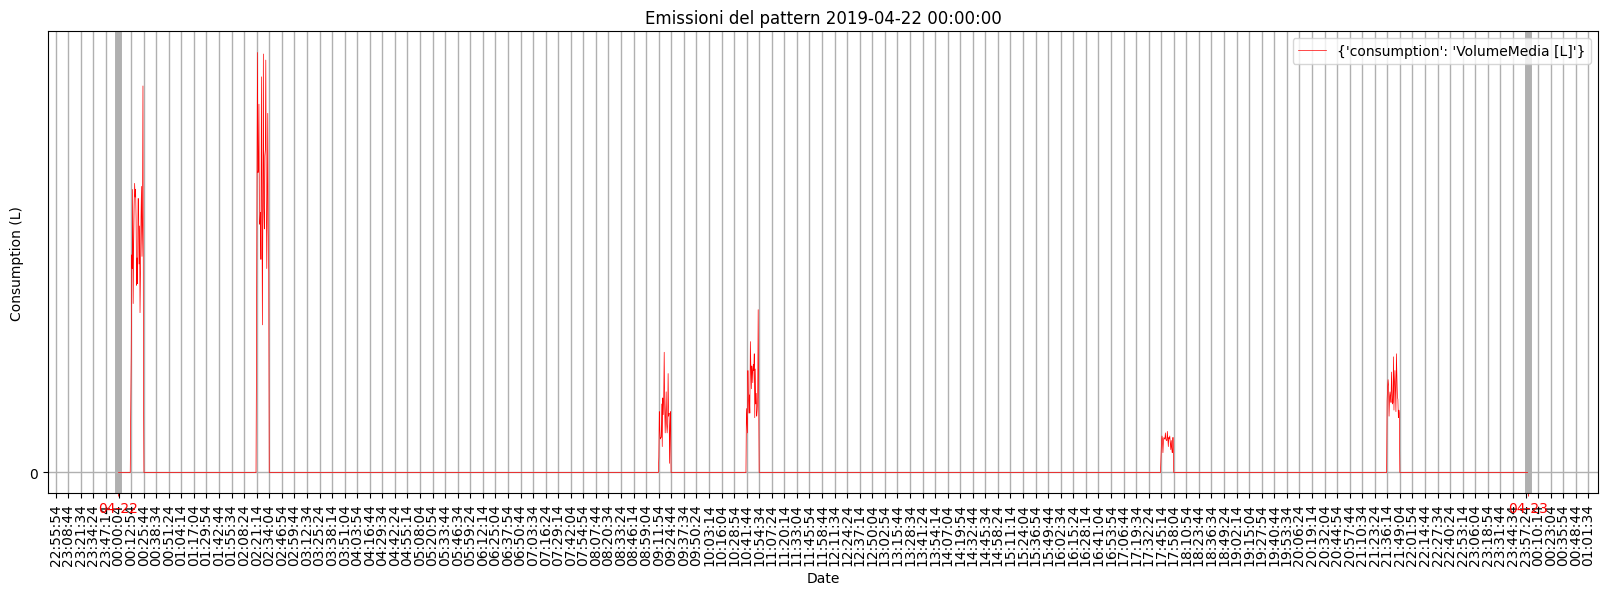

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1b
	numero di intervalli: 9
dove min1: 15502.899999999998 min2: 17457.28846153846 min3: 12211.084254143647
min_value per questo pattern: 17457.28846153846
dove max1: 26576.399999999998 max2: 39902.37362637363 max3: 20933.28729281768
max_value per questo pattern: 20933.28729281768
	emissione giornaliera: 17722

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'M', 'P', 'L', 'M', 'M', 'M']

intervallo: [[6], [10], [32], [35], [37], [84, 85], [88], [91], [95]]
divisione dell'emissioni in intervalli: [3812, 4369, 803, 546, 1168, [15, 14], 2676, 3097, 1222]

DATAFRAME  COSTRUITO
	intervallo finale: [[6], [10], [32], [35], [37], [84, 85], [88], [91], [95]]
	divisione finale dell'emissioni in intervalli: [3812, 4369, 803, 546, 1168, [15, 14], 2676, 3097, 1222]
	emissione totale giornaliera: 17722
	picco di emissione giornaliera: 9.366666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 01:17:00', freq='770S')

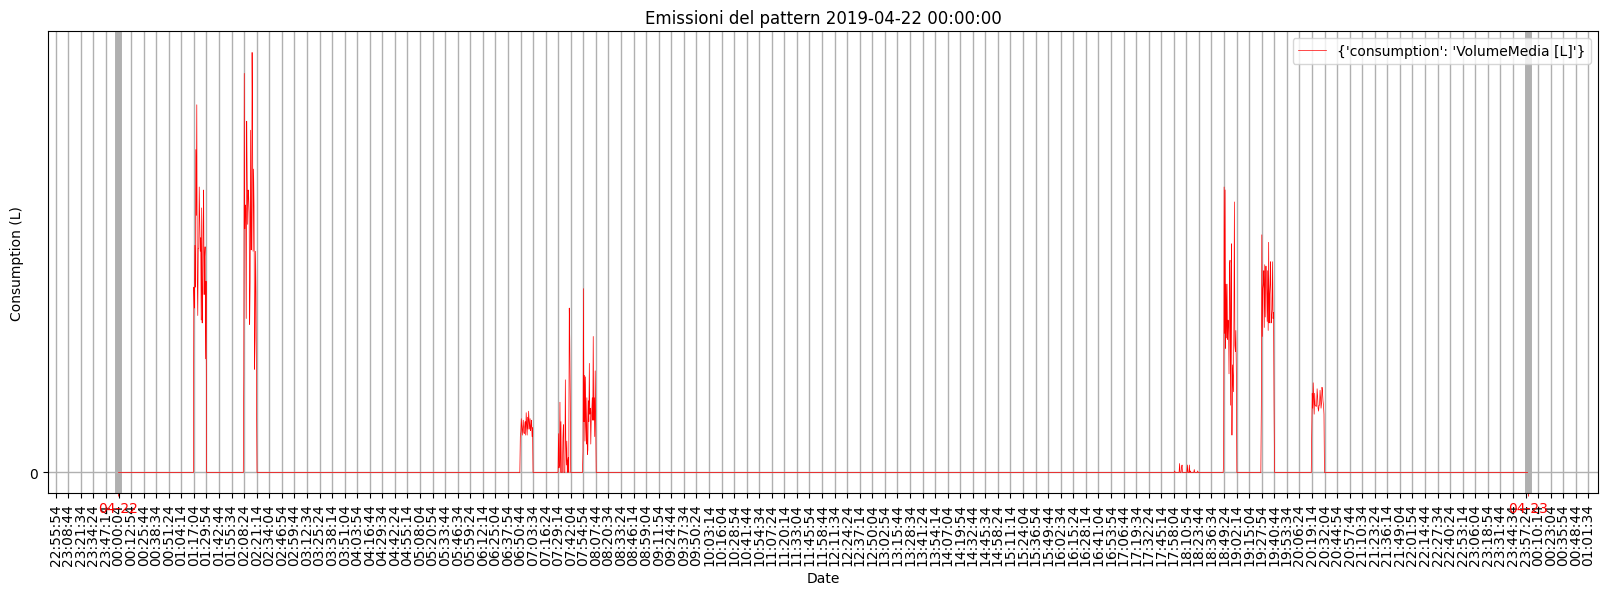

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
	emissione giornaliera: 952

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[64, 65]]
divisione dell'emissioni in intervalli: [[25, 927]]

DATAFRAME  COSTRUITO
	intervallo finale: [[64, 65]]
	divisione finale dell'emissioni in intervalli: [[25, 927]]
	emissione totale giornaliera: 952
	picco di emissione giornaliera: 2.066666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 13:41:20', freq='770S'), Timestamp('2019-04-22 14:07:00', freq='770S'), 2)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CAMALA1M_S0


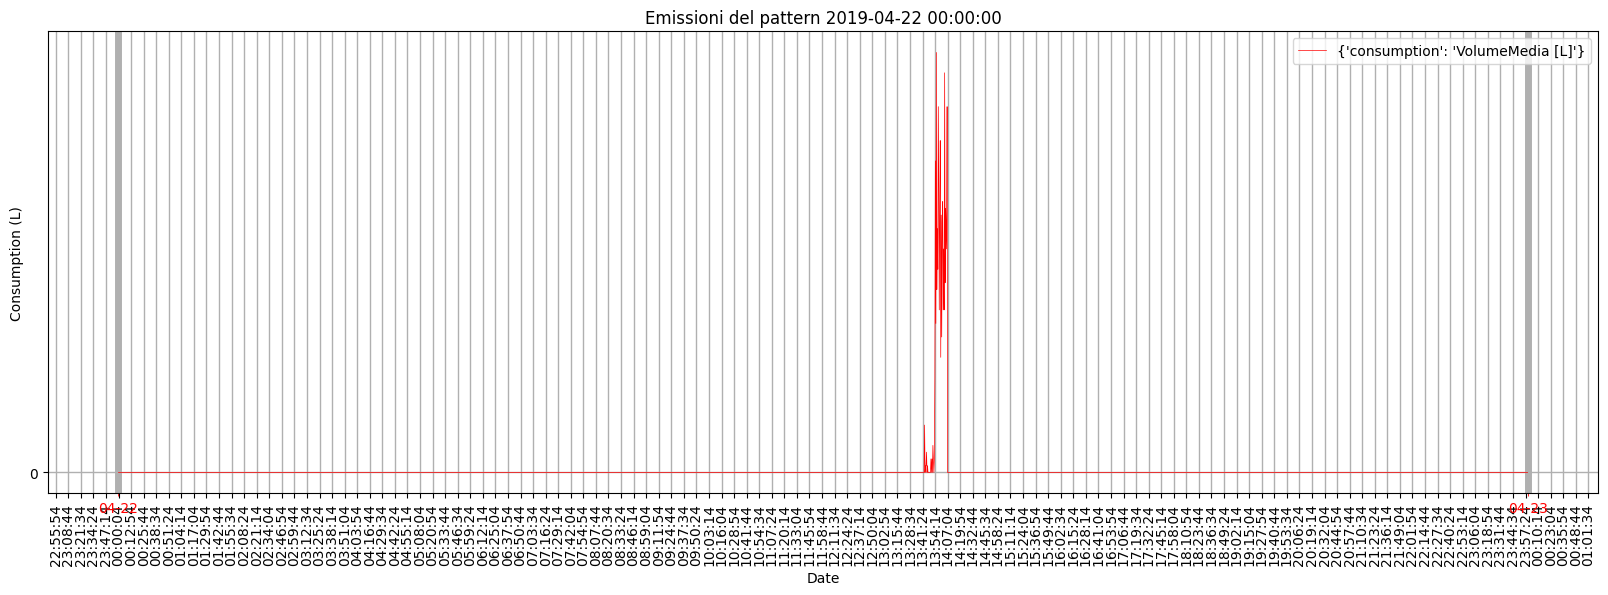

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 0 min2: 0 min3: 0
min_value per questo pattern: 0
dove max1: 2214.7 max2: 2493.8983516483518 max3: 1744.4406077348067
max_value per questo pattern: 1744.4406077348067
	emissione giornaliera: 485

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[103, 104]]
divisione dell'emissioni in intervalli: [[163, 322]]

DATAFRAME  COSTRUITO
	intervallo finale: [[103, 104]]
	divisione finale dell'emissioni in intervalli: [[163, 322]]
	emissione totale giornaliera: 485
	picco di emissione giornaliera: 0.9666666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 22:01:50', freq='770S'), Timestamp('2019-04-22 22:27:30', freq='770S'), 2)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CAMALA1M_S0


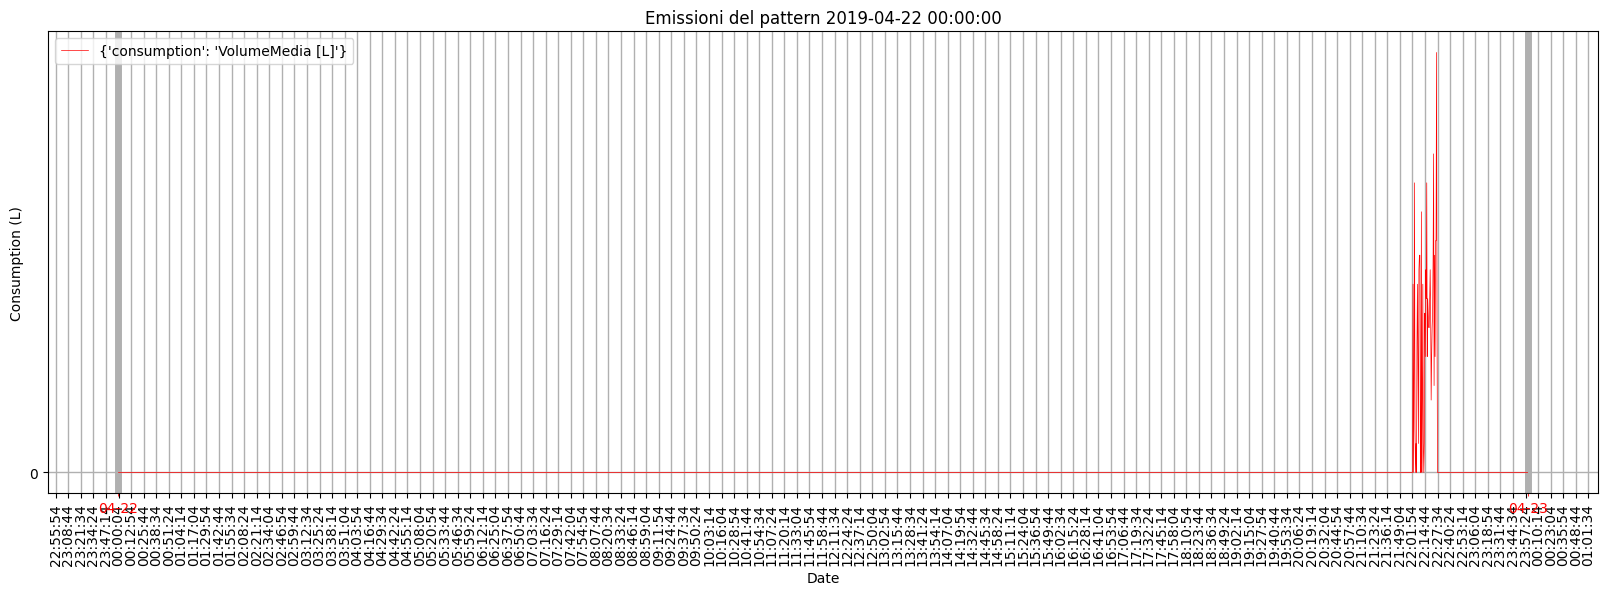

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 6644.099999999999 min2: 7481.695054945056 min3: 6977.762430939227
min_value per questo pattern: 7481.695054945056
dove max1: 8858.8 max2: 9975.593406593407 max3: 8722.203038674033
max_value per questo pattern: 8722.203038674033
	emissione giornaliera: 7587

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'L', 'M', 'L', 'L', 'L']

intervallo: [[0], [2], [24, 25, 26], [29], [41, 42], [93], [100, 101]]
divisione dell'emissioni in intervalli: [344, 2010, [567, 1039, 792], 378, [180, 59], 1415, [4, 799]]
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [446, 2171, [48, 384, 65], 677, [99, 157], 105, [3248, 187]]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [1661, 1350, [1, 10, 1], 82, [502, 2528], 105, [584, 763]]
errore div emissioni 
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [64, 610, [267, 274, 967], 1756, [78, 

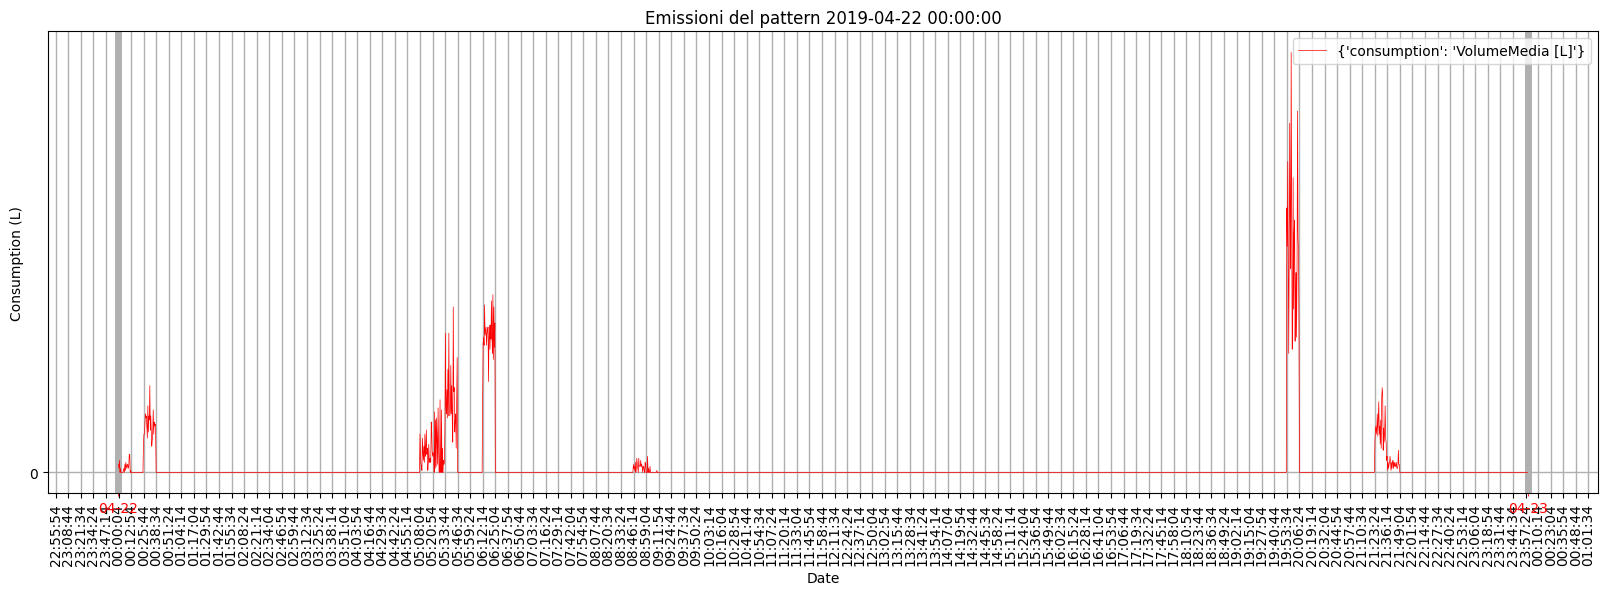

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 15502.899999999998 min2: 14963.390109890111 min3: 12211.084254143647
min_value per questo pattern: 15502.899999999998
dove max1: 44294.0 max2: 17457.28846153846 max3: 27911.049723756907
max_value per questo pattern: 17457.28846153846
	emissione giornaliera: 15603

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L', 'M', 'L', 'M']

intervallo: [[44], [71], [73], [80, 81, 82], [85], [95], [98]]
divisione dell'emissioni in intervalli: [1013, 5750, 2676, [370, 175, 148], 1234, 1778, 2459]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2004, 3716, 2139, [181, 270, 15], 2426, 3787, 1065]

DATAFRAME  COSTRUITO
	intervallo finale: [[44], [71], [73], [80, 81, 82], [85], [95], [98]]
	divisione finale dell'emissioni in intervalli: [2004, 3716, 2139, [181, 270, 15], 2426, 3787, 1065]
	emissione totale giornaliera: 15603
	picco di emissione giornaliera: 7.266666666666667

PROVA

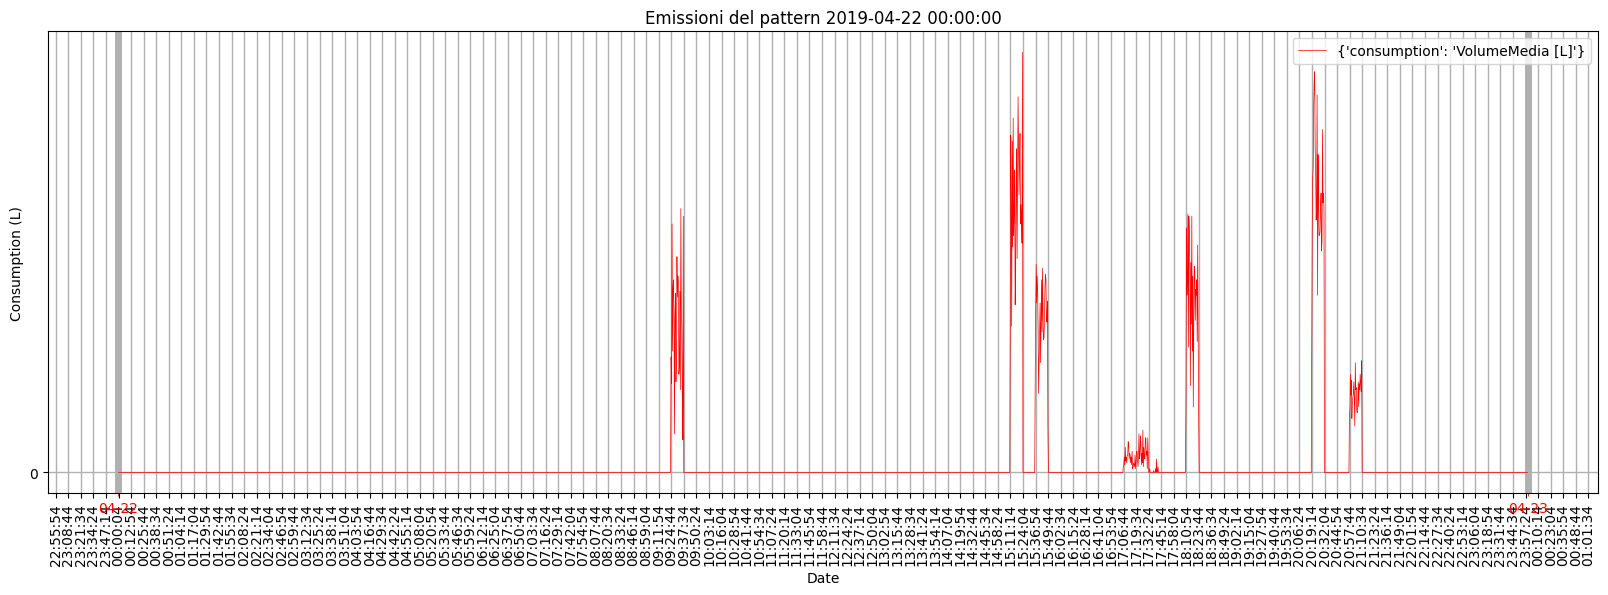

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 7
dove min1: 4429.4 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6644.099999999999 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6644.099999999999
	emissione giornaliera: 6414

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M', 'L', 'P', 'L']

intervallo: [[41], [57], [64], [67], [79], [81, 82], [96]]
divisione dell'emissioni in intervalli: [2025, 22, 815, 918, 34, [19, 76], 2505]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [1475, 1677, 60, 65, 1659, [10, 232], 1236]

DATAFRAME  COSTRUITO
	intervallo finale: [[41], [57], [64], [67], [79], [81, 82], [96]]
	divisione finale dell'emissioni in intervalli: [1475, 1677, 60, 65, 1659, [10, 232], 1236]
	emissione totale giornaliera: 6414
	picco di emissione giornaliera: 6.5

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-04-22 08:46:1

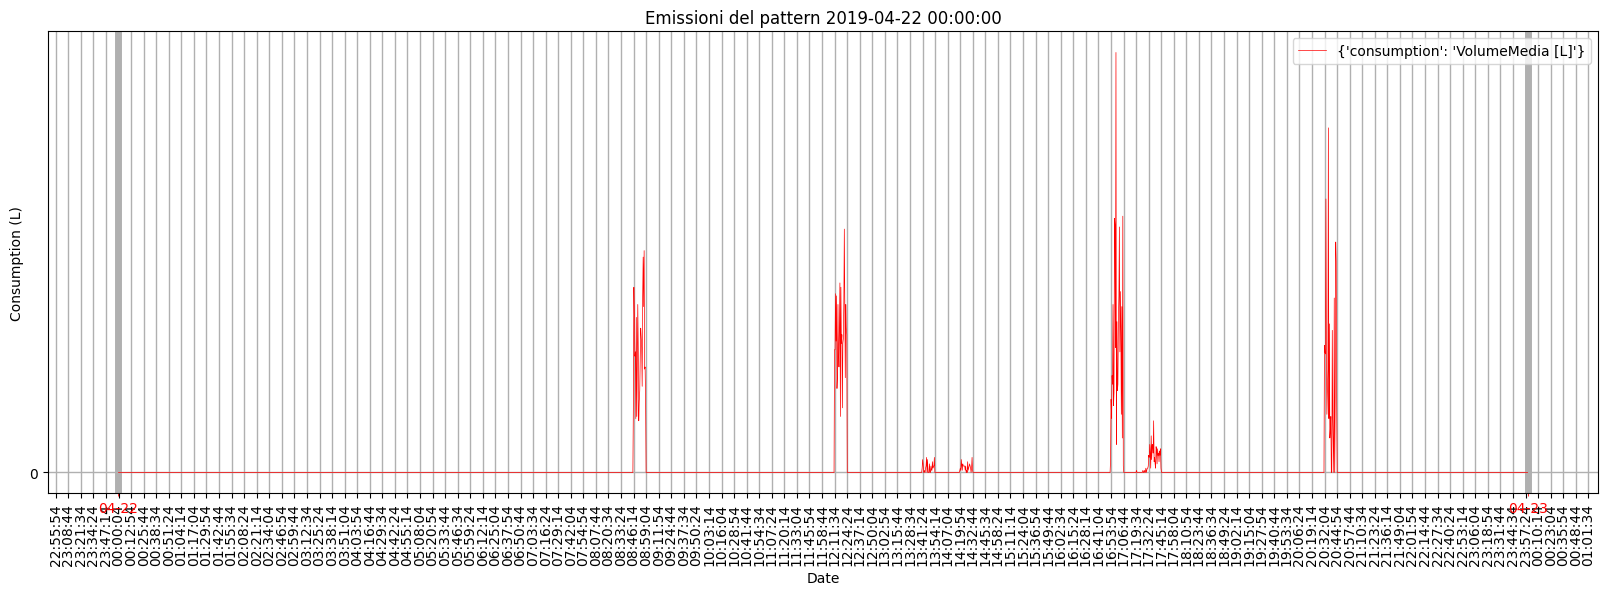

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1c
	numero di intervalli: 16
dove min1: 4972.766129032258 min2: 9385.934782608696 min3: 7705.535326086957
min_value per questo pattern: 9385.934782608696
dove max1: 11366.322580645161 max2: 21453.565217391304 max3: 17612.652173913044
max_value per questo pattern: 11366.322580645161
	emissione giornaliera: 10433

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'M', 'P', 'L', 'M', 'P', 'L', 'M', 'L', 'L', 'M', 'L', 'L', 'M', 'P']

intervallo: [[3], [5, 6, 7], [11], [13, 14], [21], [24, 25], [27], [51], [54], [60], [66], [70, 71], [79], [85], [89, 90], [92, 93]]
divisione dell'emissioni in intervalli: [343, [334, 334, 94], 881, [458, 479], 9, [25, 45], 545, 1584, 1666, 245, 1110, [180, 314], 728, 257, [208, 465], [82, 47]]
debug temp esmissioni 2
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [489, [478, 387, 189], 48, [386, 321], 254, [288, 77], 309, 145, 1285, 98, 3775, [167, 507], 380, 

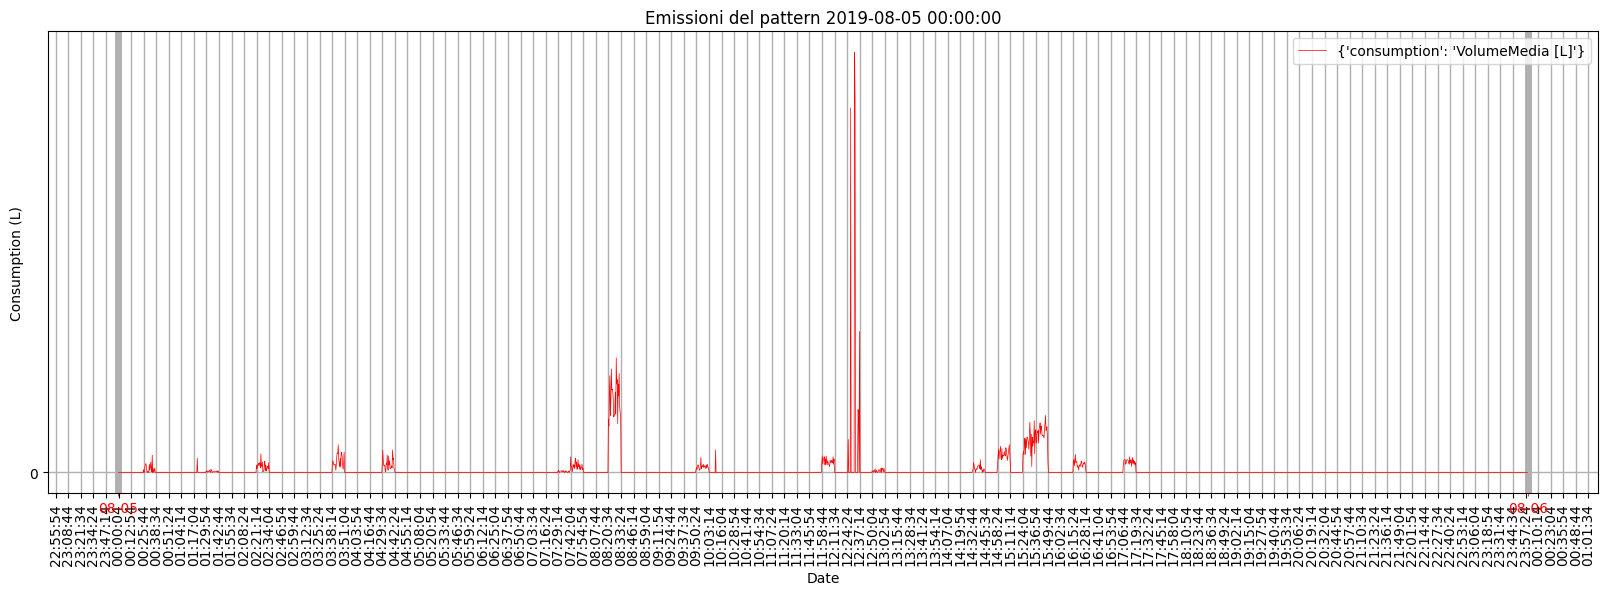

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 5
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 2201.5815217391305
min_value per questo pattern: 2201.5815217391305
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 3302.372282608696
max_value per questo pattern: 2681.695652173913
	emissione giornaliera: 2247

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L']

intervallo: [[9], [35], [63], [69], [110]]
divisione dell'emissioni in intervalli: [1804, 75, 115, 222, 31]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [420, 391, 733, 147, 556]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [553, 605, 44, 995, 50]

DATAFRAME  COSTRUITO
	intervallo finale: [[9], [35], [63], [69], [110]]
	divisione finale dell'emissioni in intervalli: [553, 605, 44, 995, 50]
	emissione totale giornaliera: 2247
	picco di emissione giornaliera: 8.133333333333333

PROVA DEL NOVE
	intervalli trovati: [(Timestam

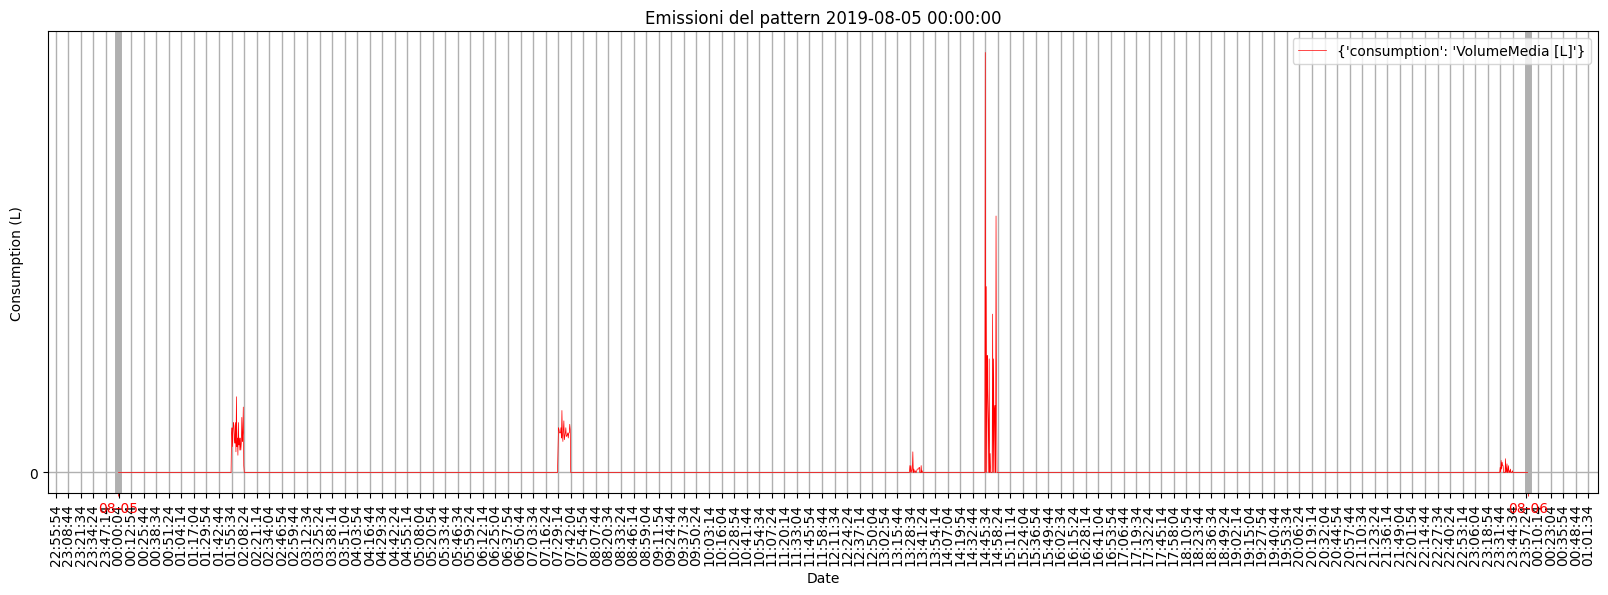

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 2131.185483870968 min2: 1340.8478260869565 min3: 2201.5815217391305
min_value per questo pattern: 2201.5815217391305
dove max1: 2841.5806451612902 max2: 2681.695652173913 max3: 3302.372282608696
max_value per questo pattern: 2681.695652173913
	emissione giornaliera: 2453

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: M
spazi: []

intervallo: [[31, 32]]
divisione dell'emissioni in intervalli: [[1918, 535]]

DATAFRAME  COSTRUITO
	intervallo finale: [[31, 32]]
	divisione finale dell'emissioni in intervalli: [[1918, 535]]
	emissione totale giornaliera: 2453
	picco di emissione giornaliera: 4.0

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-05 06:37:50', freq='770S'), Timestamp('2019-08-05 07:03:30', freq='770S'), 2)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CDMBLC1M_S0


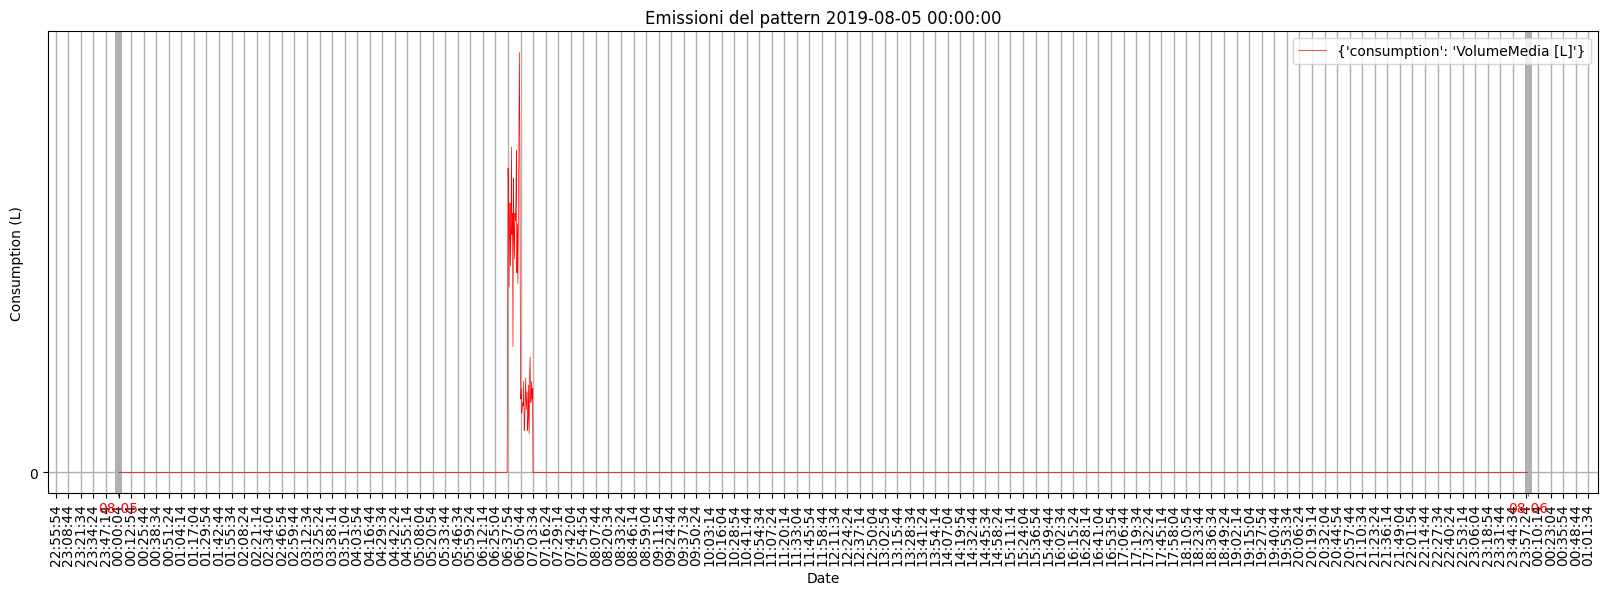

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 1
dove min1: 1420.7903225806451 min2: 1340.8478260869565 min3: 1100.7907608695652
min_value per questo pattern: 1420.7903225806451
dove max1: 2131.185483870968 max2: 2681.695652173913 max3: 2201.5815217391305
max_value per questo pattern: 2131.185483870968
	emissione giornaliera: 1835

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: P
spazi: []

intervallo: [[23]]
divisione dell'emissioni in intervalli: [1835]

DATAFRAME  COSTRUITO
	intervallo finale: [[23]]
	divisione finale dell'emissioni in intervalli: [1835]
	emissione totale giornaliera: 1835
	picco di emissione giornaliera: 4.1

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-05 04:55:10', freq='770S'), Timestamp('2019-08-05 05:08:00', freq='770S'), 1)]
	spazi: lungo=0 medio=0 piccolo=0

	pattern identici: CCMBLB1P_S0


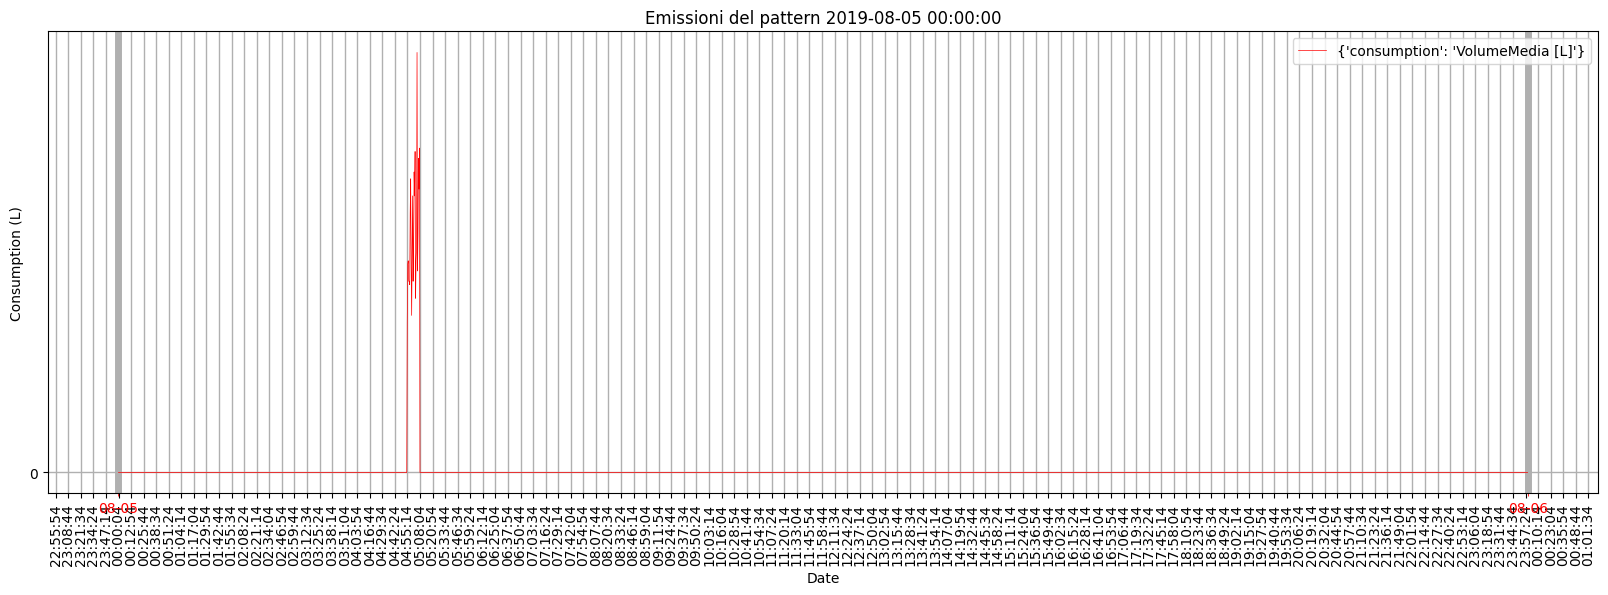

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 4
dove min1: 4262.370967741936 min2: 4022.5434782608695 min3: 4403.163043478261
min_value per questo pattern: 4403.163043478261
dove max1: 4972.766129032258 max2: 5363.391304347826 max3: 5503.953804347826
max_value per questo pattern: 4972.766129032258
	emissione giornaliera: 4841

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L']

intervallo: [[1], [69], [71], [98]]
divisione dell'emissioni in intervalli: [1381, 489, 2710, 261]

DATAFRAME  COSTRUITO
	intervallo finale: [[1], [69], [71], [98]]
	divisione finale dell'emissioni in intervalli: [1381, 489, 2710, 261]
	emissione totale giornaliera: 4841
	picco di emissione giornaliera: 5.3

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-08-05 00:12:50', freq='770S'), Timestamp('2019-08-05 00:25:40', freq='770S'), 1), (Timestamp('2019-08-05 14:45:30', freq='770S'), Timestamp('2019-08-05 14:58:20', freq='770S'), 1), (Timestamp('2019-08-05 15:1

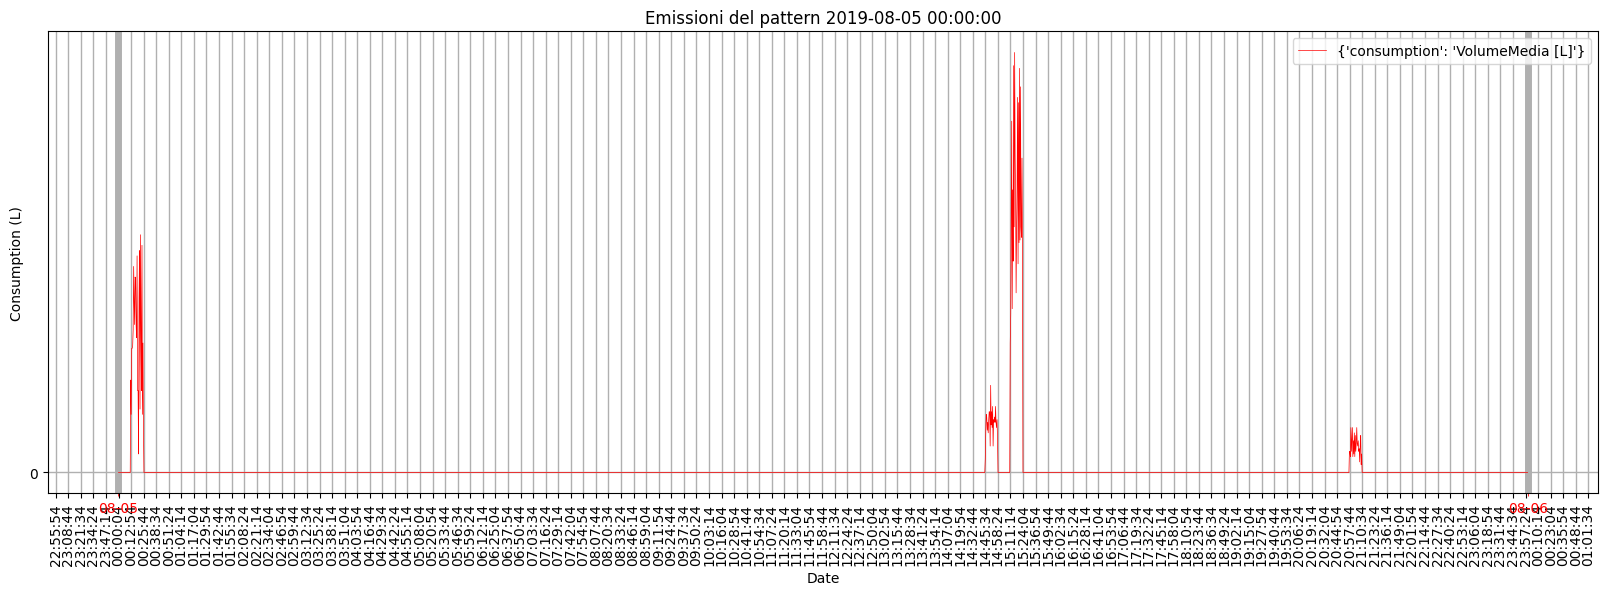

emissione giornaliera: 0

emissione giornaliera: 0

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 2
dove min1: 2554.435483870968 min2: 2582.2010869565215 min3: 2201.5815217391305
min_value per questo pattern: 2582.2010869565215
dove max1: 5108.870967741936 max2: 3442.9347826086955 max3: 3302.372282608696
max_value per questo pattern: 3302.372282608696
	emissione giornaliera: 3010

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: PP
spazi: ['L']

intervallo: [[12], [19]]
divisione dell'emissioni in intervalli: [2502, 508]

DATAFRAME  COSTRUITO
	intervallo finale: [[12], [19]]
	divisione finale dell'emissioni in intervalli: [2502, 508]
	emissione totale giornaliera: 3010
	picco di emissione giornaliera: 12.8

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 02:34:00', freq='770S'), Timestamp('2019-10-01 02:46:50', freq='770S'), 1), (Timestamp('2019-10-01 04:03:50', freq='770S'), Timestamp('2019-10-01 04:16:40', freq='770S'), 1)]


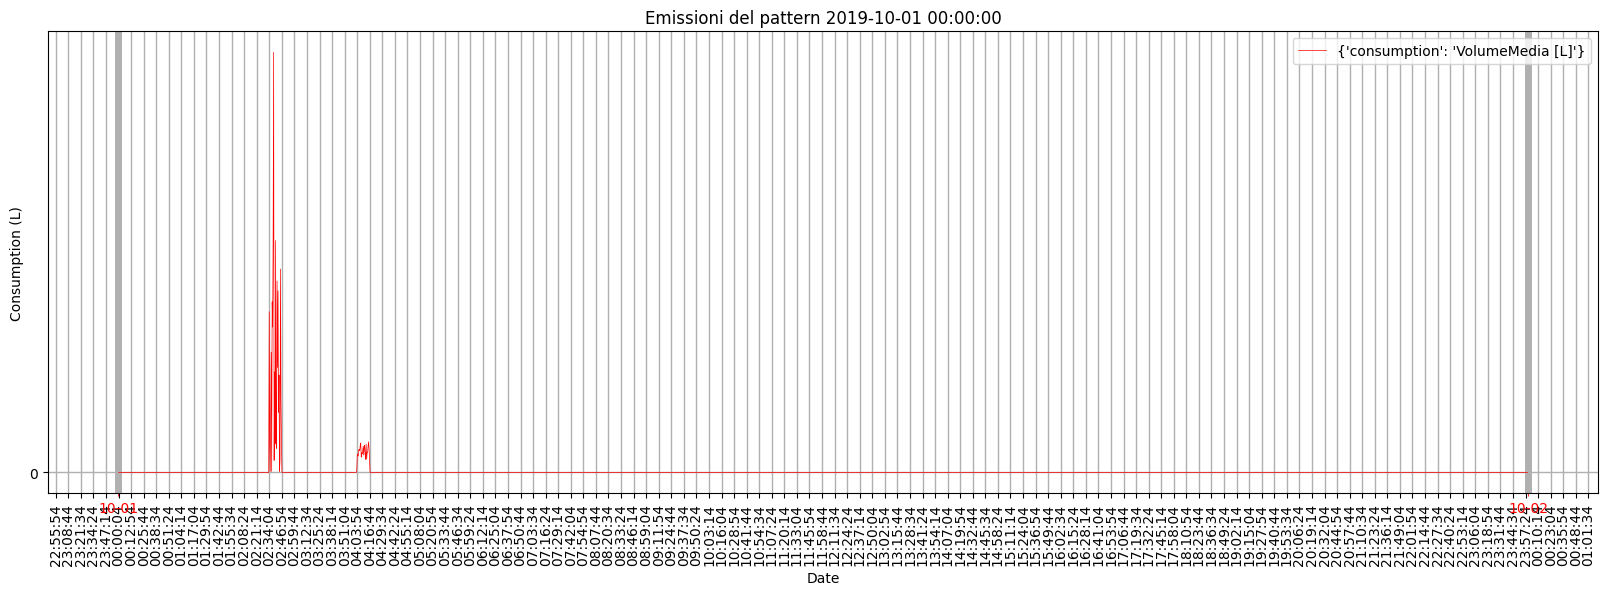

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 10217.741935483871 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 10217.741935483871
dove max1: 12772.177419354839 max2: 13771.739130434782 max3: 17612.652173913044
max_value per questo pattern: 12772.177419354839
	emissione giornaliera: 12709

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[31], [44], [50], [59, 60], [79], [98]]
divisione dell'emissioni in intervalli: [1229, 5193, 666, [187, 1413], 3113, 908]

DATAFRAME  COSTRUITO
	intervallo finale: [[31], [44], [50], [59, 60], [79], [98]]
	divisione finale dell'emissioni in intervalli: [1229, 5193, 666, [187, 1413], 3113, 908]
	emissione totale giornaliera: 12709
	picco di emissione giornaliera: 10.833333333333334

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 06:37:50', freq='770S'), Timestamp('2019-10-01 06:50:40', freq='770S'), 1), (Timestamp('2019-10-01 

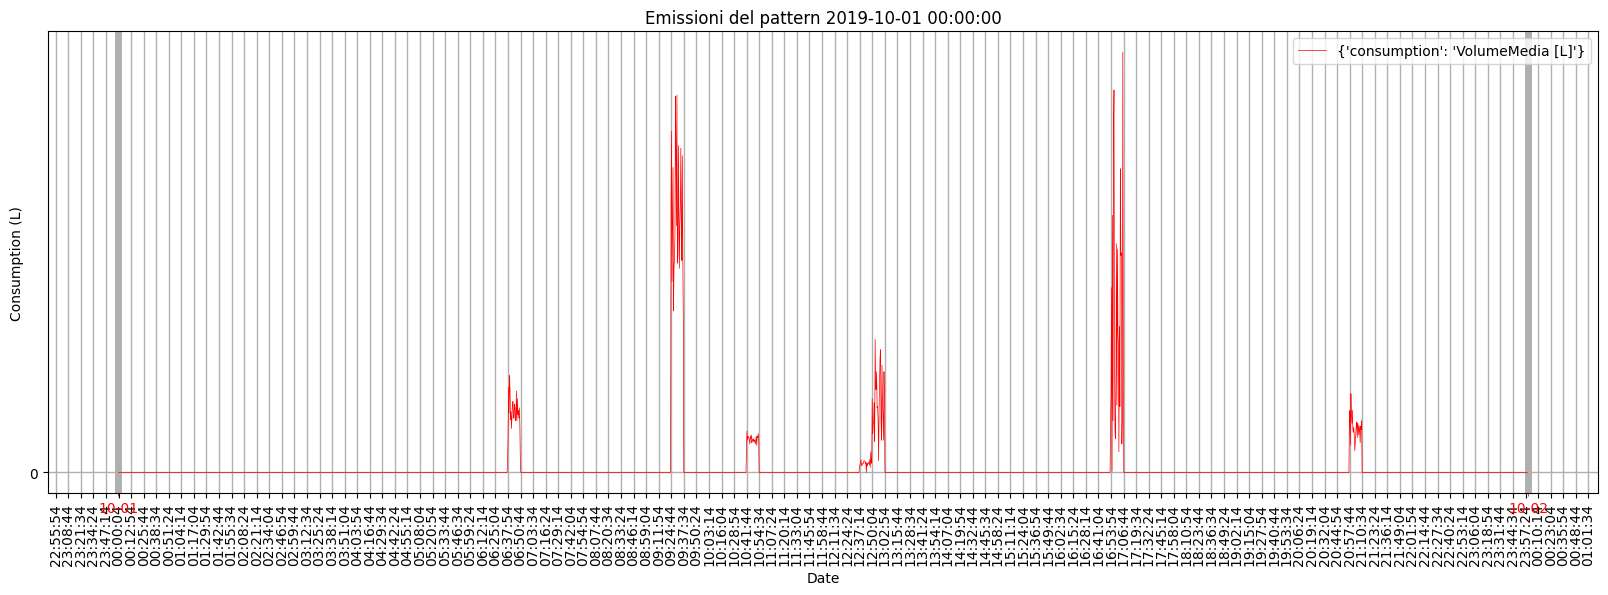

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2f
	numero di intervalli: 3
dove min1: 2554.435483870968 min2: 4303.668478260869 min3: 4403.163043478261
min_value per questo pattern: 4403.163043478261
dove max1: 5108.870967741936 max2: 5164.402173913043 max3: 5503.953804347826
max_value per questo pattern: 5108.870967741936
	emissione giornaliera: 4763

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: LPP
spazi: ['P', 'L']

intervallo: [[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [72], [109]]
divisione dell'emissioni in intervalli: [[134, 30, 61, 30, 16, 17, 11, 153, 143, 12, 251, 129, 41, 162, 15, 36, 292, 56, 93, 140, 34, 65, 84, 7, 5], 579, 2167]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[154, 22, 2, 152, 155, 53, 4, 62, 117, 44, 17, 44, 65, 189, 17, 95, 3, 75, 30, 15, 96, 44, 6, 19, 438], 1515, 1330]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[1, 241, 5, 60, 4

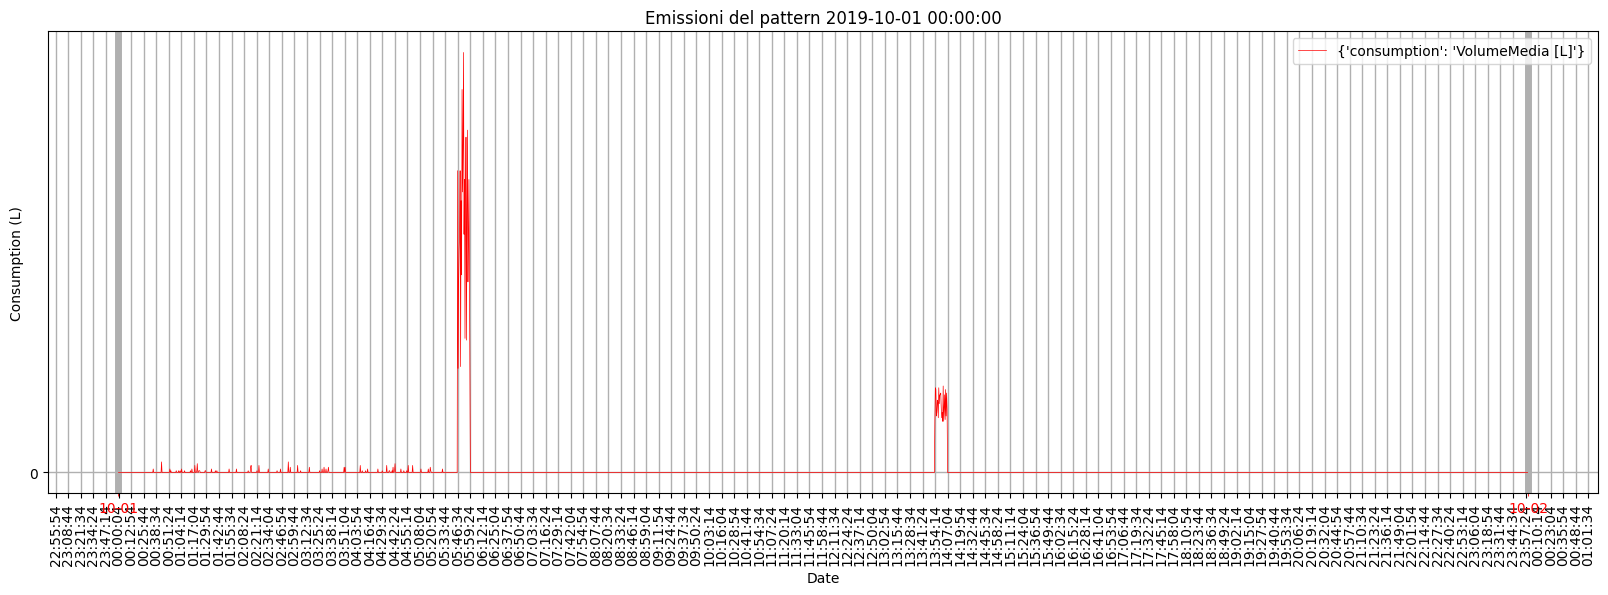

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 3
dove min1: 5108.870967741936 min2: 6025.135869565217 min3: 6604.744565217392
min_value per questo pattern: 6604.744565217392
dove max1: 7663.306451612903 max2: 13771.739130434782 max3: 7705.535326086957
max_value per questo pattern: 7663.306451612903
	emissione giornaliera: 7176

COSTRUZIONE DEL DATAFRAME...............
tipo degli intervalli: LMP
spazi: ['L', 'L']

intervallo: [[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [38, 39], [68]]
divisione dell'emissioni in intervalli: [[247, 13, 114, 91, 99, 2, 10, 205, 365, 257, 173, 26], [406, 4896], 272]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[48, 262, 22, 140, 74, 10, 40, 56, 1, 27, 77, 15], [1871, 2074], 2459]
errore div emissioni 
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[80, 20, 397, 880, 261, 522, 1, 370, 113, 263, 1648, 194], [1739, 223], 465]
errore div emissioni 
debug temp esmissioni 2
debug temp e

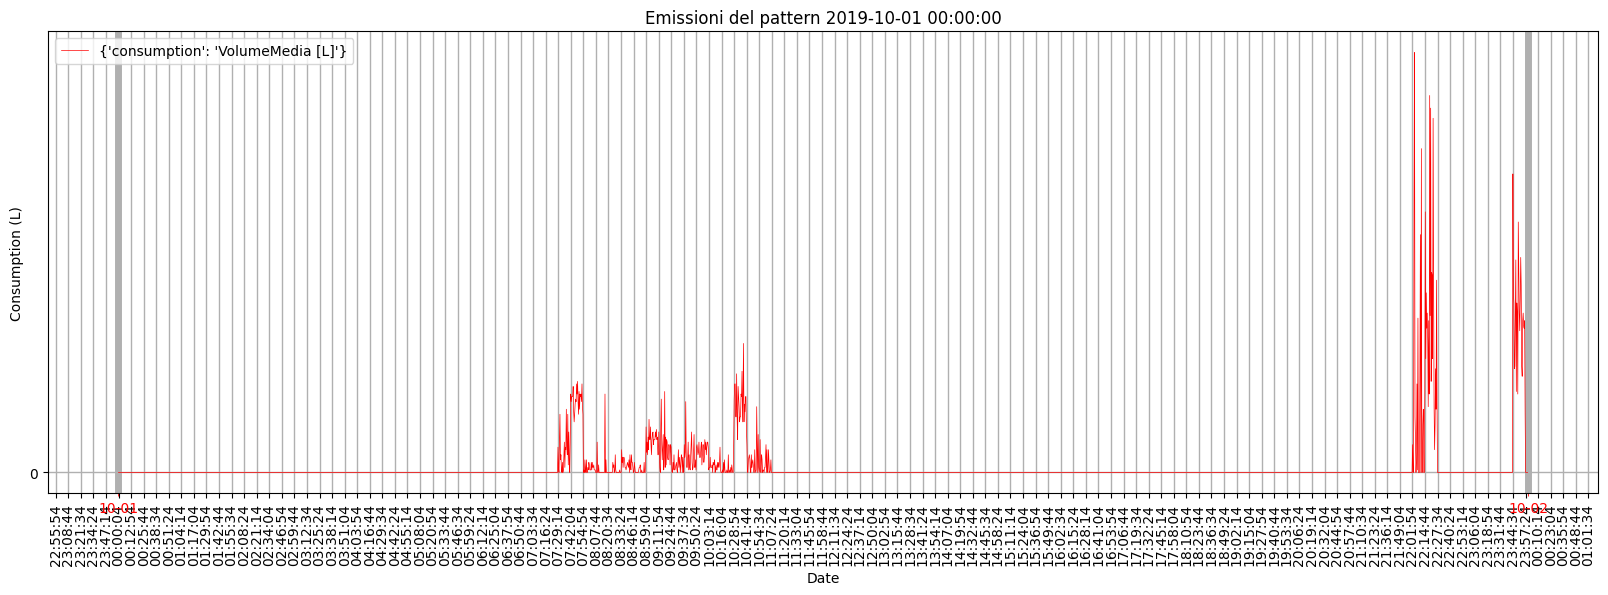

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 4
dove min1: 7663.306451612903 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 7705.535326086957
dove max1: 10217.741935483871 max2: 10328.804347826086 max3: 13209.489130434784
max_value per questo pattern: 10217.741935483871
	emissione giornaliera: 9415

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L']

intervallo: [[0], [15], [29], [40]]
divisione dell'emissioni in intervalli: [2809, 398, 179, 6029]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1315, 1176, 3721, 3203]
non rispetta und_value
divisione dell'emissioni in intervalli: [4763, 3211, 1060, 381]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [3325, 2097, 3593, 400]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [3416, 1415, 3870, 714]
debug temp esmissioni 1
tentativo
spazi: ['L', 'L', 'L']

intervallo: [[7, 8], [80], [93], [103]]
divisione dell'emissi

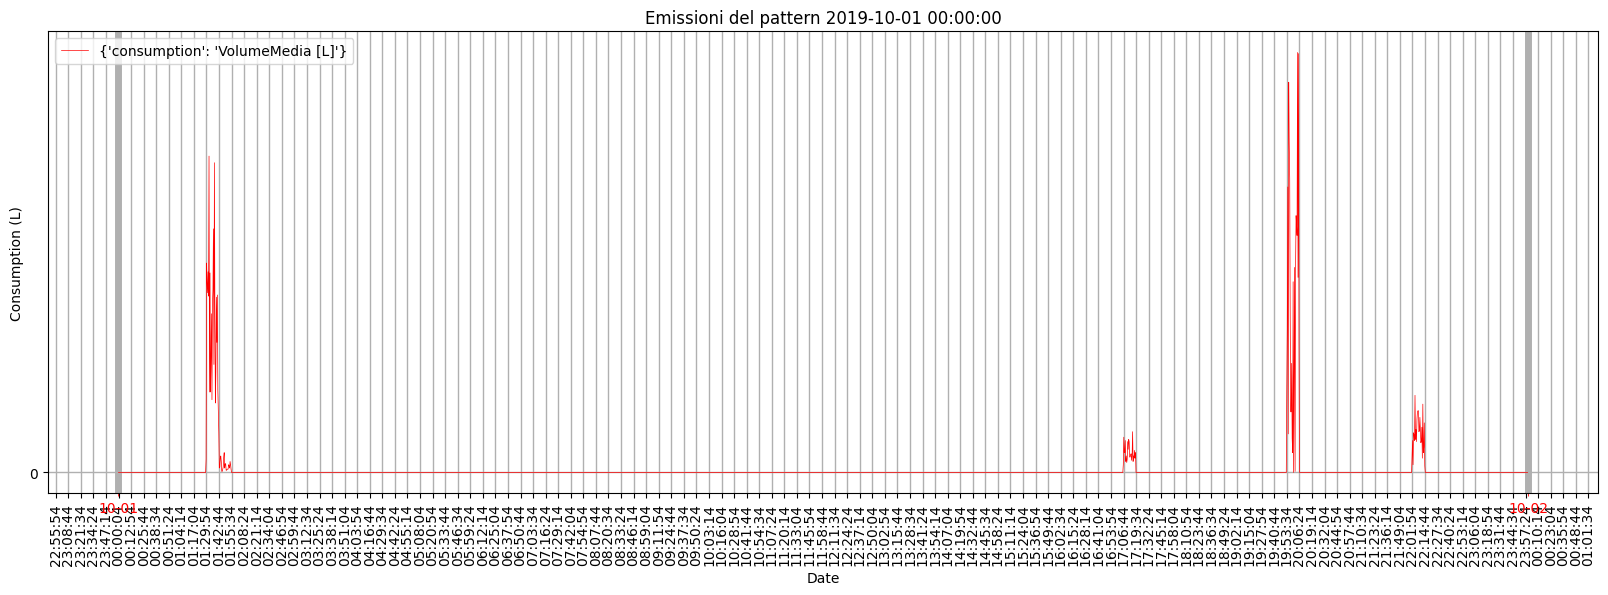

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S0
	numero di intervalli: 6
dove min1: 10217.741935483871 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 10217.741935483871
dove max1: 12772.177419354839 max2: 13771.739130434782 max3: 17612.652173913044
max_value per questo pattern: 12772.177419354839
	emissione giornaliera: 12462

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L']

intervallo: [[28], [46], [82], [91], [102], [107, 108, 109]]
divisione dell'emissioni in intervalli: [872, 4379, 542, 1061, 910, [1387, 629, 2682]]

DATAFRAME  COSTRUITO
	intervallo finale: [[28], [46], [82], [91], [102], [107, 108, 109]]
	divisione finale dell'emissioni in intervalli: [872, 4379, 542, 1061, 910, [1387, 629, 2682]]
	emissione totale giornaliera: 12462
	picco di emissione giornaliera: 9.366666666666667

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-10-01 05:59:20', freq='770S'), Timestamp('2019-10-01 06:12:10', freq='770S'), 1)

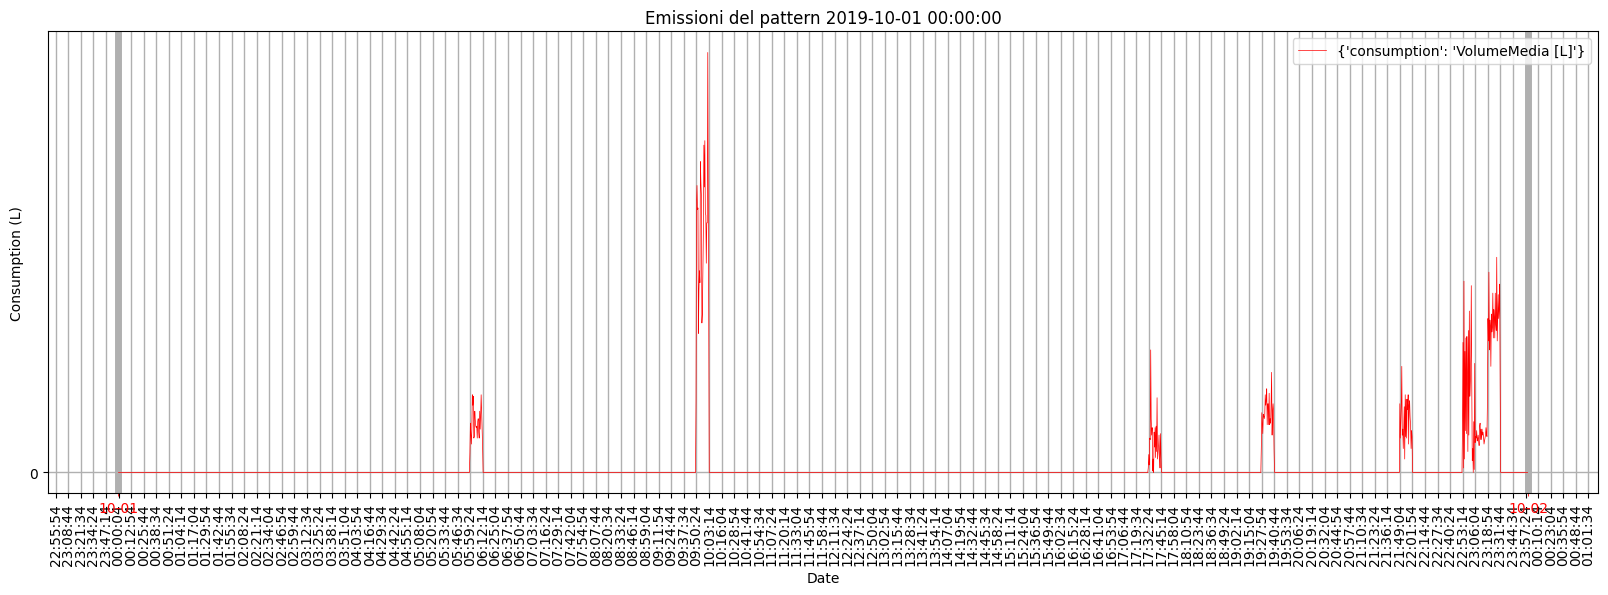

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 6
dove min1: 15326.612903225807 min2: 6025.135869565217 min3: 7705.535326086957
min_value per questo pattern: 15326.612903225807
dove max1: 17881.048387096773 max2: 17214.673913043476 max3: 22015.815217391304
max_value per questo pattern: 17214.673913043476
	emissione giornaliera: 15500

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'M', 'L']

intervallo: [[36], [42], [67], [72, 73], [76], [88]]
divisione dell'emissioni in intervalli: [2420, 3163, 1483, [51, 236], 7299, 848]
debug temp esmissioni 2
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [6438, 1789, 1965, [424, 1622], 2248, 1014]
non rispetta und_value
divisione dell'emissioni in intervalli: [2966, 1151, 2926, [976, 1653], 3757, 2071]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [8480, 1372, 1124, [934, 1186], 2251, 153]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2215, 3456,

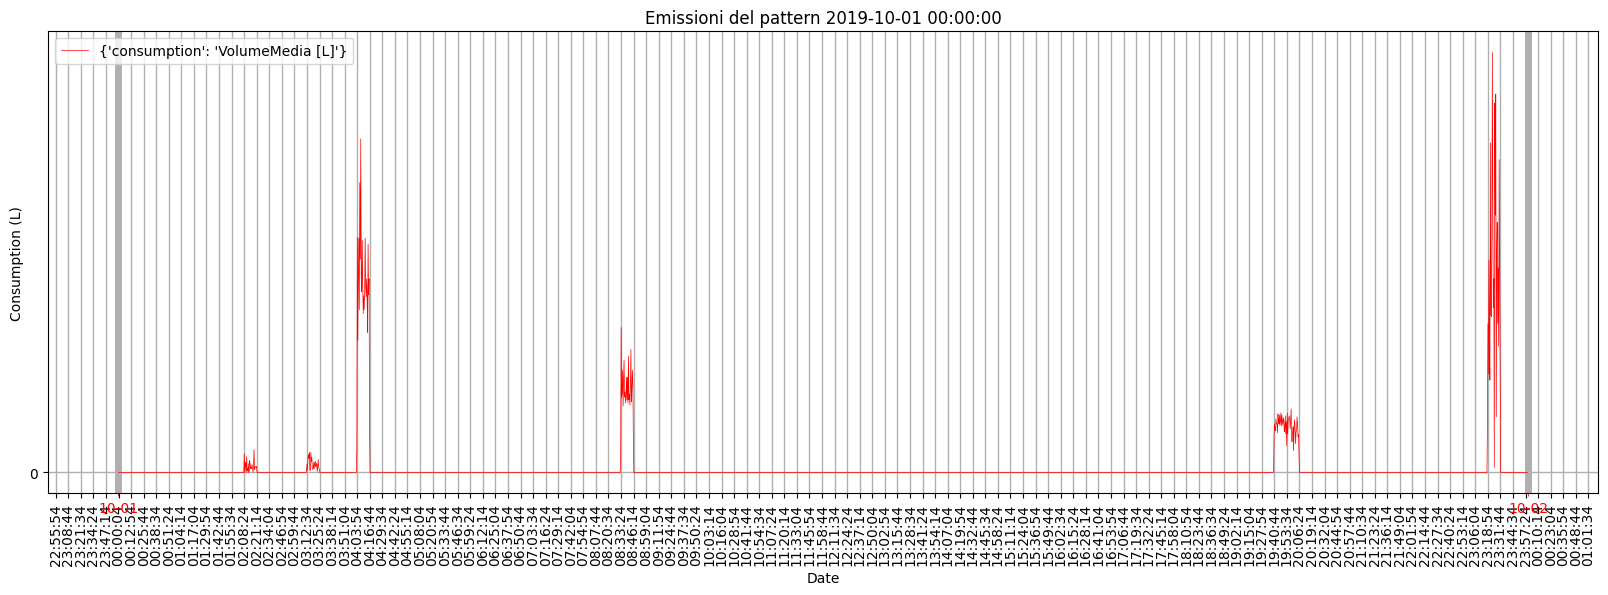

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: M1b
	numero di intervalli: 7
dove min1: 10108.875 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13478.5 max2: 14963.390109890111 max3: 20933.28729281768
max_value per questo pattern: 13478.5
	emissione giornaliera: 13101

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'M', 'L', 'M', 'P']

intervallo: [[10], [13], [67], [70, 71], [88], [92], [94]]
divisione dell'emissioni in intervalli: [1092, 8163, 15, [1393, 855], 1220, 303, 60]
non rispetta und_value
divisione dell'emissioni in intervalli: [1981, 2479, 2114, [437, 180], 1614, 4003, 293]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [808, 2890, 1621, [1300, 522], 1444, 475, 4041]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [72, 6318, 990, [109, 49], 953, 1762, 2848]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [1504, 2173, 2175, [214, 758], 804, 4969, 

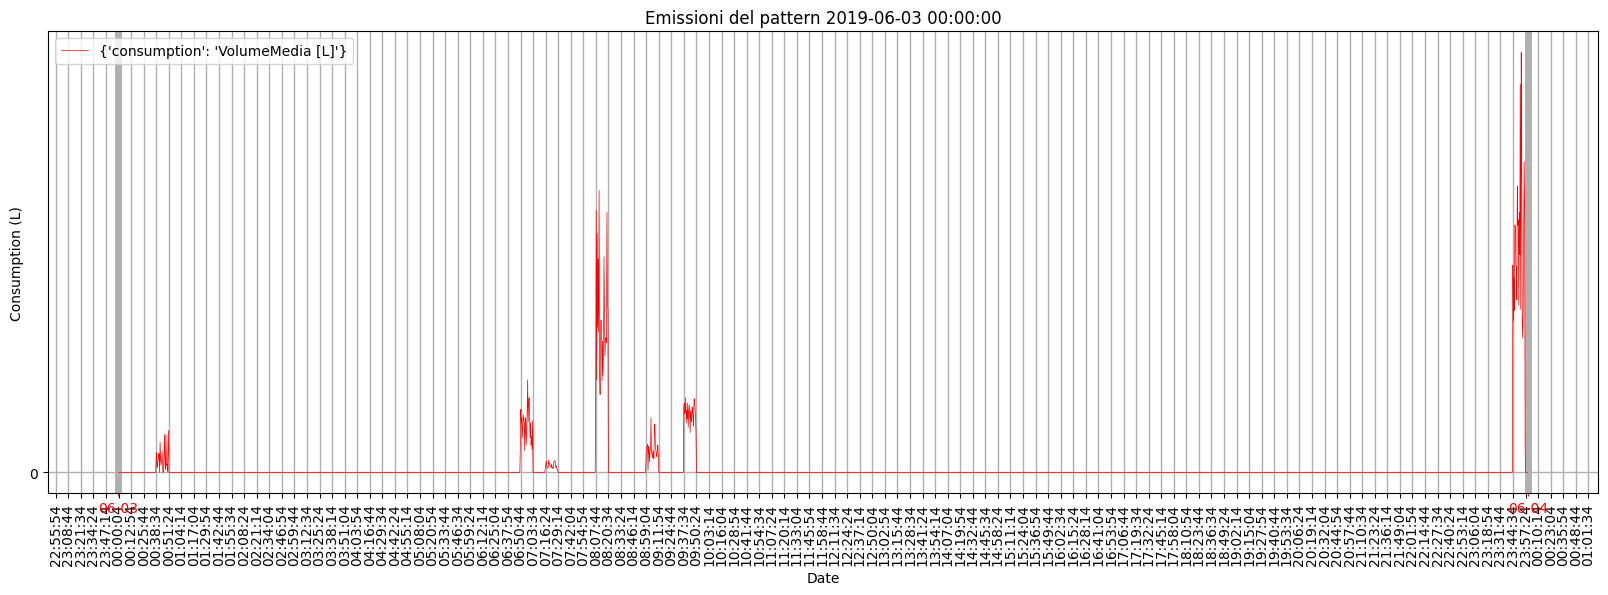

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 8
dove min1: 10108.875 min2: 12469.491758241758 min3: 12211.084254143647
min_value per questo pattern: 12469.491758241758
dove max1: 13478.5 max2: 14963.390109890111 max3: 20933.28729281768
max_value per questo pattern: 13478.5
	emissione giornaliera: 12512

COSTRUZIONE DEL DATAFRAME...............
spazi: ['M', 'L', 'L', 'L', 'L', 'L', 'L']

intervallo: [[2], [6], [35, 36, 37], [59], [64], [73], [97, 98], [110]]
divisione dell'emissioni in intervalli: [1640, 166, [387, 1031, 284], 1888, 1465, 1548, [132, 163], 3808]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [1657, 3386, [60, 48, 95], 989, 2650, 2992, [36, 66], 533]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [2592, 3275, [351, 29, 1211], 6, 596, 1195, [537, 911], 1809]

DATAFRAME  COSTRUITO
	intervallo finale: [[2], [6], [35, 36, 37], [59], [64], [73], [97, 98], [110]]
	divisione finale dell'emissioni in intervalli:

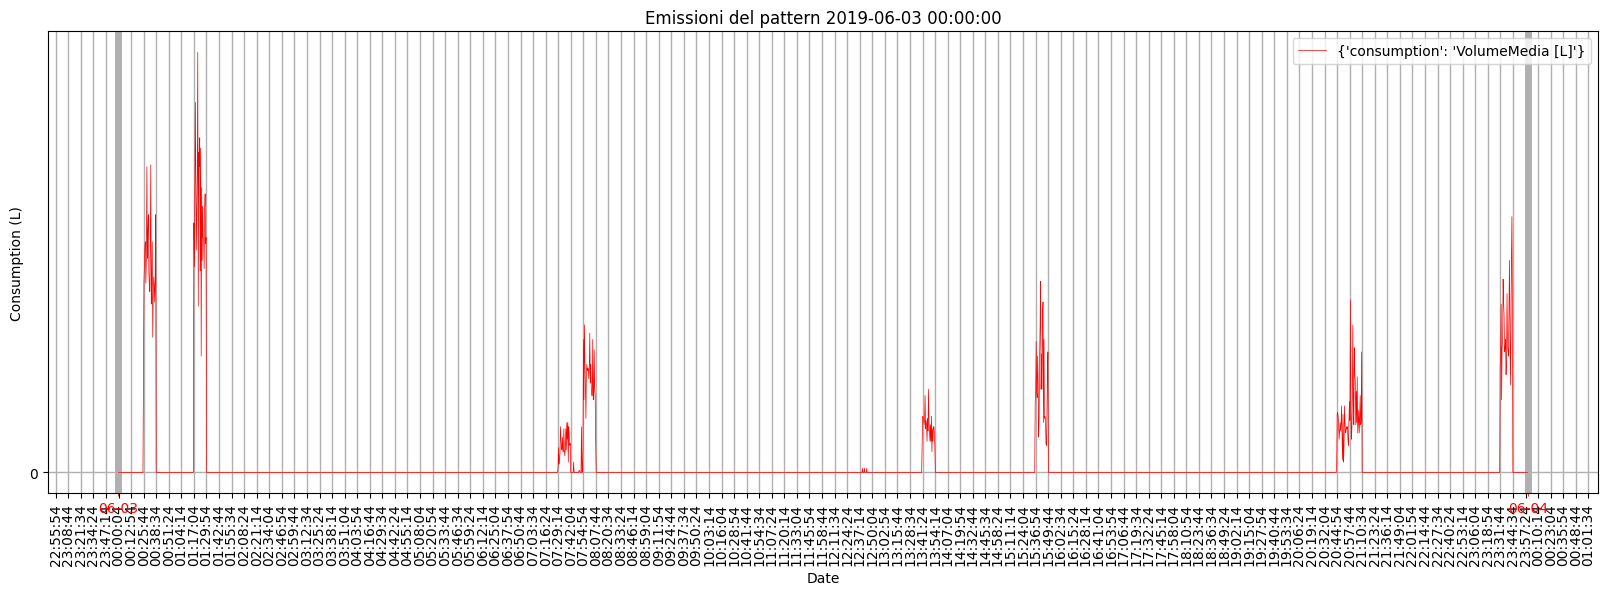

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 3369.625 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6739.25 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6739.25
	emissione giornaliera: 5422

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M']

intervallo: [[18], [28], [46], [50]]
divisione dell'emissioni in intervalli: [2205, 1852, 990, 375]

DATAFRAME  COSTRUITO
	intervallo finale: [[18], [28], [46], [50]]
	divisione finale dell'emissioni in intervalli: [2205, 1852, 990, 375]
	emissione totale giornaliera: 5422
	picco di emissione giornaliera: 7.566666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 03:51:00', freq='770S'), Timestamp('2019-06-03 04:03:50', freq='770S'), 1), (Timestamp('2019-06-03 05:59:20', freq='770S'), Timestamp('2019-06-03 06:12:10', freq='770S'), 1), (Timestamp('2019-06-03 09:50:20', freq='77

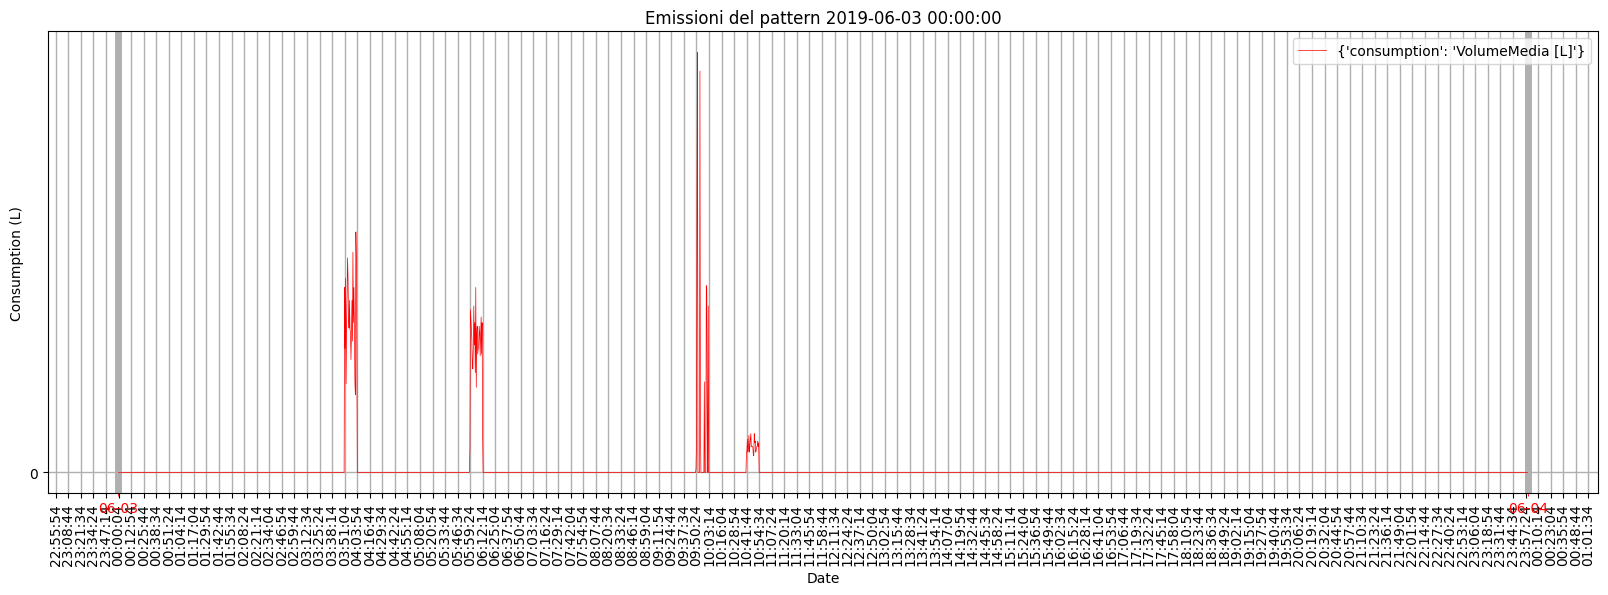

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2a
	numero di intervalli: 4
dove min1: 6739.25 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 8722.203038674033
dove max1: 10108.875 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
	emissione giornaliera: 9597

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'M']

intervallo: [[22], [29], [57], [60]]
divisione dell'emissioni in intervalli: [1491, 310, 7383, 413]
non rispetta und_value
divisione dell'emissioni in intervalli: [657, 2013, 5573, 1354]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [681, 2464, 847, 5605]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [642, 166, 541, 8248]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [463, 3419, 4939, 776]
debug temp esmissioni 1
tentativo
spazi: ['M', 'L', 'L']

intervallo: [[52], [55], [72, 73], [92]]
divisione dell'emissioni in intervalli: [1920

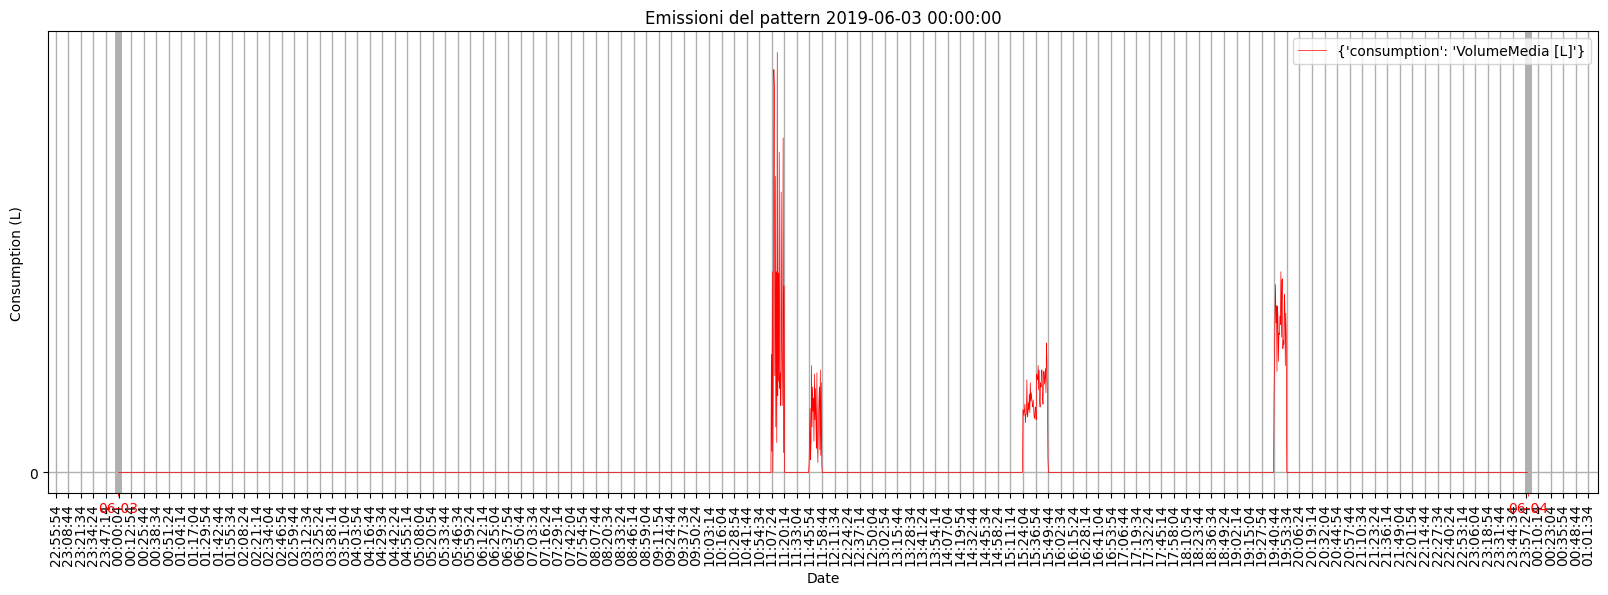

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S2c
	numero di intervalli: 9
dove min1: 6739.25 min2: 7481.695054945056 min3: 8722.203038674033
min_value per questo pattern: 8722.203038674033
dove max1: 10108.875 max2: 9975.593406593407 max3: 10466.64364640884
max_value per questo pattern: 9975.593406593407
	emissione giornaliera: 8910

COSTRUZIONE DEL DATAFRAME...............
spazi: ['P', 'L', 'L', 'M', 'L', 'L', 'L', 'M']

intervallo: [[2, 3], [5], [40], [48], [51], [84], [94], [103], [107]]
divisione dell'emissioni in intervalli: [[64, 305], 789, 1098, 1752, 473, 2963, 145, 354, 967]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [[868, 177], 27, 959, 191, 1245, 2100, 339, 781, 2223]
debug temp esmissioni 2
divisione dell'emissioni in intervalli: [[372, 237], 1345, 2690, 1637, 81, 432, 1680, 188, 248]

DATAFRAME  COSTRUITO
	intervallo finale: [[2, 3], [5], [40], [48], [51], [84], [94], [103], [107]]
	divisione finale dell'emissioni in intervalli: [[372, 237], 1

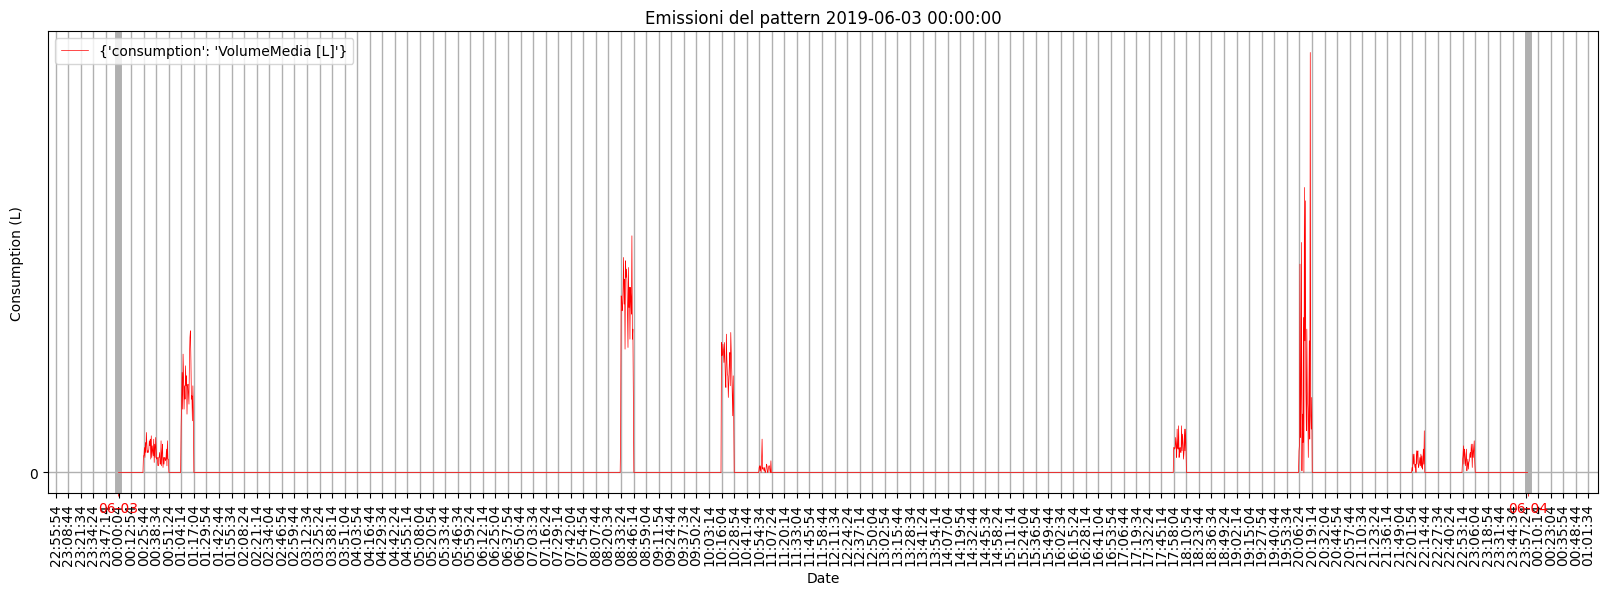

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1f
	numero di intervalli: 7
dove min1: 3369.625 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6739.25 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6739.25
	emissione giornaliera: 6077

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'P', 'L', 'L', 'L', 'L']

intervallo: [[11], [44], [46], [83], [97], [106], [111]]
divisione dell'emissioni in intervalli: [250, 1414, 3236, 128, 623, 121, 305]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [705, 79, 1099, 1928, 993, 196, 1077]

DATAFRAME  COSTRUITO
	intervallo finale: [[11], [44], [46], [83], [97], [106], [111]]
	divisione finale dell'emissioni in intervalli: [705, 79, 1099, 1928, 993, 196, 1077]
	emissione totale giornaliera: 6077
	picco di emissione giornaliera: 4.366666666666666

PROVA DEL NOVE
	intervalli trovati: [(Timestamp('2019-06-03 02:21:10', freq='770S'), Times

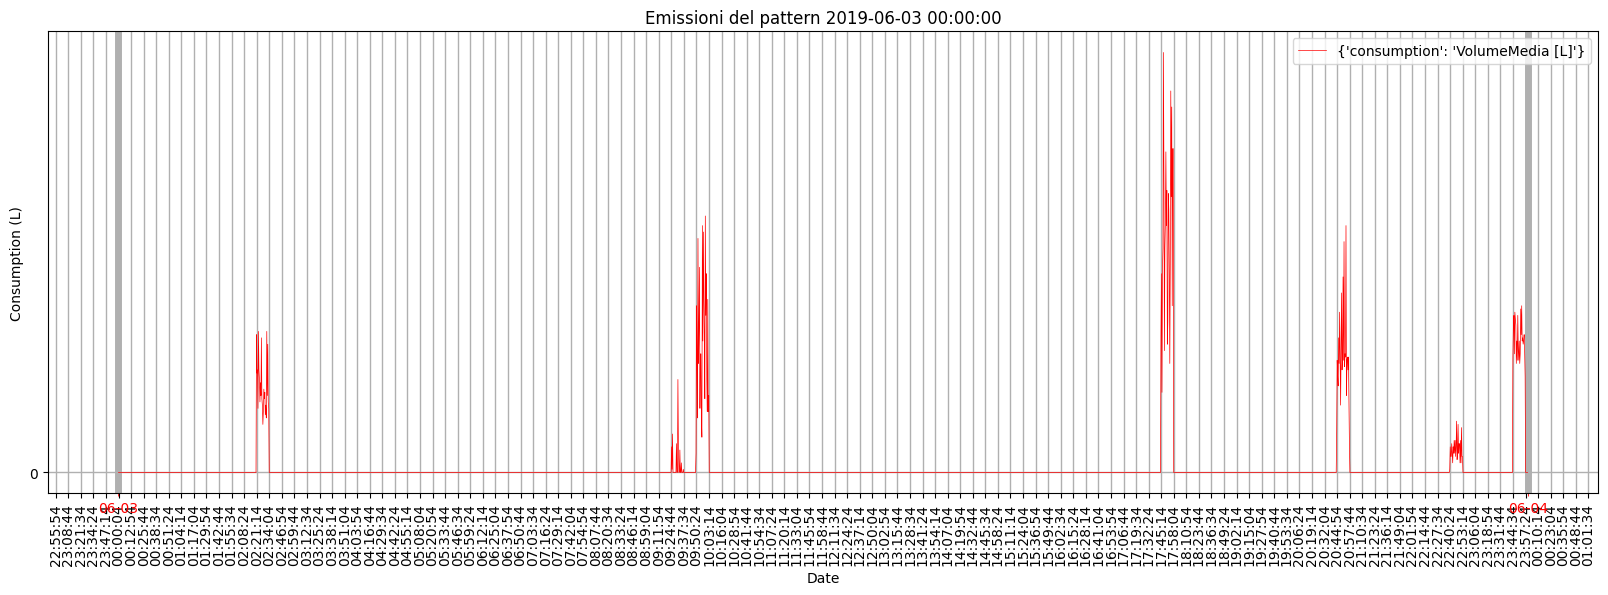

ANALISI PATTERN INSERITO
	spazio tra gli intervalli: S1a
	numero di intervalli: 8
dove min1: 3369.625 min2: 4987.7967032967035 min3: 5233.32182320442
min_value per questo pattern: 5233.32182320442
dove max1: 6739.25 max2: 7481.695054945056 max3: 6977.762430939227
max_value per questo pattern: 6739.25
	emissione giornaliera: 6245

COSTRUZIONE DEL DATAFRAME...............
spazi: ['L', 'L', 'L', 'L', 'L', 'L', 'M']

intervallo: [[16], [22], [56, 57], [67], [83, 84], [96], [102], [105]]
divisione dell'emissioni in intervalli: [814, 2309, [472, 139], 319, [342, 116], 246, 64, 1424]
debug temp esmissioni 1
divisione dell'emissioni in intervalli: [777, 660, [5, 52], 501, [823, 791], 1042, 1318, 276]

DATAFRAME  COSTRUITO
	intervallo finale: [[16], [22], [56, 57], [67], [83, 84], [96], [102], [105]]
	divisione finale dell'emissioni in intervalli: [777, 660, [5, 52], 501, [823, 791], 1042, 1318, 276]
	emissione totale giornaliera: 6245
	picco di emissione giornaliera: 2.8333333333333335

PROVA 

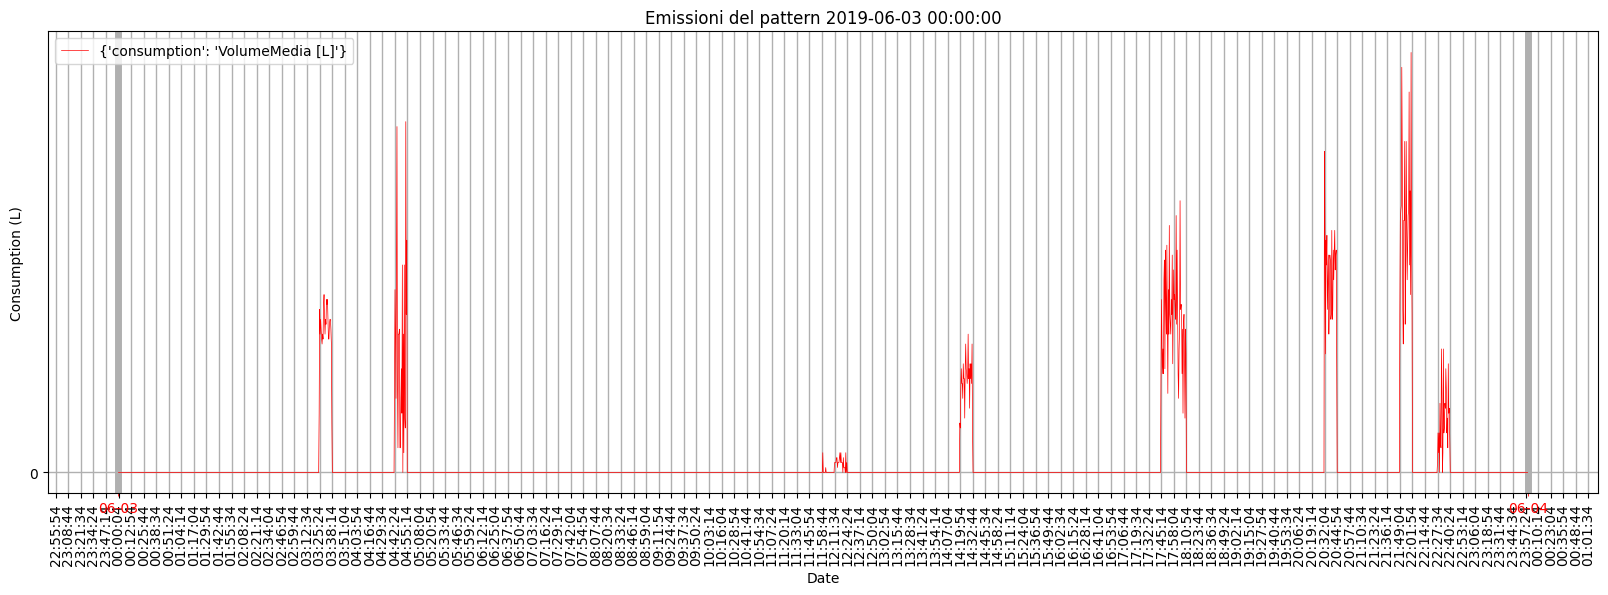

PATTERN ERRATI: 0


In [384]:
# SETTIMANE SU CUI FARE I TEST, PRIME DUE SETTIMANE DEL PRIMO E SECONDO PERIODO(SETTIMANE REALI)


# 2019-04-22
#['CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c']
#[12493. 32722.   753.   870.  7962. 16808.  6170.]

#2019-08-05
#['CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0']
#[16734.  2505.  2249.  1656.  4843.     0.     0.]

#2019-10-21
#['CBMDLC2PP_S0', 'CEMHLH6_S0', 'CBMFLE3LPP_S2f', 'CCMHLG3LMP_S0', 'CDMHLH4_S0', 'CEMHLH6_S0', 'CGMHLH6_S1a']
#[ 3228. 12506.  4893.  6660.  9335. 12324. 16304.]

#2019-06-03
#['CDMFLH7_M1b', 'CDMFLH8_S1a', 'CBMCLD4_S2a', 'CCMDLF4_S2a', 'CCMDLF9_S2c', 'CBMCLD7_S1f', 'CBMCLD8_S1a']
#[12690. 13362.  6491.  9208.  8733.  5940.  6675.]

#SETTIMANE GENERATE
#PERIODO 04
#['CDMCLE6_S2a', 'CHMHLH6_S2c', 'CCMCLD9_S2c', 'CDMDLE7_S2c', 'CCMCLD9_S2c', 'CHMHLH6_S2c', 'CFMDLF6_S2f']
#['CFMFLH6_S0', 'CDMCLD1L_S0', 'CHMHLH6_S2c', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CAMALA3PPP_S2a', 'CCMBLC4_S0']

#PERIODO 08
#['CDMBLB1M_S0', 'CHMHLH6_S2a', 'CAMALA4_S2a', '0', 'CDMBLC1M_S0', '0', '0']
#['0', 'CDMBLC5_S0', '0', 'CHMHLH16_M1c', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a', '0']

#PERIODO 07
#['CDMDLE4_S2a', 'CDMDLE3PLP_S0', 'CEMFLG6_S0', 'CAMALA5_S2a', 'CDMDLE4_S2a', 'CCMCLD4_S2f', 'CHMHLH10_S2c']
#['CAMALA2MP_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_M1c', 'CCMDLD4_S2f', 'CAMALA2MP_S0']

# MEDIA MENSILE 
# [0.0, 5361.964285714285, 6614.870967741936, 8858.8, 7666.451612903225, 13478.5, 6155.0, 2841.5806451612902, 7151.266666666666, 10217.741935483871, 0.0, 0.0]
# MEDIA TRIMESTRALE
# [3946.6222222222223, 9975.593406593407, 5363.391304347826, 3442.9347826086955]
# MEDIA SEMESTRALE
# [6977.762430939227, 4403.163043478261]
# MEDIA ANNUALE 
# [5679.882191780822]

########## MAIN ###############
df_dispositivo_emissioni=read_fixture('Washbasin')
mm_array=calcola_media_mensile(df_dispositivo_emissioni)
mt_array=calcola_media_trimestrale(df_dispositivo_emissioni)
ms_array=calcola_media_semestrale(df_dispositivo_emissioni)
ma=calcola_media_annuale(df_dispositivo_emissioni)


#ANALISI DEL PATTERN DA DOVER RIPRODURRE, SCOMPOSIZIONE DEL PATTERN PER OTTENERE I VARI DATI UTILI

settprova= ['CFMFLH6_S0', 'CHMHLH9_M1b', 'CAMALA1M_S0', 'CAMALA1M_S0', 'CDMDLE7_S2c', 'CHMGLH7_S2c', 'CCMCLD7_S2c']
meseprova= 4
giornoprova= 22
cambiogiorno=-1

settprova2=['CHMHLH16_M1c', 'CDMBLC5_S0', 'CDMBLC1M_S0', 'CCMBLB1P_S0', 'CGMDLE4_S2f', '0', '0']
giornoprova2= 5
meseprova2=8

settprova3=['CBMDLC2PP_S0', 'CEMHLH6_S0', 'CBMFLE3LPP_S2f', 'CCMHLG3LMP_S0', 'CDMHLH4_S0', 'CEMHLH6_S0', 'CGMHLH6_S1a']
giornoprova3=1
meseprova3=10

settprova4=['CDMFLH7_M1b', 'CDMFLH8_S1a', 'CBMCLD4_S2a', 'CCMDLF4_S2a', 'CCMDLF9_S2c', 'CBMCLD7_S1f', 'CBMCLD8_S1a']
giornoprova4=3
meseprova4=6

sett=[settprova,settprova2,settprova3,settprova4]
mese=[meseprova,meseprova2,meseprova3,meseprova4]
giorno=[giornoprova,giornoprova2,giornoprova3,giornoprova4]

settgenerate=[
    ['CDMCLE6_S2a', 'CHMHLH6_S2c', 'CCMCLD9_S2c', 'CDMDLE7_S2c', 'CCMCLD9_S2c', 'CHMHLH6_S2c', 'CFMDLF6_S2f'],
    ['CFMFLH6_S0', 'CDMCLD1L_S0', 'CHMHLH6_S2c', 'CCMCLD4_S2a', 'CAMALA3PPP_S2a', 'CAMALA3PPP_S2a', 'CCMBLC4_S0'],
    ['CDMBLB1M_S0', 'CHMHLH6_S2a', 'CAMALA4_S2a', '0', 'CDMBLC1M_S0', '0', '0'],
    ['0', 'CDMBLC5_S0', '0', 'CHMHLH16_M1c', 'CAMALA2MP_P1a', 'CAMALA2MP_P1a', '0'],
    ['CDMDLE4_S2a', 'CDMDLE3PLP_S0', 'CEMFLG6_S0', 'CAMALA5_S2a', 'CDMDLE4_S2a', 'CCMCLD4_S2f', 'CHMHLH10_S2c'],
    ['CAMALA2MP_S0', 'CDMELF7_S1a', 'CCMDLD4_S2f', 'CFMGLH4_S2a', 'CCMDLD4_M1c', 'CCMDLD4_S2f', 'CAMALA2MP_S0']
    ]
mesegenerate=[
    [4,5],
    [4,5],
    8,
    8,
    7,
    7
    ]
giornogenerate=[1,1]#inserire tutti zeri


#zip(settgenerate,mesegenerate,giornogenerate)
#zip(sett,mese,giorno)
count=0
for setty,messy,giorny in zip(settgenerate,mesegenerate,giornogenerate):
    count+=funzione_main(mm_array,mt_array,ms_array,ma, messy,giorny ,setty)

count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova,giornoprova ,settprova)
count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova2,giornoprova2 ,settprova2)
count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova3,giornoprova3 ,settprova3)
count+=funzione_main(mm_array,mt_array,ms_array,ma, meseprova4,giornoprova4 ,settprova4)
print(f"PATTERN ERRATI: {count}")

